<div style="font-size: 30px; font-weight: bold; line-height: 1.2; margin-top: 20px; margin-bottom: 20px;">Doctor’s Helper</div>

**Introduction**

Doctor’s Helper is an initiative started by an innovative doctor at a local hospital. After becoming
overwhelmed with the volume of patients that she was seeing, the doctor realized that she needed to
augment her capability with the latest advancement in data analysis and data science in order to help her
find those patients that are at the highest risk for disease.

She seeks to enlist the help of a tech savvy analyst that may aid her quest to uncover the biological markers
and environmental circumstances that may be associated with higher/lower incidence of disease.

The team starts with a small data set, compiled by the doctor, that lists the biomarkers and environmental
factors that she feels are potentially important along with the binary variable “Outcome” indicating if the
disease was present in the patient.

**Dataset**

The dataset provided contains 9 variables that are biological in nature and 2 that are environmental. 

The biological variables are:
- Number of Pregnancies
- Blood Chemistry I
- Blood Chemistry II
- Blood Chemistry III
- Blood Pressure
- Skin Condition
- BMI
- Genetic Predisposition Factor
- Age

The Environmental variables are:
- Air Quality Index
- Geographic Location (State)

## Imports

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.exceptions import FitFailedWarning
from scipy.stats import randint

# Suppress FitFailedWarning and UserWarnings
warnings.simplefilter('ignore', FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Data loading and preprocessing

Data was read from a CSV file, with basic preprocessing and cleaning steps applied, including handling empty rows, renaming columns names, and converting data types to ensure the dataset is clean and ready for analysis.

In [2]:
# Read the data from csv file
df = pd.read_csv('good_doctor_data.csv')
df.head(10)

Unique_ID  # Pregnancies  Blood Chemestry~I  Blood Chemisty~II  \
0  5642118.0            1.0                0.0               23.0   
1        NaN            NaN                NaN                NaN   
2  5642119.0            1.0                0.0                0.0   
3        NaN            NaN                NaN                NaN   
4  5642120.0            1.0                0.0                0.0   
5        NaN            NaN                NaN                NaN   
6  5642121.0            5.0               44.0                0.0   
7        NaN            NaN                NaN                NaN   
8  5642122.0            2.0               56.0               45.0   
9        NaN            NaN                NaN                NaN   

   Blood Chemisty~III  Blood Pressure  Skin Thickness   BMI  \
0                10.0            74.0            20.0  27.7   
1                 NaN             NaN             NaN   NaN   
2                61.0            68.0            35.0  32.0   
3                 NaN             NaN             NaN   NaN   
4               172.0            48.0            20.0  24.7   
5                 NaN             NaN             NaN   NaN   
6               207.0            62.0             0.0  25.0   
7                 NaN             NaN             NaN   NaN   
8               150.0            56.0            28.0  24.2   
9                 NaN             NaN             NaN   NaN   

   Genetic Predisposition Factor   Age  Air Qual'ty Index $tate  Outcome  
0                          0.299  21.0               38.0    CA      0.0  
1                            NaN   NaN                NaN   NaN      NaN  
2                          0.389  22.0               10.0    CA      0.0  
3                            NaN   NaN                NaN   NaN      NaN  
4                          0.140  22.0               77.0    CA      0.0  
5                            NaN   NaN                NaN   NaN      NaN  
6                          0.587  36.0               40.0    OR      0.0  
7                            NaN   NaN                NaN   NaN      NaN  
8                          0.332  22.0               70.0    CT      0.0  
9                            NaN   NaN                NaN   NaN      NaN

In [3]:
# Handle empty records (drop rows where all values are NaN)
df = df.dropna(how='all')
df.head()

Unique_ID  # Pregnancies  Blood Chemestry~I  Blood Chemisty~II  \
0  5642118.0            1.0                0.0               23.0   
2  5642119.0            1.0                0.0                0.0   
4  5642120.0            1.0                0.0                0.0   
6  5642121.0            5.0               44.0                0.0   
8  5642122.0            2.0               56.0               45.0   

   Blood Chemisty~III  Blood Pressure  Skin Thickness   BMI  \
0                10.0            74.0            20.0  27.7   
2                61.0            68.0            35.0  32.0   
4               172.0            48.0            20.0  24.7   
6               207.0            62.0             0.0  25.0   
8               150.0            56.0            28.0  24.2   

   Genetic Predisposition Factor   Age  Air Qual'ty Index $tate  Outcome  
0                          0.299  21.0               38.0    CA      0.0  
2                          0.389  22.0               10.0    CA      0.0  
4                          0.140  22.0               77.0    CA      0.0  
6                          0.587  36.0               40.0    OR      0.0  
8                          0.332  22.0               70.0    CT      0.0

In [4]:
# Assign new column names
df.columns = [
    "unique_id",
    "num_pregnancies",
    "blood_chemistry_1",
    "blood_chemistry_2",
    "blood_chemistry_3",
    "blood_pressure",
    "skin_thickness_condition",
    "bmi",
    "genetic_predisposition_factor",
    "age",
    "air_quality_index",
    "state",
    "outcome"
]

In [5]:
# Convert the data types
df['unique_id'] = df['unique_id'].astype('int32')
df['num_pregnancies'] = df['num_pregnancies'].astype('int32')
df['blood_chemistry_1'] = df['blood_chemistry_1'].astype('float32')
df['blood_chemistry_2'] = df['blood_chemistry_2'].astype('float32')
df['blood_chemistry_3'] = df['blood_chemistry_3'].astype('float32')
df['blood_pressure'] = df['blood_pressure'].astype('float32')
df['skin_thickness_condition'] = df['skin_thickness_condition'].astype('float32')
df['bmi'] = df['bmi'].astype('float32')
df['genetic_predisposition_factor'] = df['genetic_predisposition_factor'].astype('float32')
df['age'] = df['age'].astype('int32')
df['air_quality_index'] = df['air_quality_index'].astype('float32')
df['state'] = df['state'].astype('category')
df['outcome'] = df['outcome'].astype('int32')

In [6]:
df.shape

(3840, 13)

In [7]:
# Count missing data in each column
print(df.isna().sum())

unique_id                         0
num_pregnancies                   0
blood_chemistry_1                25
blood_chemistry_2                10
blood_chemistry_3                 0
blood_pressure                    0
skin_thickness_condition          5
bmi                               0
genetic_predisposition_factor     0
age                               0
air_quality_index                30
state                             0
outcome                           0
dtype: int64


In [8]:
# Count unique values
df.nunique()

unique_id                        768
num_pregnancies                   17
blood_chemistry_1                136
blood_chemistry_2                186
blood_chemistry_3                351
blood_pressure                    47
skin_thickness_condition          51
bmi                              248
genetic_predisposition_factor    517
age                               53
air_quality_index                100
state                             49
outcome                            2
dtype: int64

At this stage, it can be seen that although the dataset contains 3840 data records, only 768 distinct unique id values are present, indicating that multiple records may exist for a single unique identifier.

In [9]:
# Display sorted data by unique_id
df.sort_values(by="unique_id").head(15)

unique_id  num_pregnancies  blood_chemistry_1  blood_chemistry_2  \
0       5642118                1                0.0               23.0   
3072    5642118                1                0.0               23.0   
6144    5642118                1                0.0               23.0   
1536    5642118                1                0.0               23.0   
4608    5642118                1                0.0               23.0   
6146    5642119                1                0.0                0.0   
1538    5642119                1                0.0                0.0   
3074    5642119                1                0.0                0.0   
2       5642119                1                0.0                0.0   
4610    5642119                1                0.0                0.0   
1540    5642120                1                0.0                0.0   
4       5642120                1                0.0                0.0   
6148    5642120                1                0.0                0.0   
3076    5642120                1                0.0                0.0   
4612    5642120                1                0.0                0.0   

      blood_chemistry_3  blood_pressure  skin_thickness_condition        bmi  \
0                  10.0            74.0                      20.0  27.700001   
3072               45.0            74.0                      20.0  27.700001   
6144              333.0            74.0                      20.0  27.700001   
1536              228.0            74.0                      20.0  27.700001   
4608               22.0            74.0                      20.0  27.700001   
6146              342.0            68.0                      35.0  32.000000   
1538              146.0            68.0                      35.0  32.000000   
3074              338.0            68.0                      35.0  32.000000   
2                  61.0            68.0                      35.0  32.000000   
4610              193.0            68.0                      35.0  32.000000   
1540              229.0            48.0                      20.0  24.700001   
4                 172.0            48.0                      20.0  24.700001   
6148               96.0            48.0                      20.0  24.700001   
3076              115.0            48.0                      20.0  24.700001   
4612               56.0            48.0                      20.0  24.700001   

      genetic_predisposition_factor  age  air_quality_index state  outcome  
0                             0.299   21               38.0    CA        0  
3072                          0.299   21               38.0    CA        0  
6144                          0.299   21               38.0    CA        0  
1536                          0.299   21               38.0    CA        0  
4608                          0.299   21               38.0    CA        0  
6146                          0.389   22               10.0    CA        0  
1538                          0.389   22               10.0    CA        0  
3074                          0.389   22               10.0    CA        0  
2                             0.389   22               10.0    CA        0  
4610                          0.389   22               10.0    CA        0  
1540                          0.140   22               77.0    CA        0  
4                             0.140   22               77.0    CA        0  
6148                          0.140   22               77.0    CA        0  
3076                          0.140   22               77.0    CA        0  
4612                          0.140   22               77.0    CA        0

Additionally, while other columns have consistent values across these records, the blood chemistry 3 column shows variability for a given unique id.

To ensure thoroughness, it was also checked whether a similar issue affects the other columns in the dataset. The results indicate that no other column varies across records for the same unique_id.

In [10]:
# Check if any other column contains different values for one unique_id
columns_to_check = df.columns.difference(['unique_id'])

for column in columns_to_check:
    value_counts = df.groupby("unique_id")[column].nunique()
    print(f"\'{column}': {any(value_counts > 1)}")

'age': False
'air_quality_index': False
'blood_chemistry_1': False
'blood_chemistry_2': False
'blood_chemistry_3': True
'blood_pressure': False
'bmi': False
'genetic_predisposition_factor': False
'num_pregnancies': False
'outcome': False
'skin_thickness_condition': False
'state': False


## Explanatory data analysis

Before building the models, an in-depth understanding of the data will be conducted. This includes analyzing potential features, detecting outliers, and examining the relationships and dependencies between them. 

### Blood chemistry 3

For a single unique identifier, the blood chemistry 3 variable can have multiple different values, even though all other variables remain the same for that ID. This could indicate that the **blood chemistry 3 value is recorded multiple times for the same patient, possibly over time, or under different conditions**, while other characteristics remain constant. This variability in blood chemistry values could **introduce complexity**, as it may need to be treated in a way that reflects its multiple measurements for the same ID. Also, it could make the model **harder to develop** or might **reduce its effectiveness**, without offering significant improvements to the results. Thus, due to limited information about the blood chemistry 3 variable, its relationship with other features and the target variable was examined to gain deeper insights and determine how best to incorporate it into the final model.  

In [11]:
# Group by unique_id and count unique values of blood_chemistry_3 per unique_id
blood_chemistry_counts = df.groupby("unique_id")["blood_chemistry_3"].nunique()

# Count unique_ids where there are more than one distinct value for blood_chemistry_3
multiple_values = blood_chemistry_counts[blood_chemistry_counts > 1]

result = multiple_values.value_counts().reset_index()
result.columns = ["distinct values of blood chemistry 3", "number of unique IDs"]
result

distinct values of blood chemistry 3  number of unique IDs
0                                     5                   750
1                                     4                    17
2                                     3                     1

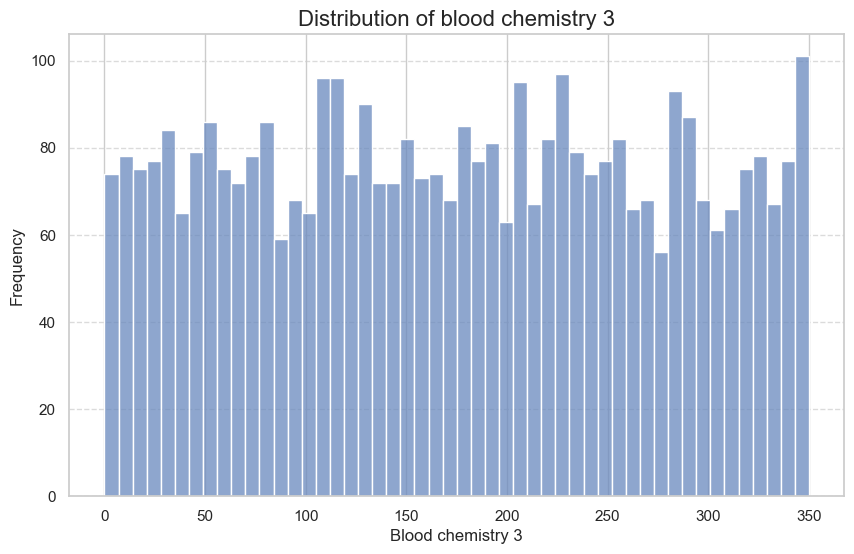

In [12]:
# Plot the distribution of the blood_chemistry_3 variable
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(df["blood_chemistry_3"], bins=50, color=sns.color_palette("twilight_shifted")[1])
plt.title("Distribution of blood chemistry 3", fontsize=16)
plt.xlabel("Blood chemistry 3", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
# Calculate coefficient of variation
cv = (df["blood_chemistry_3"].std() / df["blood_chemistry_3"].mean()) * 100
print(cv)

57.93062059479326


The range of blood chemistry 3 variable spans from 0 to 350. When grouped into bins, the counts of values in each bin are fairly even, with minor variations. However, the coefficient of variation (57.93%) indicates a **high degree of variability** within the data. Although there is no significant skew or concentration for specific value ranges, the data exhibits notable spread, suggesting that the **values fluctuate considerably** across the dataset.

In [14]:
# Calculate basic statistics
print(df['blood_chemistry_3'].describe())

count    3840.000000
mean      174.164581
std       100.894623
min         0.000000
25%        86.000000
50%       175.000000
75%       259.000000
max       350.000000
Name: blood_chemistry_3, dtype: float64


**Impact of blood chemistry 3 on disease status**

To assess whether including the blood chemistry 3 variable in the model makes sense, it is essential to understand its impact on the predicted target. Additionally, beyond examining the distribution of blood chemistry 3 by disease, it was considered whether aggregating this variable at the level of the unique patient identifier (using mean, median, standard deviation or range) might be more appropriate. 

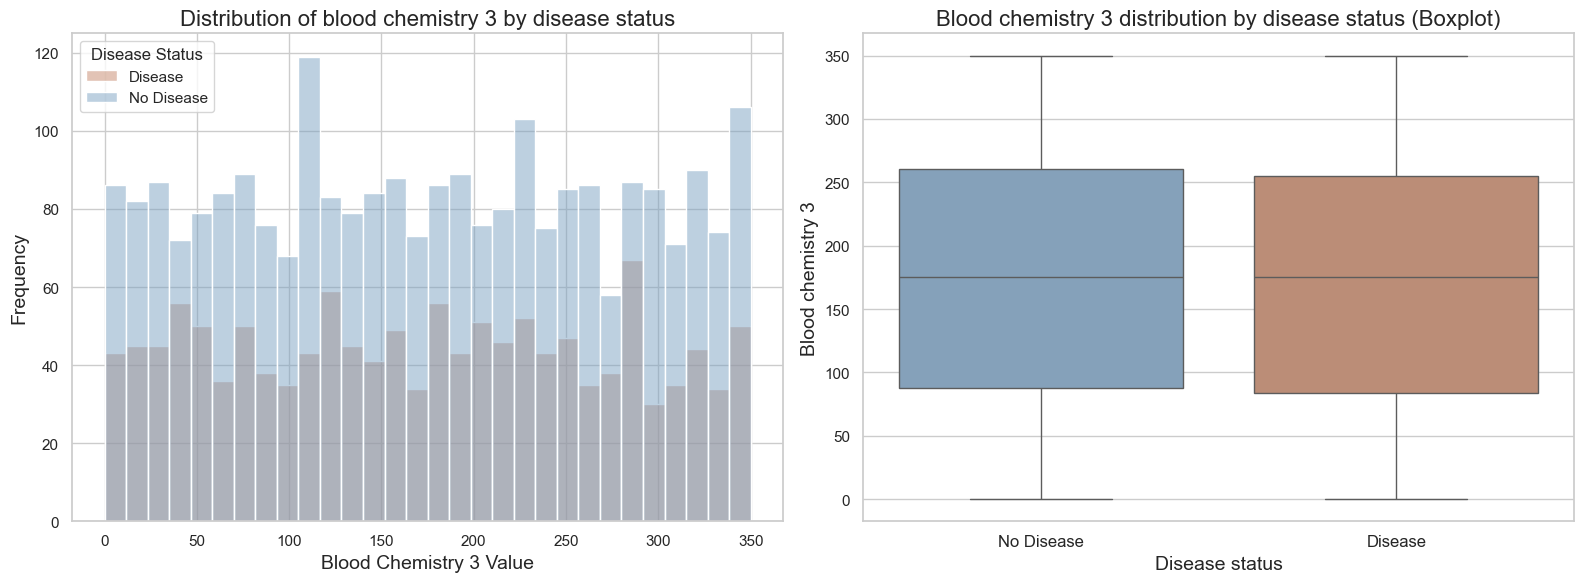

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
sns.histplot(data=df, x='blood_chemistry_3', hue='outcome',  bins=30, palette='twilight_shifted', ax=axes[0])
axes[0].set_title('Distribution of blood chemistry 3 by disease status', fontsize=16)
axes[0].set_xlabel('Blood Chemistry 3 Value', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].legend(title='Disease Status', labels=['Disease', 'No Disease'])

# Boxplot
sns.boxplot(data=df, x='outcome', y='blood_chemistry_3', palette='twilight_shifted', ax=axes[1])
axes[1].set_title('Blood chemistry 3 distribution by disease status (Boxplot)', fontsize=16)
axes[1].set_xlabel('Disease status', fontsize=14)
axes[1].set_ylabel('Blood chemistry 3', fontsize=14)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Disease', 'Disease'], fontsize=12)

plt.tight_layout()
plt.show()

In [16]:
# Calculate summary statistics for blood_chemistry_3 per unique_id
summary_stats = df.groupby('unique_id')['blood_chemistry_3'].agg(['min', 'max', 'mean', 'median', 'std'])
summary_stats['range'] = summary_stats['max'] - summary_stats['min']

summary_stats = summary_stats.merge(
    df[['unique_id', 'outcome']].drop_duplicates(),
    left_index=True,
    right_on='unique_id'
)

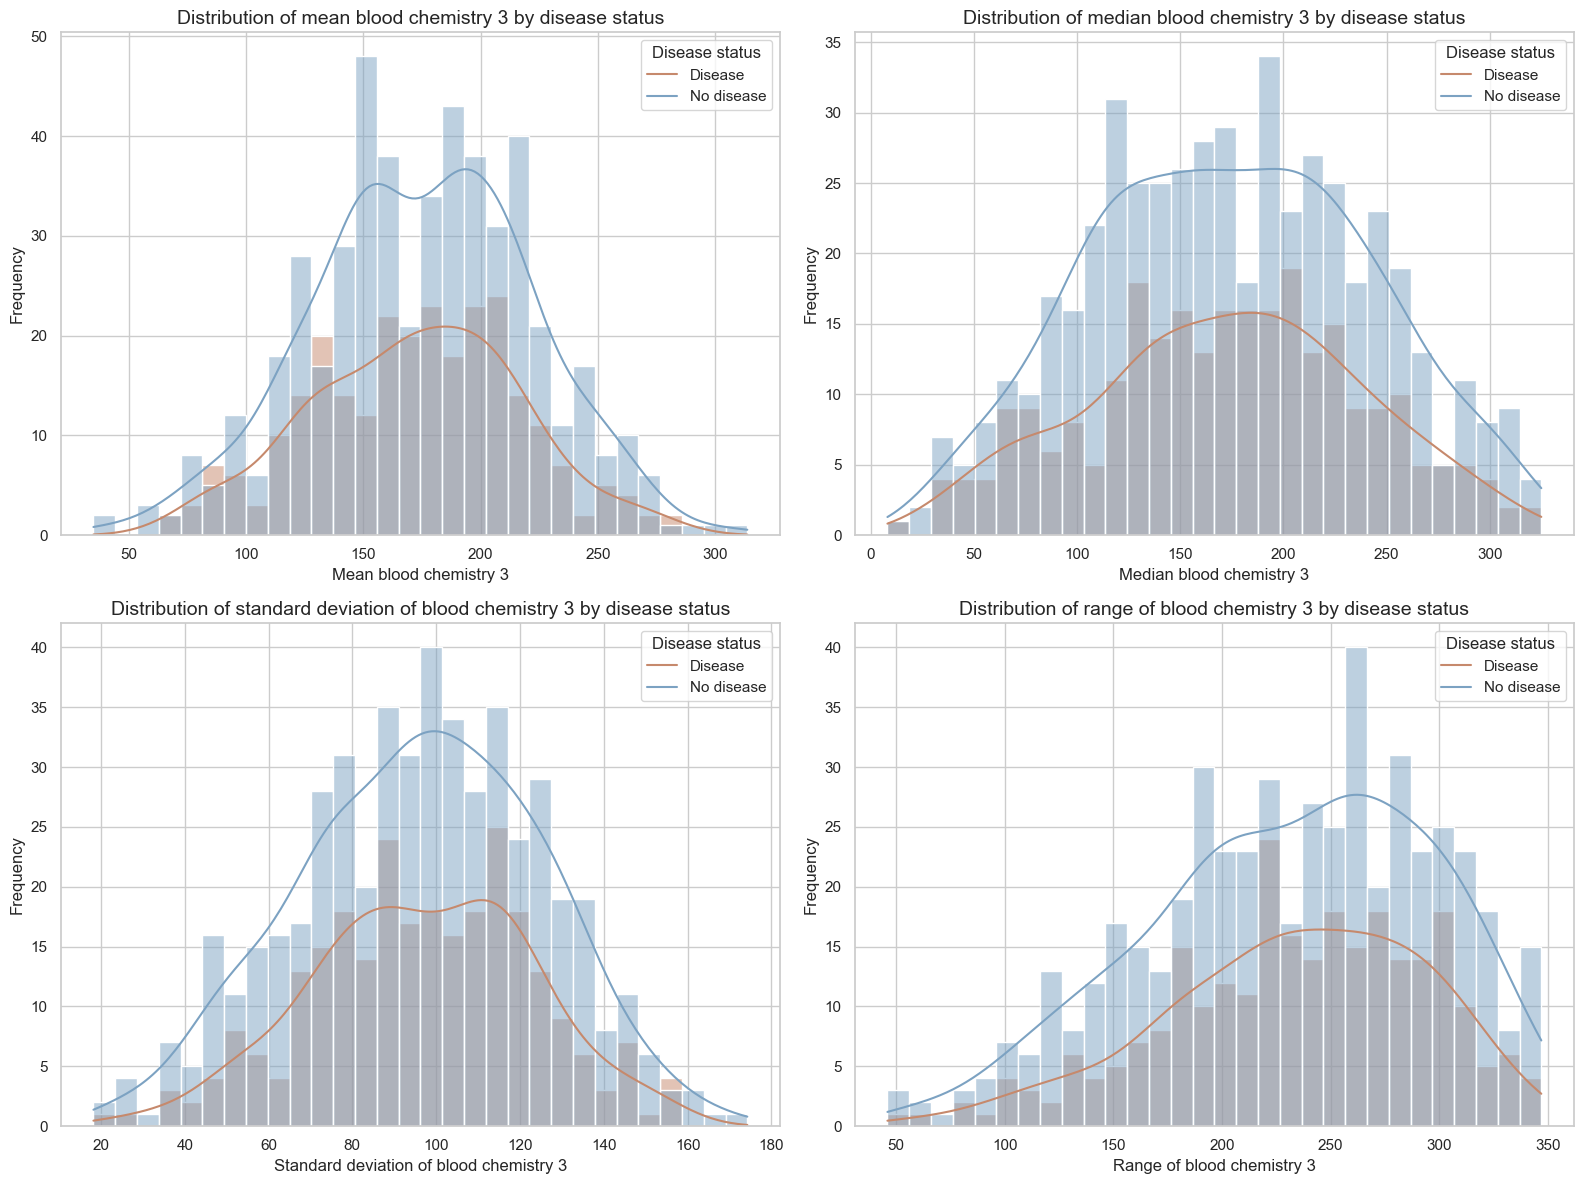

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Mean
sns.histplot(data=summary_stats, x='mean', hue='outcome', kde=True, bins=30, palette='twilight_shifted', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of mean blood chemistry 3 by disease status', fontsize=14)
axes[0, 0].set_xlabel('Mean blood chemistry 3', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend(title='Disease status', labels=['Disease', 'No disease'])

# Median
sns.histplot(data=summary_stats, x='median', hue='outcome', kde=True, bins=30, palette='twilight_shifted', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of median blood chemistry 3 by disease status', fontsize=14)
axes[0, 1].set_xlabel('Median blood chemistry 3', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].legend(title='Disease status', labels=['Disease', 'No disease'])

# Standard Deviation (SD)
sns.histplot(data=summary_stats, x='std', hue='outcome', kde=True, bins=30, palette='twilight_shifted', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of standard deviation of blood chemistry 3 by disease status', fontsize=14)
axes[1, 0].set_xlabel('Standard deviation of blood chemistry 3', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].legend(title='Disease status', labels=['Disease', 'No disease'])

# Range
sns.histplot(data=summary_stats, x='range', hue='outcome', kde=True, bins=30, palette='twilight_shifted', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of range of blood chemistry 3 by disease status', fontsize=14)
axes[1, 1].set_xlabel('Range of blood chemistry 3', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].legend(title='Disease status', labels=['Disease', 'No disease'])

plt.tight_layout()
plt.show()

Above charts **do not reveal any significant differences between the distributions**. The distribution levels for patients with the disease are lower, but this is primarily due to the smaller amount of ill patients compared to healthy patients. Additionally, when aggregating the blood chemistry 3 variable by unique id, no meaningful differences are observed between the outcome groups. Based on the analysis, there is **no observable relationship between blood chemistry 3 and the outcome variable**, and the variable’s distribution does not show meaningful differences across outcome groups. This suggests that blood chemistry 3 may not be a strong predictor of the disease

**Relationship between blood chemistry and other explanatory variables**

In the next step, the correlation between blood chemistry 3 and other features was examined.

In [18]:
# Correlations
correlation_matrix = df[['num_pregnancies', 'blood_chemistry_1',
       'blood_chemistry_2', 'blood_chemistry_3', 'blood_pressure',
       'skin_thickness_condition', 'bmi', 'genetic_predisposition_factor',
       'age', 'air_quality_index']].corr()
print(correlation_matrix['blood_chemistry_3'])

num_pregnancies                 -0.013053
blood_chemistry_1               -0.014146
blood_chemistry_2                0.003064
blood_chemistry_3                1.000000
blood_pressure                  -0.023591
skin_thickness_condition        -0.008223
bmi                              0.015733
genetic_predisposition_factor   -0.005628
age                             -0.016700
air_quality_index                0.005920
Name: blood_chemistry_3, dtype: float64


The correlations show that blood chemistry 3 has almost **no significant relationship** with the other variables in the dataset. Blood chemistry 3 appears to be **largely independent** of the factors such as number of pregnancies, blood pressure, skin thickness, BMI, age, and air quality in this dataset. These results suggest that blood chemistry 3 may not be directly influenced by the variables considered here, at least not in a linear manner.

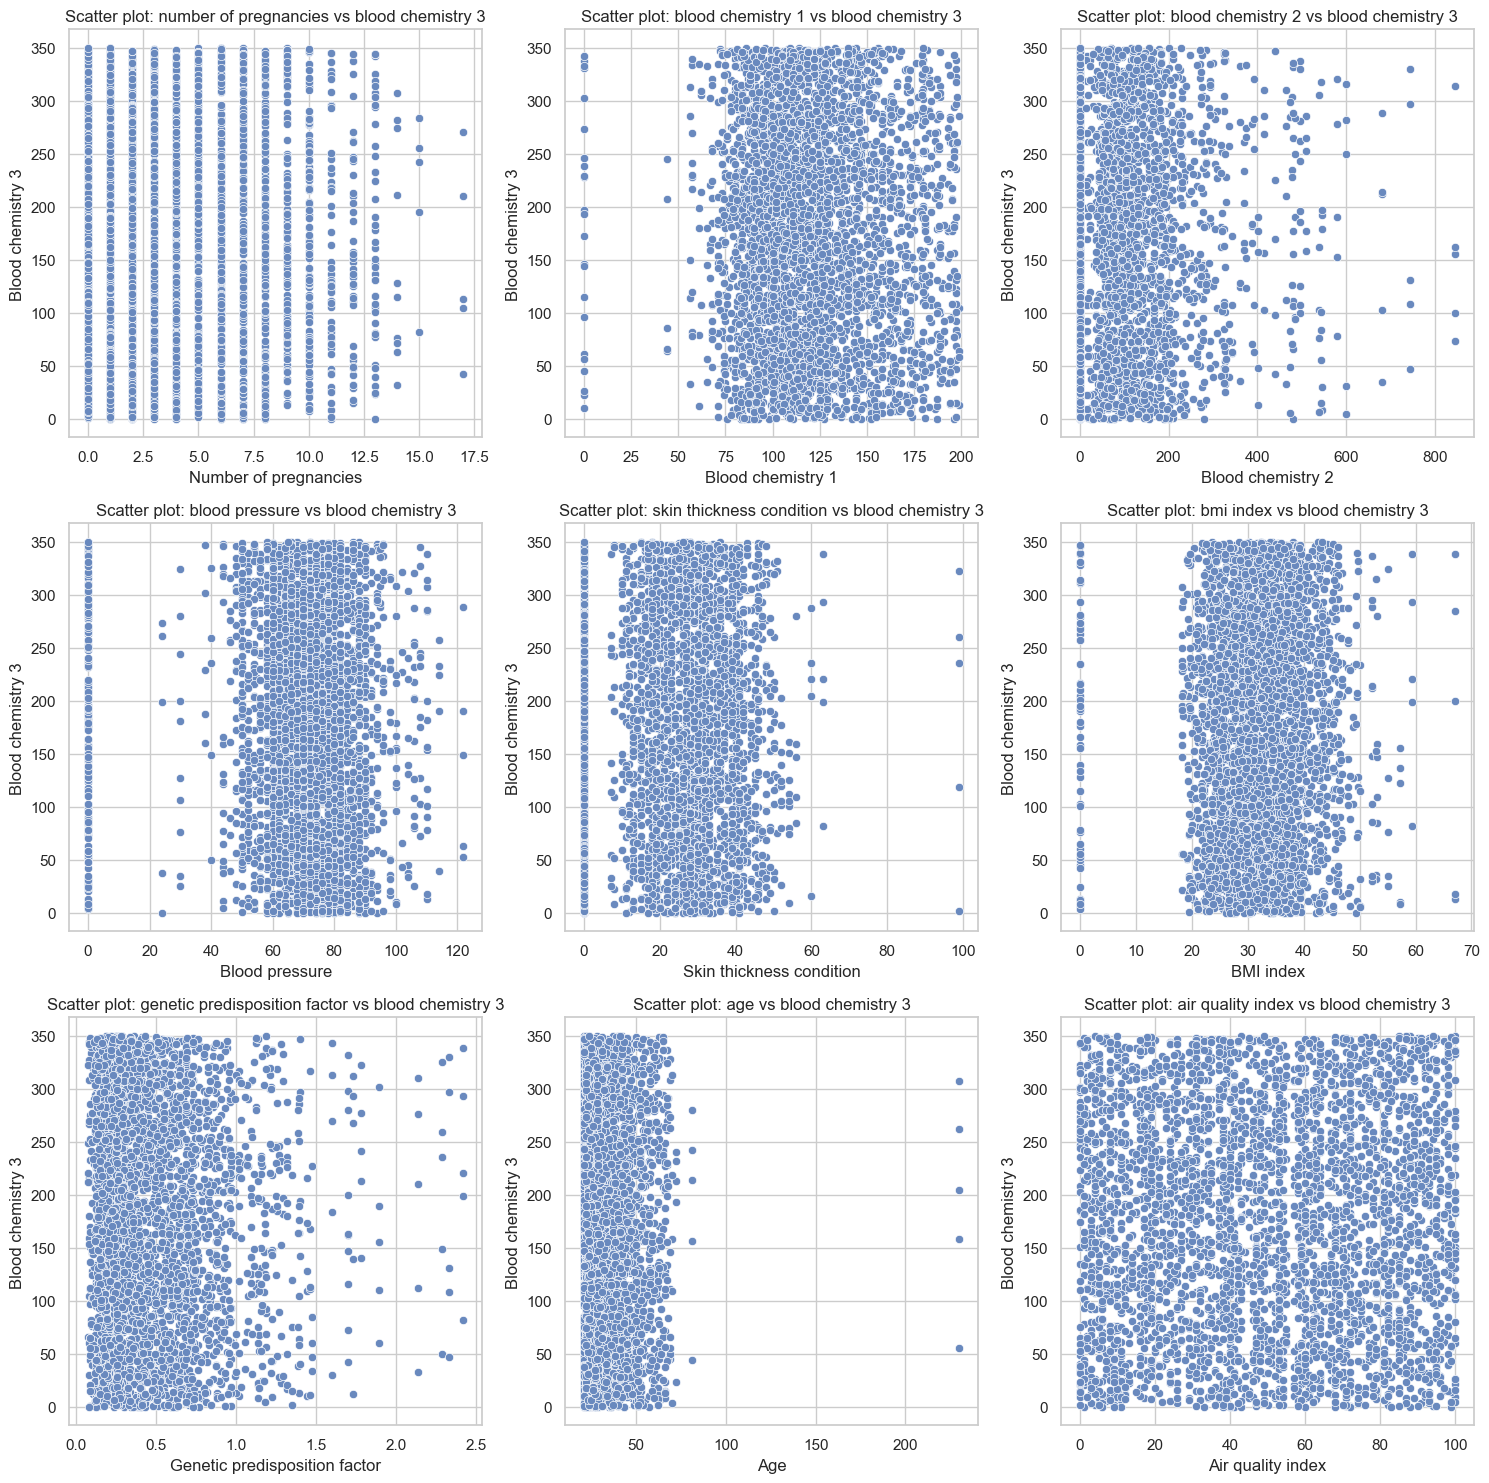

In [19]:
# Mapping of column names to desired names on plots
column_names_mapping = {
    'num_pregnancies': 'Number of pregnancies',
    'blood_chemistry_1': 'Blood chemistry 1',
    'blood_chemistry_2': 'Blood chemistry 2',
    'blood_pressure': 'Blood pressure',
    'skin_thickness_condition': 'Skin thickness condition',
    'bmi': 'BMI index',
    'genetic_predisposition_factor': 'Genetic predisposition factor',
    'age': 'Age',
    'air_quality_index': 'Air quality index'
}

plt.figure(figsize=(15, 15))

# Create scatter plots for each variable
for i, col in enumerate(column_names_mapping.keys(), 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[col], y=df['blood_chemistry_3'], color=sns.color_palette("twilight_shifted")[1])
    plt.title(f'Scatter plot: {column_names_mapping[col].lower()} vs blood chemistry 3')
    plt.xlabel(column_names_mapping[col])
    plt.ylabel('Blood chemistry 3')

plt.tight_layout()
plt.show()

It seems that all the other features are **evenly spread out in relation to blood chemistry 3**. The fact that there is no visible dependency between this and other variables might seem unusual, especially considering the biological context. In medical and biological data, we typically expect certain variables to be correlated, as blood chemistry measures are often influenced by factors like age, BMI, blood pressure, and other health indicators. 

To sum up, the variable does **not show significant correlation with either the target variable or other features** in the model. Also aggregating it by unique id does not seem to offer meaningful improvements. Additionally, there is some **uncertainty regarding the correctness and interpretation of this variable**. The dataset might contain multiple entries for the same patient (same unique_id), with **each record potentially representing a different time point, condition, or other distinguishing factor**. If blood chemistry 3 represents a metric that can change over time or in response to specific conditions (e.g., treatments, follow-ups), its values might differ for the same patient, even if other features remain constant. However, **the dataset lacks a column indicating such factors**, such as time points of observations, making it difficult to understand how this variable changes over time or to determine differences between subsequent measurements. Based on these observations, it seems reasonable to **exclude this variable from the model** to avoid introducing unnecessary complexity or noise.

In [20]:
# Remove the 'blood_chemistry_3' column from the dataFrame
df = df.drop(columns=['blood_chemistry_3'])

# Remove duplicated record with the same unique_id
df = df.drop_duplicates()

# Reset the index after dropping duplicates
df = df.reset_index(drop=True)

df.head()

unique_id  num_pregnancies  blood_chemistry_1  blood_chemistry_2  \
0    5642118                1                0.0               23.0   
1    5642119                1                0.0                0.0   
2    5642120                1                0.0                0.0   
3    5642121                5               44.0                0.0   
4    5642122                2               56.0               45.0   

   blood_pressure  skin_thickness_condition        bmi  \
0            74.0                      20.0  27.700001   
1            68.0                      35.0  32.000000   
2            48.0                      20.0  24.700001   
3            62.0                       0.0  25.000000   
4            56.0                      28.0  24.200001   

   genetic_predisposition_factor  age  air_quality_index state  outcome  
0                          0.299   21               38.0    CA        0  
1                          0.389   22               10.0    CA        0  
2                          0.140   22               77.0    CA        0  
3                          0.587   36               40.0    OR        0  
4                          0.332   22               70.0    CT        0

In [21]:
df.shape

(768, 12)

### Target

In the next step, the dataset was analyzed for the disease status, with the following counts and percentages of positively and negatively diagnosed patients presented on a chart below. Additionally, potential missing data was checked to ensure the accuracy and completeness of the dataset before conducting the analysis.

In [22]:
df['outcome'].isna().sum()

0

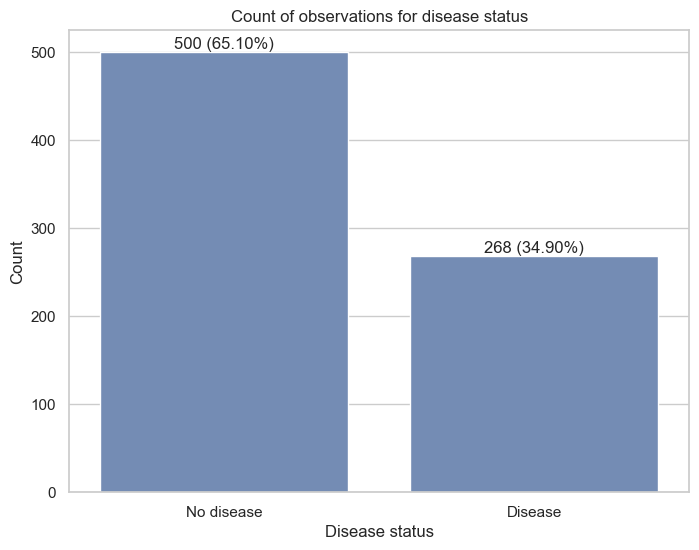

In [23]:
# Calculate counts and percentages
count_0 = df['outcome'].value_counts()[0]
count_1 = df['outcome'].value_counts()[1]
total_count = len(df)
percent_0 = (count_0 / total_count) * 100
percent_1 = (count_1 / total_count) * 100

# Plot the bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='outcome', data=df, color=sns.color_palette("twilight_shifted")[1])
plt.title('Count of observations for disease status')
plt.xlabel('Disease status')
plt.ylabel('Count')
plt.xticks([0, 1], ['No disease', 'Disease'])

# Add count and percentage on top of the bars
for i, count in enumerate([count_0, count_1]):
    ax.text(i, count + 0.00 * total_count, f'{count} ({(count / total_count) * 100:.2f}%)', 
            ha='center', va='bottom', fontsize=12)

plt.show()

The dataset contains 500 observations with with no disease (65.1%) and 268 observations with disease diagnosed (34.9%). This indicates an **imbalance**, with the number of cases of not ill patients being about 1.9 times greater than the number of ill patients.

### Explanatory variables

All numeric features were presented using distribution plots and histograms to get a general understanding of the data.

In [24]:
def plot_histogram_and_boxplot(data, column, column_names_mapping):

    readable_name = column_names_mapping.get(column, column)
    
    # Avoid converting BMI to lowercase
    if readable_name != "BMI index":
        readable_name = readable_name.lower()
        
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    if column == "num_pregnancies":
        max_val = int(data[column].max())
        bins = np.arange(0, max_val + 2) - 0.5
        sns.histplot(data[column], kde=True, bins=bins, color=sns.color_palette("twilight_shifted")[1])
        plt.xticks(range(0, max_val + 1))
    elif column == "air_quality_index":
        sns.histplot(data[column], bins=30, color=sns.color_palette("twilight_shifted")[1])
    else:
        sns.histplot(data[column], kde=True, bins=30, color=sns.color_palette("twilight_shifted")[1])
    
    plt.title(f"Histogram of {readable_name}", fontsize=13)
    plt.xlabel(readable_name, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {readable_name}", fontsize=13)
    plt.xlabel(readable_name, fontsize=12)

    plt.tight_layout()
    plt.show()

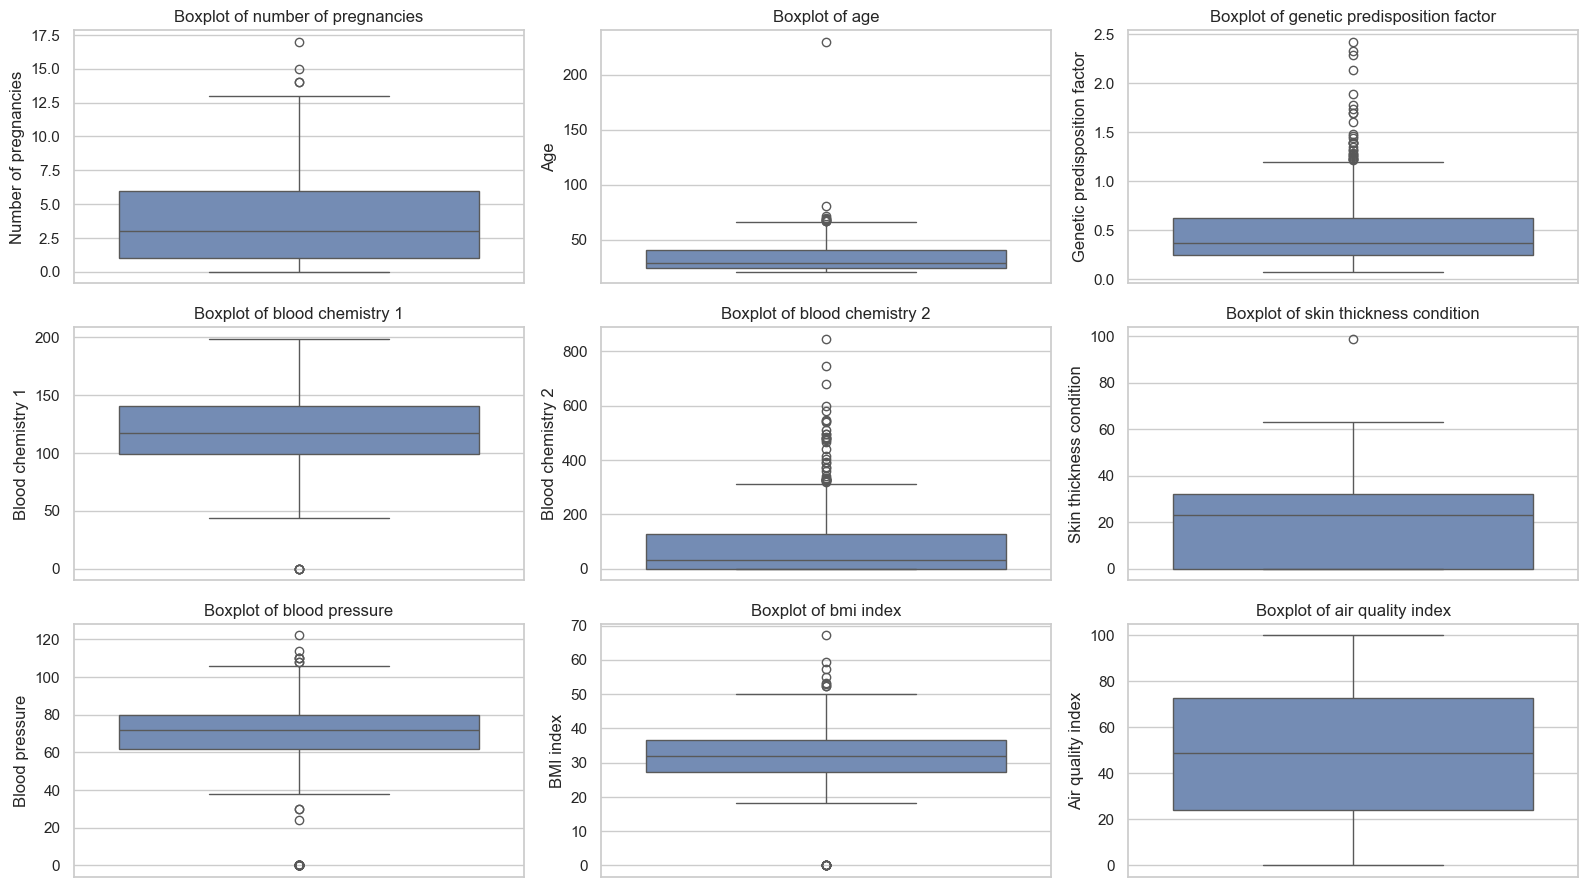

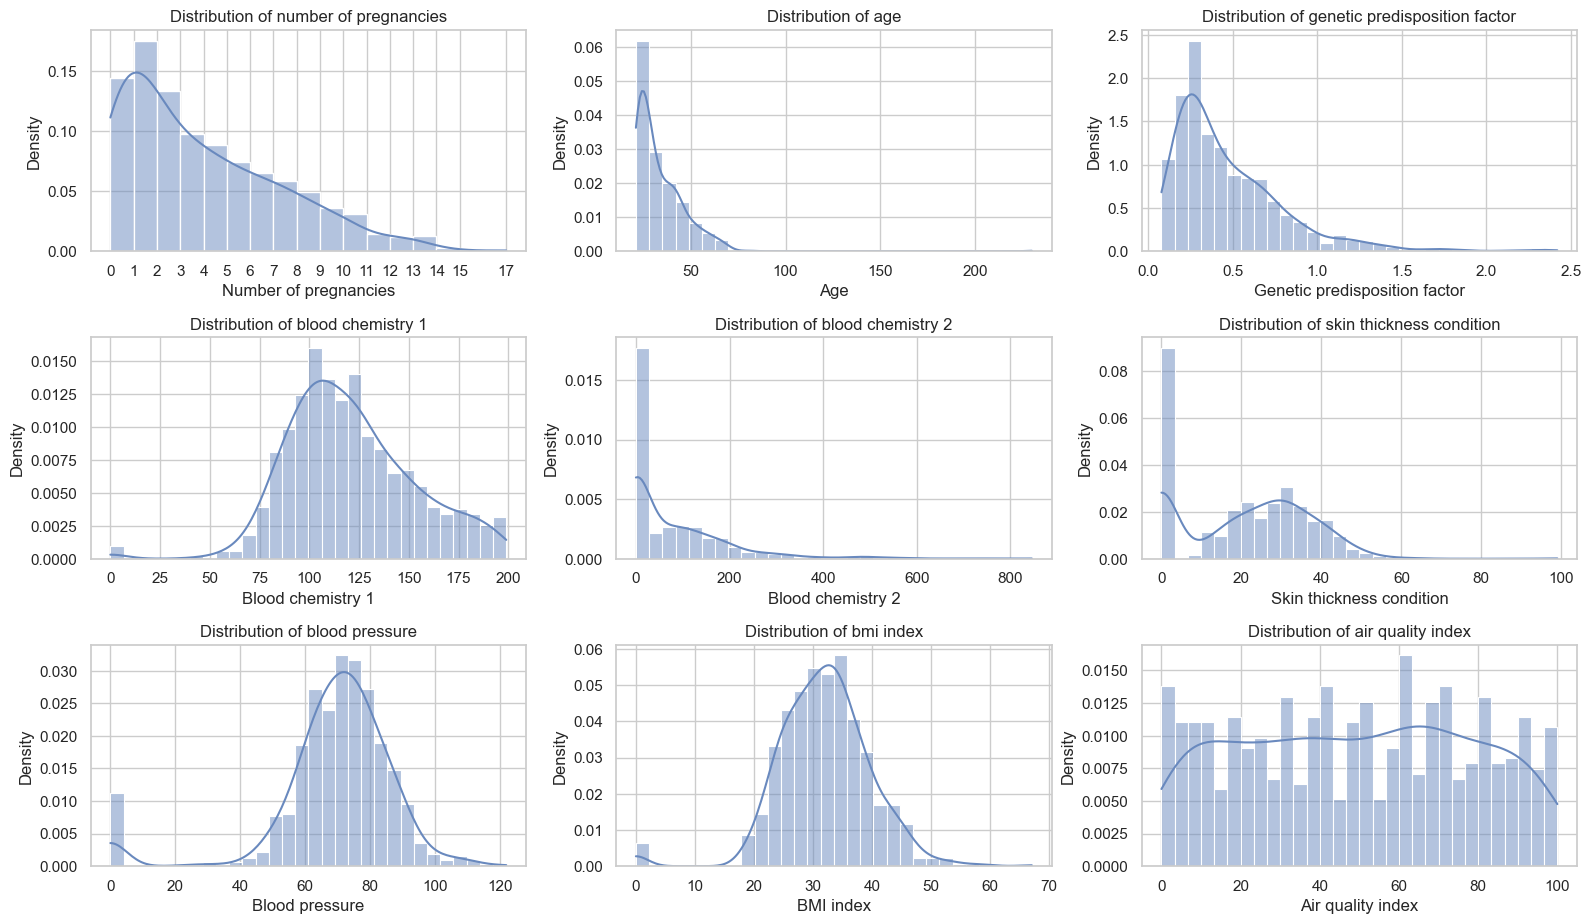

In [25]:
columns_of_interest = ['num_pregnancies', 'age', 'genetic_predisposition_factor',
                       'blood_chemistry_1', 'blood_chemistry_2', 'skin_thickness_condition',
                       'blood_pressure', 'bmi', 'air_quality_index']

# Boxplots
plt.figure(figsize=(16, 12))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(4, 3, i) 
    sns.boxplot(df[column], color=sns.color_palette("twilight_shifted")[1])
    plt.title(f"Boxplot of {column_names_mapping[column].lower()}")
    plt.ylabel(column_names_mapping[column])

plt.tight_layout()
plt.show()

# Distribution plots
plt.figure(figsize=(16, 12))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(4, 3, i)
    
    # For number of pregnancies use one bin for each value
    if column == 'num_pregnancies':
        unique_values = sorted(df[column].dropna().unique())
        sns.histplot(df[column], kde=True, bins=len(unique_values), stat='density', color=sns.color_palette("twilight_shifted")[1])
        plt.xticks(unique_values)
    else:
        sns.histplot(df[column], kde=True, bins=30, stat='density', color=sns.color_palette("twilight_shifted")[1])
    
    plt.title(f"Distribution of {column_names_mapping[column].lower()}")
    plt.xlabel(column_names_mapping[column])
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

One noticeable observation is the **high frequency of zero values** in five variables: blood chemistry 1, blood chemistry 2, blood pressure, skin thickness condition, and BMI index. These zeros are highly prominent in the plots. In all cases, they appear somewhat unusual and do not seem to be valid or legitimate values. In most cases, the bar with **zeros is positioned far away from the main distribution plot**. For features such as blood pressure and BMI index, these values are clearly incorrect. Similarly, the values for skin thickness condition appear to be invalid, especially given the noticeable gap from the rest of the values. For blood pressure 1 and blood pressure 2, although the presence of zeros seems unreasonable based on the distributions, the meaning of these variables might be unclear, making it difficult to determine the exact cause. Therefore, further investigation will be conducted in the next steps.

What can also be observed are some **outliers** visible for multiple variables in the plot, particularly in the case of age,  with the biggest one for age - value exceeding 200 years. Since **logistic regression used in subsequent steps is vulnerable to outliers** and may overfit to them, the outliers will be reviewed and removed in the next steps.

In [26]:
# Calculate missing values and zeros for the columns
missing_data_count = df[columns_of_interest].isna().sum()
zeros_count = (df[columns_of_interest] == 0).sum()

summary_table = pd.DataFrame({
    'Column': columns_of_interest,
    'Missing Values': missing_data_count.values,
    'Zeros': zeros_count.values
})

summary_table

Column  Missing Values  Zeros
0                num_pregnancies               0    111
1                            age               0      0
2  genetic_predisposition_factor               0      0
3              blood_chemistry_1               5      5
4              blood_chemistry_2               2    373
5       skin_thickness_condition               1    227
6                 blood_pressure               0     35
7                            bmi               0     11
8              air_quality_index               6     11

#### Number of pregnancies

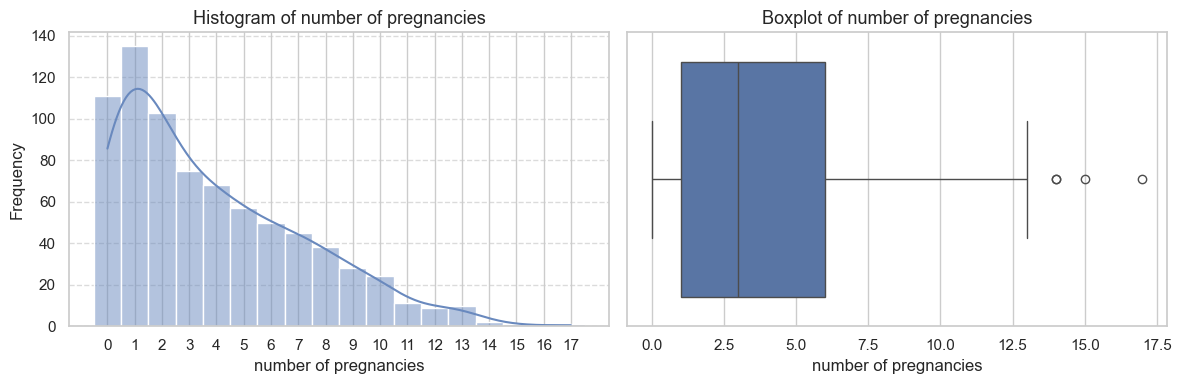

In [27]:
plot_histogram_and_boxplot(data=df, column="num_pregnancies", column_names_mapping=column_names_mapping)

It can be seen that the plot for number of pregnancies is highly **right-skewed**, meaning that most of the data points are concentrated on the lower end of the distribution, with a few observations stretching towards higher values. This is a typical distribution for the number of pregnancies, where most individuals have fewer pregnancies, and a smaller number have many more. Few **observations for a high number of pregnancies** (14, 15, and 17) can also be observed. While such high numbers are less common, they are still within the realm of possibility, especially when considering advanced maternal ages such as 38-47 years. As such observations can represent real-world data, removing them could lead to a loss of important insights.

In [28]:
df.sort_values(by='num_pregnancies', ascending=False).head(5)

unique_id  num_pregnancies  blood_chemistry_1  blood_chemistry_2  \
693    5642811               17              163.0              114.0   
625    5642743               15              136.0              110.0   
519    5642637               14              100.0              184.0   
720    5642838               14              175.0                0.0   
592    5642710               13              126.0                0.0   

     blood_pressure  skin_thickness_condition        bmi  \
693            72.0                      41.0  40.900002   
625            70.0                      32.0  37.099998   
519            78.0                      25.0  36.599998   
720            62.0                      30.0  33.599998   
592            90.0                       0.0  43.400002   

     genetic_predisposition_factor  age  air_quality_index state  outcome  
693                          0.817   47               39.0    AL        1  
625                          0.153   43               87.0    SC        1  
519                          0.412   46                8.0    WA        1  
720                          0.212   38               82.0    LA        1  
592                          0.583   42               84.0    OH        1

#### Age

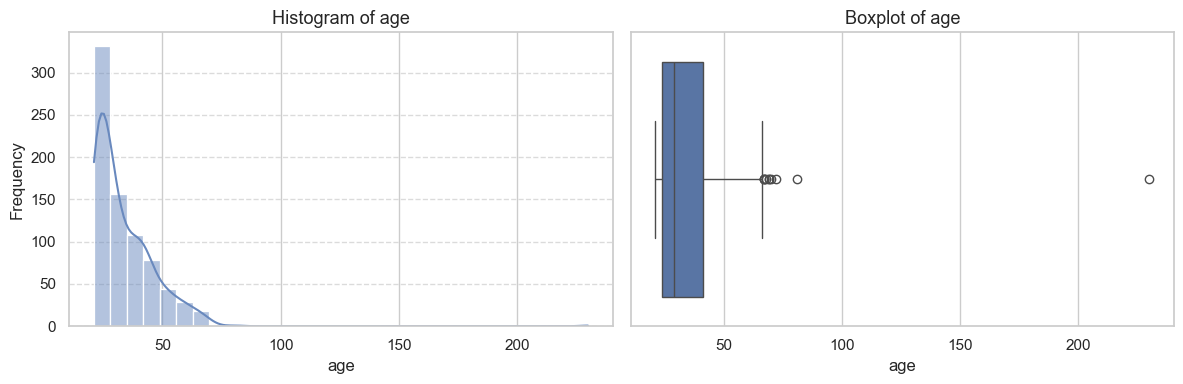

In [29]:
plot_histogram_and_boxplot(data=df, column="age", column_names_mapping=column_names_mapping)

Similarly to the number of pregnancies, the distribution of age is also **right-skewed**, indicating that younger females were more likely to undergo testing for the disease. It can also be observed that there is a significantly **outlying value of 230 years**, which is clearly incorrect and likely a result of some error. Therefore, this observation will be dropped.

In [30]:
 df[(df['age'] == 230)]

unique_id  num_pregnancies  blood_chemistry_1  blood_chemistry_2  \
159    5642277                1               97.0               82.0   

     blood_pressure  skin_thickness_condition        bmi  \
159            64.0                      19.0  18.200001   

     genetic_predisposition_factor  age  air_quality_index state  outcome  
159                          0.299  230               58.0    WI        0

In [31]:
df = df[(df['age'] < 90) | (df['age'].isna())]

#### BMI

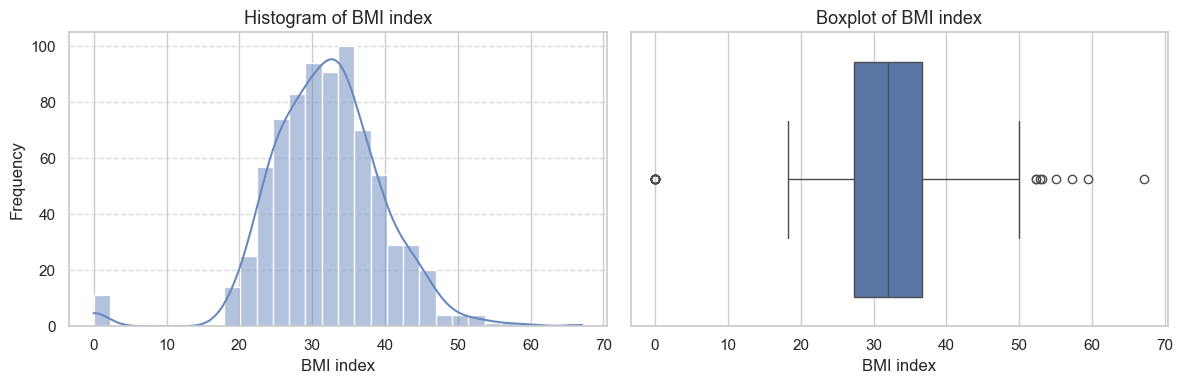

In [32]:
plot_histogram_and_boxplot(data=df, column="bmi", column_names_mapping=column_names_mapping)

The distribution of BMI appears to be **concentrated around a central peak**, likely indicating that most individuals have BMI values within a typical range. However, there are some noticeable deviations, with a **few high values** which can represent cases of severe obesity. One of the most extreme outliers, located farthest outside the main part of the boxplot with the largest difference from the other values, will be removed from the dataset. Although a BMI of 67 is technically possible, it is highly rare and typically beyond what is observed in the general population, especially for women. 

Additionally, as already mentioned before, the presence of BMI zero values, which are biologically implausible, might indicate **potential data errors** or **placeholders for missing data**.

In [33]:
df.sort_values(by='bmi', ascending=False).head(5)

unique_id  num_pregnancies  blood_chemistry_1  blood_chemistry_2  \
600    5642718                0              129.0              130.0   
729    5642847                0              180.0               14.0   
356    5642474                3              123.0              240.0   
506    5642624                1               88.0               99.0   
687    5642805                0              162.0              100.0   

     blood_pressure  skin_thickness_condition        bmi  \
600           110.0                      46.0  67.099998   
729            78.0                      63.0  59.400002   
356           100.0                      35.0  57.299999   
506            30.0                      42.0  55.000000   
687            76.0                      56.0  53.200001   

     genetic_predisposition_factor  age  air_quality_index state  outcome  
600                          0.319   26               64.0    MD        1  
729                          2.420   25               86.0    IL        1  
356                          0.880   22                5.0    FL        0  
506                          0.496   26               67.0    MA        1  
687                          0.759   25               23.0    GA        1

In [34]:
df = df[(df['bmi'] < 60) | (df['bmi'].isna())]

#### Blood pressure

The distribution of blood pressure is **symetrical and bell-curved**. Similar to BMI, there are a few extreme high values, sauggesting the **presence of outliers**, possibly representing cases of severe hypertension. As they could disproportionately influence the results, some of them were removed to ensure the accuracy and reliability of the model.

Additionally, there are instances of blood pressure values close to zero, which, like BMI, are biologically implausible and may indicate data errors or missing values.

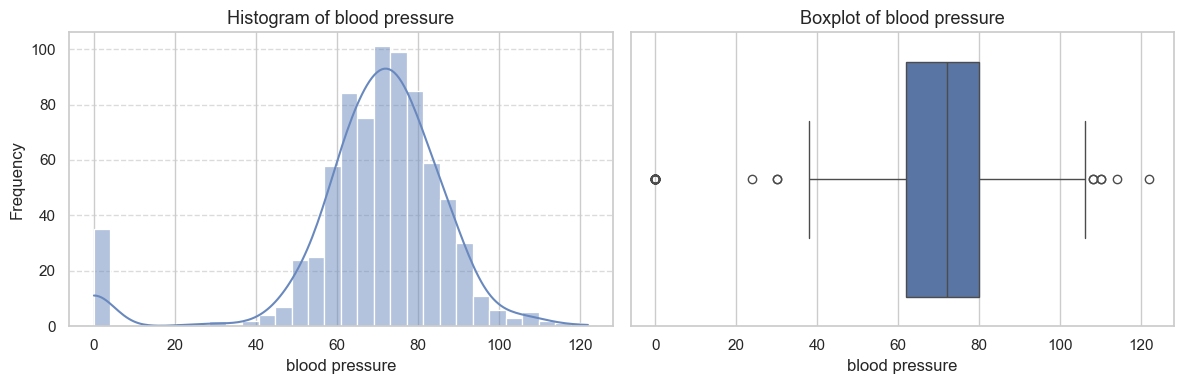

In [35]:
plot_histogram_and_boxplot(data=df, column="blood_pressure", column_names_mapping=column_names_mapping)

In [36]:
df.sort_values(by='blood_pressure', ascending=False).head(5)

unique_id  num_pregnancies  blood_chemistry_1  blood_chemistry_2  \
148    5642266                1               96.0                0.0   
680    5642798               13              158.0                0.0   
711    5642829                9              171.0              240.0   
491    5642609                4              189.0                0.0   
216    5642334                5              103.0                0.0   

     blood_pressure  skin_thickness_condition        bmi  \
148           122.0                       0.0  22.400000   
680           114.0                       0.0  42.299999   
711           110.0                      24.0  45.400002   
491           110.0                      31.0  28.500000   
216           108.0                      37.0  39.200001   

     genetic_predisposition_factor  age  air_quality_index state  outcome  
148                          0.207   27               54.0    MN        0  
680                          0.257   44               54.0    TX        1  
711                          0.721   54               65.0    CA        1  
491                          0.680   37               74.0    PA        0  
216                          0.305   65               91.0    SD        0

In [37]:
df[df['blood_pressure'] > 0].sort_values(by='blood_pressure', ascending=True).head(5)

unique_id  num_pregnancies  blood_chemistry_1  blood_chemistry_2  \
91     5642209                1               89.0               25.0   
212    5642330                1              103.0               83.0   
506    5642624                1               88.0               99.0   
264    5642382                1              109.0              120.0   
626    5642744                0              137.0              168.0   

     blood_pressure  skin_thickness_condition        bmi  \
91             24.0                      19.0  27.799999   
212            30.0                      38.0  43.299999   
506            30.0                      42.0  55.000000   
264            38.0                      18.0  23.100000   
626            40.0                      35.0  43.099998   

     genetic_predisposition_factor  age  air_quality_index state  outcome  
91                           0.559   21               33.0    CA        0  
212                          0.183   33               72.0    OH        0  
506                          0.496   26               67.0    MA        1  
264                          0.407   26               37.0    MA        0  
626                          2.288   33               11.0    AZ        1

In [38]:
df = df[((df['blood_pressure'] > 35) & (df['blood_pressure'] < 120)) | (df['blood_pressure'].isna())  | (df['blood_pressure'] == 0)]

#### Blood chemistry 1 and 2

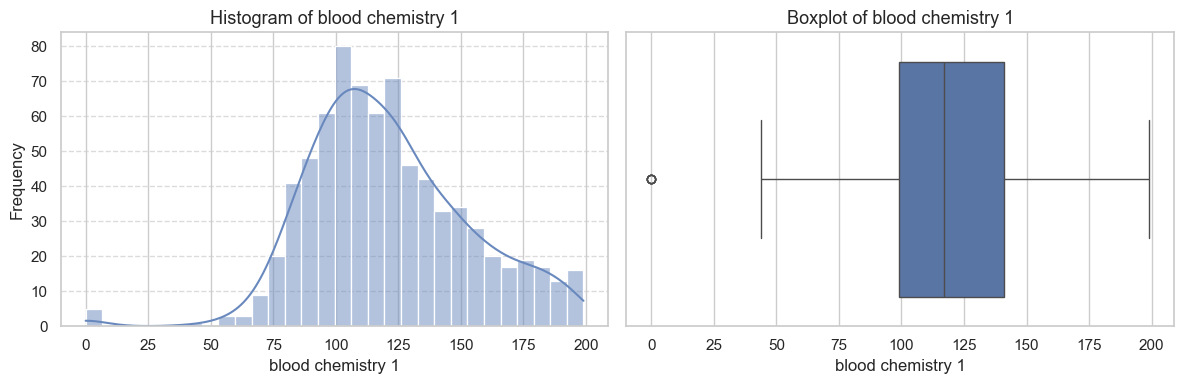

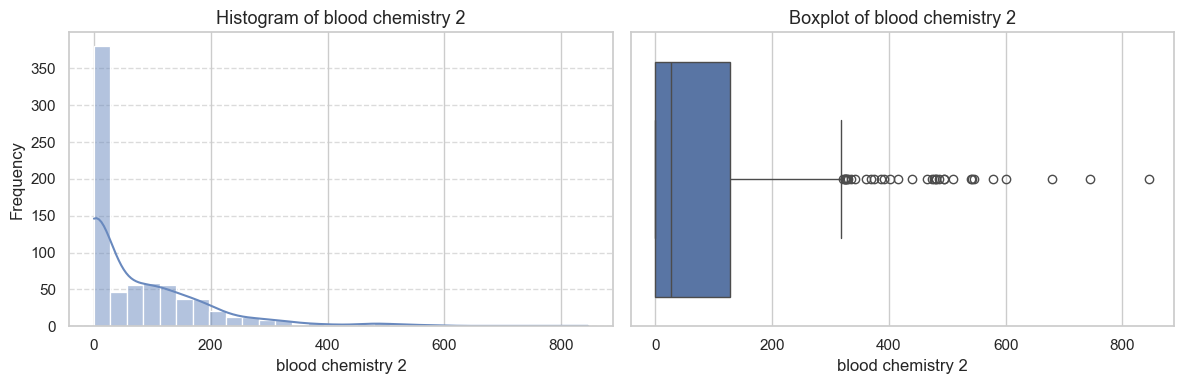

In [39]:
plot_histogram_and_boxplot(data=df, column="blood_chemistry_1", column_names_mapping=column_names_mapping)
plot_histogram_and_boxplot(data=df, column="blood_chemistry_2", column_names_mapping=column_names_mapping)

Blood chemistry 1 appears **slightly left-skewed**, with the overall distribution resembling a **bell curve**. However, there is an **unusual peak in the frequency of zero values** on the left side, which stands out compared to the distribution of other values. This is particularly noticeable as this peak is far from the main body of the data. Additionally, **distribution seems to abruptly end around the value of 199**, which may suggest some data limitations or measurement thresholds.

A similar **spike of zero values** is observed for blood chemistry 2. Despite the smaller gap between the peak and the main distribution, the high frequency of zero observations is definitelly more pronounced and concerning. 

In both cases, the high presence of zero values seems unnatural and suggests a potential issue with the data distribution, warranting further investigation

For blood chemistry 2 variable, there are also some potential outlier values, which were deleted from the dataset.

In [40]:
df.sort_values(by='blood_chemistry_2', ascending=False).head(10)

unique_id  num_pregnancies  blood_chemistry_1  blood_chemistry_2  \
752    5642870                1              189.0              846.0   
495    5642613                4              197.0              744.0   
481    5642599                0              165.0              680.0   
584    5642702                8              124.0              600.0   
712    5642830                1              172.0              579.0   
472    5642590                5              155.0              545.0   
763    5642881                2              197.0              543.0   
669    5642787                2              155.0              540.0   
733    5642851                0              181.0              510.0   
736    5642854                8              181.0              495.0   

     blood_pressure  skin_thickness_condition        bmi  \
752            60.0                      23.0  30.100000   
495            70.0                      39.0  36.700001   
481            90.0                      33.0  52.299999   
584            76.0                      24.0  28.700001   
712            68.0                      49.0  42.400002   
472            84.0                      44.0  38.700001   
763            70.0                      45.0  30.500000   
669            52.0                      27.0  38.700001   
733            88.0                      44.0  43.299999   
736            68.0                      36.0  30.100000   

     genetic_predisposition_factor  age  air_quality_index state  outcome  
752                          0.398   59               27.0    IL        1  
495                          2.329   31               65.0    NC        0  
481                          0.427   23               19.0    FL        0  
584                          0.687   52               68.0    OR        1  
712                          0.702   28                1.0    MN        1  
472                          0.619   34               29.0    OH        0  
763                          0.158   53               53.0    PA        1  
669                          0.240   25                8.0    IL        1  
733                          0.222   26               17.0    LA        1  
736                          0.615   60               68.0    NY        1

In case of third record (unique id = 5642599), in addition to the high value of blood chemistry 2, the genetic predisposition factor shows extreme value, which is 2.329. This is much higher than the other values (most are in the range of 0.1-0.7). In addition, with such a high genetic predisposition factor, the patient was healthy, which may be correct, but seems a bit unexpected.

As the variable is highly right-skewed with several extremely outstanding observations forming a **heavy tail** on the right in a distribution, **four most outstanding values** were deleted to improve the model's performance and ensure more accurate results.

In [41]:
df = df[(df['blood_chemistry_2'] < 600) | (df['blood_chemistry_2'].isna()) | (df['blood_chemistry_2'] == 0)]

**Skin thinckess condition**

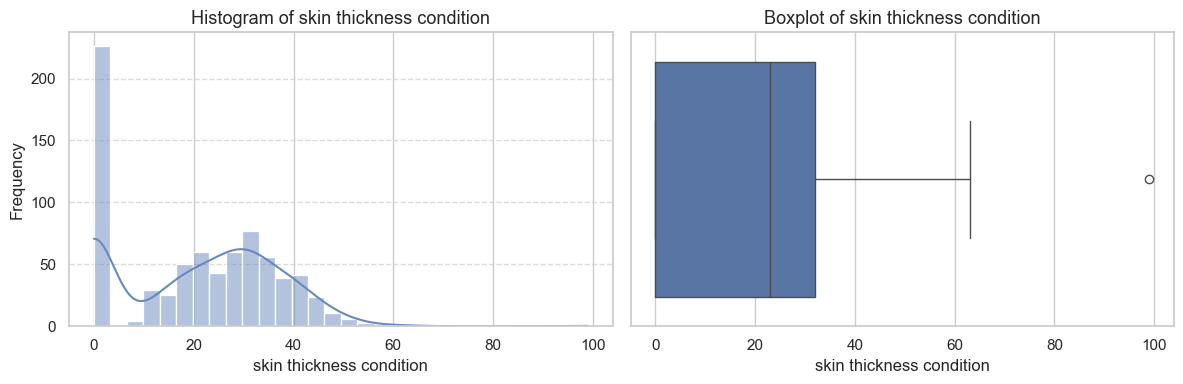

In [42]:
plot_histogram_and_boxplot(data=df, column="skin_thickness_condition", column_names_mapping=column_names_mapping)

For the skin thickness condition variable, a value close to 100 immediately stands out and will be removed from the dataset. Additionally, there is a significant number of zero values, which also do not seem to be realistic. However, instead of immediately replacing them with missing data, they will be examined more closely in subsequent steps of the analysis.

In [43]:
df.sort_values(by='skin_thickness_condition', ascending=False).head(5)

unique_id  num_pregnancies  blood_chemistry_1  blood_chemistry_2  \
764    5642882                2              197.0                0.0   
729    5642847                0              180.0               14.0   
188    5642306                0              100.0              110.0   
687    5642805                0              162.0              100.0   
240    5642358               13              106.0                0.0   

     blood_pressure  skin_thickness_condition        bmi  \
764            70.0                      99.0  34.700001   
729            78.0                      63.0  59.400002   
188            88.0                      60.0  46.799999   
687            76.0                      56.0  53.200001   
240            72.0                      54.0  36.599998   

     genetic_predisposition_factor  age  air_quality_index state  outcome  
764                          0.575   62                0.0    TX        1  
729                          2.420   25               86.0    IL        1  
188                          0.962   31               79.0    NC        0  
687                          0.759   25               23.0    GA        1  
240                          0.178   45               87.0    WA        0

In [44]:
df = df[(df['skin_thickness_condition'] < 80) | (df['skin_thickness_condition'].isna()) | (df['skin_thickness_condition'] == 0)]

#### Genetic predisposition factor

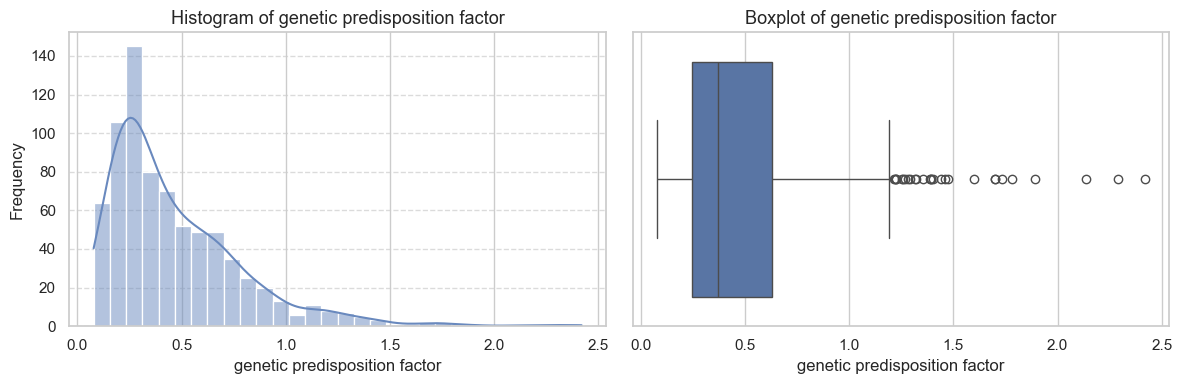

In [45]:
plot_histogram_and_boxplot(data=df, column="genetic_predisposition_factor", column_names_mapping=column_names_mapping)

In [46]:
df.sort_values(by='genetic_predisposition_factor', ascending=False).head(5)

unique_id  num_pregnancies  blood_chemistry_1  blood_chemistry_2  \
729    5642847                0              180.0               14.0   
626    5642744                0              137.0              168.0   
714    5642832                3              173.0              465.0   
728    5642846                0              180.0                0.0   
453    5642571                0              146.0                0.0   

     blood_pressure  skin_thickness_condition        bmi  \
729            78.0                      63.0  59.400002   
626            40.0                      35.0  43.099998   
714            82.0                      48.0  38.400002   
728            66.0                      39.0  42.000000   
453            82.0                       0.0  40.500000   

     genetic_predisposition_factor  age  air_quality_index state  outcome  
729                          2.420   25               86.0    IL        1  
626                          2.288   33               11.0    AZ        1  
714                          2.137   25               89.0    KS        1  
728                          1.893   25               54.0    GA        1  
453                          1.781   44                2.0    WA        0

**Air quality index**

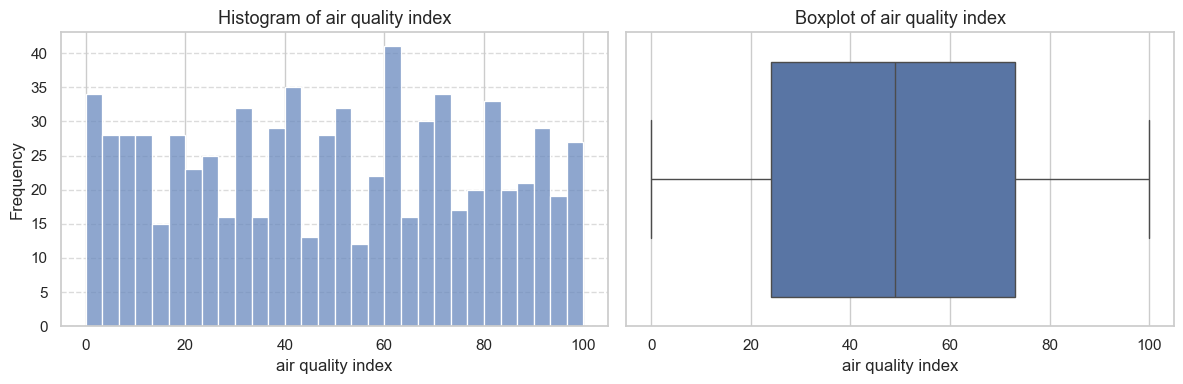

In [47]:
plot_histogram_and_boxplot(data=df, column="air_quality_index", column_names_mapping=column_names_mapping)

Unlike the other variables that exhibit a bell-curve distribution, the air quality index variable exhibits a **symmetric boxplot with no outliers**. However, its histogram shows **several fluctuations of varying heights**, but these variations appear to be random rather than indicating any clear pattern or clustering at specific values. There is **no visible clustering or concentration of values** around certain points, suggesting that the data does not follow a specific trend or grouping.

#### State

The state column contains 49 unique state abbreviations. It has been verified and corrected to ensure that these states exist and the abbreviations are accurate.

In [48]:
df['state'].isna().sum()

0

In [49]:
df["state"].unique()

['CA', 'OR', 'CT', 'UT', 'WV', ..., 'RI', 'NM', 'ND', 'VT', 'KU']
Length: 49
Categories (49, object): ['AL', 'AR', 'AZ', 'CA', ..., 'VT', 'WA', 'WI', 'WV']

In [50]:
# State to name mapping dictionary
state_info = {
    'AL': {'name': 'Alabama'},
    'AK': {'name': 'Alaska'},
    'AZ': {'name': 'Arizona'},
    'AR': {'name': 'Arkansas'},
    'CA': {'name': 'California'},
    'CO': {'name': 'Colorado'},
    'CT': {'name': 'Connecticut'},
    'DE': {'name': 'Delaware'},
    'FL': {'name': 'Florida'},
    'GA': {'name': 'Georgia'},
    'HI': {'name': 'Hawaii'},
    'ID': {'name': 'Idaho'},
    'IL': {'name': 'Illinois'},
    'IN': {'name': 'Indiana'},
    'IA': {'name': 'Iowa'},
    'KS': {'name': 'Kansas'},
    'KY': {'name': 'Kentucky'},
    'LA': {'name': 'Louisiana'},
    'ME': {'name': 'Maine'},
    'MD': {'name': 'Maryland'},
    'MA': {'name': 'Massachusetts'},
    'MI': {'name': 'Michigan'},
    'MN': {'name': 'Minnesota'},
    'MS': {'name': 'Mississippi'},
    'MO': {'name': 'Missouri'},
    'MT': {'name': 'Montana'},
    'NE': {'name': 'Nebraska'},
    'NV': {'name': 'Nevada'},
    'NH': {'name': 'New Hampshire'},
    'NJ': {'name': 'New Jersey'},
    'NM': {'name': 'New Mexico'},
    'NY': {'name': 'New York'},
    'NC': {'name': 'North Carolina'},
    'ND': {'name': 'North Dakota'},
    'OH': {'name': 'Ohio'},
    'OK': {'name': 'Oklahoma'},
    'OR': {'name': 'Oregon'},
    'PA': {'name': 'Pennsylvania'},
    'RI': {'name': 'Rhode Island'},
    'SC': {'name': 'South Carolina'},
    'SD': {'name': 'South Dakota'},
    'TN': {'name': 'Tennessee'},
    'TX': {'name': 'Texas'},
    'UT': {'name': 'Utah'},
    'VT': {'name': 'Vermont'},
    'VA': {'name': 'Virginia'},
    'WA': {'name': 'Washington'},
    'WV': {'name': 'West Virginia'},
    'WI': {'name': 'Wisconsin'},
    'WY': {'name': 'Wyoming'}
}

# Map the 'state' column to state names
df['state_name'] = df['state'].map(lambda x: state_info.get(x, {}).get('name', 'Unknown'))

# Print invalid state abbreviations
df.loc[df["state_name"] == "Unknown"]


unique_id  num_pregnancies  blood_chemistry_1  blood_chemistry_2  \
520    5642638               10              101.0                0.0   
631    5642749                5              139.0              160.0   

     blood_pressure  skin_thickness_condition        bmi  \
520            86.0                      37.0  45.599998   
631            80.0                      35.0  31.600000   

     genetic_predisposition_factor  age  air_quality_index state  outcome  \
520                          1.136   38               78.0    KU        1   
631                          0.361   25               89.0    KU        1   

    state_name  
520    Unknown  
631    Unknown

As can be seen, the dataset contains two records with the 'KU' state abbreviation, which does not correspond to any known state abbreviation. It will replaced with the most frequently occurring state.

In [51]:
# Find the mode (most frequent value) of the state column
state_mode = df['state'].mode()[0]

print(state_mode)

# Update invalid state abbreviation
df.loc[df['state_name'] == 'Unknown', 'state'] = state_mode

CA


In [52]:
df.reset_index(inplace=True, drop=True)

### Feature Impact Analysis

Now, the impact of the potential features on the target variable will be verified.

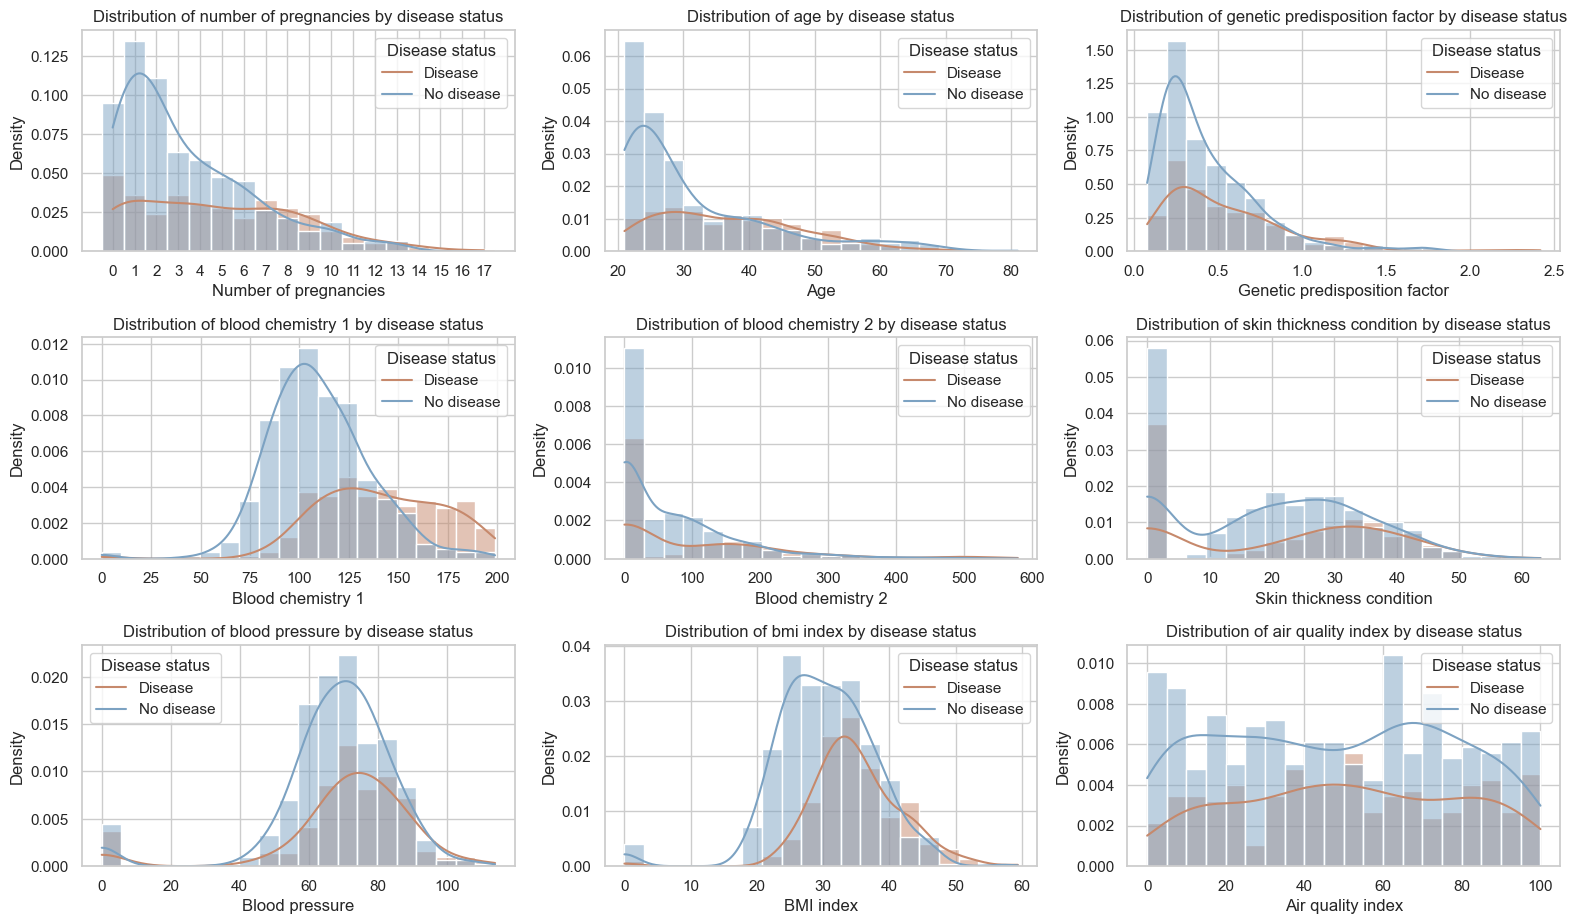

In [53]:
plt.figure(figsize=(16, 12))

for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(4, 3, i) 
    if column == 'num_pregnancies':
        max_val = int(df[column].max()) 
        bins = np.arange(0, max_val + 2) - 0.5 
        sns.histplot(data=df, x=column, hue='outcome', bins=bins, kde=True, palette = 'twilight_shifted', stat='density')
        plt.xticks(range(0, max_val + 1))
    else:
        sns.histplot(data=df, x=column, hue='outcome', kde=True, bins=20, palette = 'twilight_shifted', stat='density') 
    plt.title(f"Distribution of {column_names_mapping[column].lower()} by disease status")
    plt.xlabel(column_names_mapping[column])
    plt.ylabel("Density")
    plt.legend(title='Disease status', labels=['Disease', 'No disease'])

plt.tight_layout()
plt.show()

#### Number of pregnancies

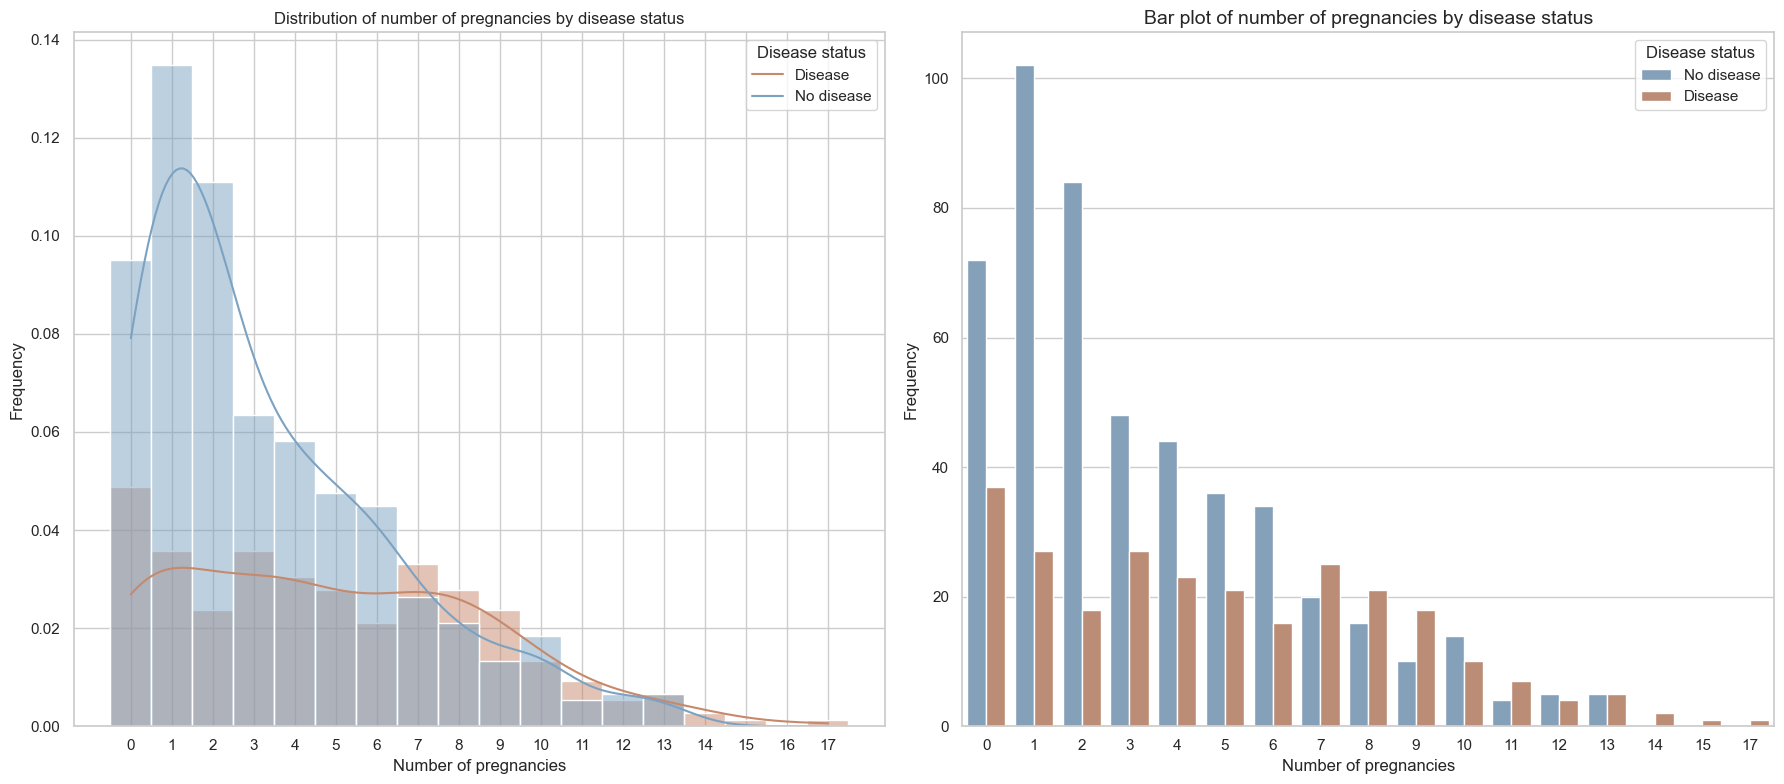

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Distribution of num_pregnancies by outcome
max_val = int(df['num_pregnancies'].max())
bins = np.arange(0, max_val + 2) - 0.5
sns.histplot(data=df, x='num_pregnancies', hue='outcome', bins=bins, kde=True, stat='density', palette='twilight_shifted', ax=axs[0])
axs[0].set_xticks(range(0, max_val + 1))
axs[0].set_title(f"Distribution of number of pregnancies by disease status")
axs[0].set_xlabel("Number of pregnancies", fontsize=12)
axs[0].set_ylabel("Frequency", fontsize=12)
legend_handles, legend_labels = plt.gca().get_legend_handles_labels()
axs[0].legend(title='Disease status', labels=['Disease', 'No disease'])

# Barplot of counts for num_pregnancies by outcome
table = df.groupby(['num_pregnancies', 'outcome']).size().unstack(fill_value=0)
table = table.reset_index()
table = table.melt(id_vars=['num_pregnancies'], value_vars=[0, 1], var_name='Outcome', value_name='Count')
sns.barplot(x='num_pregnancies', y='Count', hue='Outcome', data=table, palette='twilight_shifted', ax=axs[1])
axs[1].set_title('Bar plot of number of pregnancies by disease status', fontsize=14)
axs[1].set_xlabel('Number of pregnancies', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)
legend_handles, legend_labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=legend_handles, labels=['No disease', 'Disease'], title='Disease status')

plt.tight_layout()
plt.show()

Both graphs shows how the **number of pregnancies influences the health status of women**. For women with 0-2 pregnancies, healthy individuals dominate, and the percentage of sick individuals is relatively low. With increase in the number of pregnancies, there is a noticeable rise in the percentage of sick women. This trend becomes particularly evident in the groups with 7-10 pregnancies, where the percentage of sick women exceeds 50%. For women who had 14, 15, or 17 pregnancies, all are classified as sick, although the data for higher pregnancy counts is limited. This distribution suggests that the number of pregnancies may be an important risk factor for illness and while fewer pregnancies are associated with being healthy, a **higher number of pregnancies may lead to an increased risk of sickness**.

#### Age

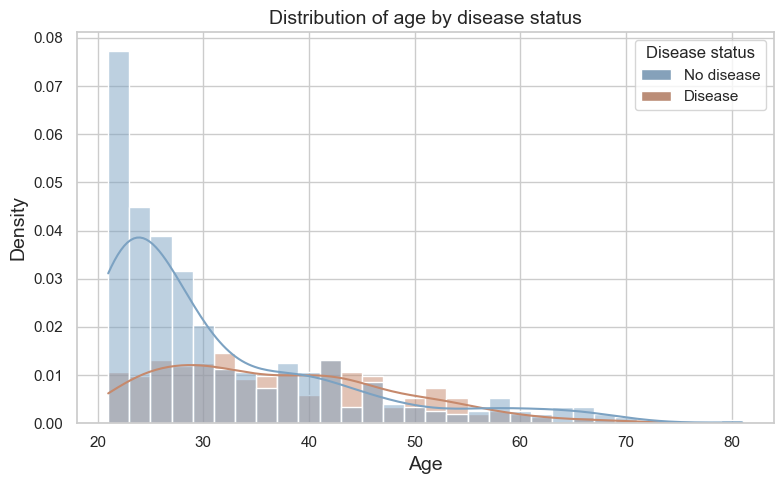

In [55]:
# Distribution of age by disease status
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', hue='outcome', kde=True, bins=30, stat="density", palette='twilight_shifted')
plt.title('Distribution of age by disease status', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(handles=legend_handles, labels=['No disease', 'Disease'], title='Disease status')
plt.tight_layout()
plt.show()

For age, an interesting pattern can be observed. **Younger women have significantly lower disease detection rates**, and such cases are much less frequent. The percentage of women with the disease increases with age. Around the age of 30, the number of women with the disease starts to equal or even surpass the number of healthy women. This trend appears to continue until about the age of 55, after which the percentage of women with the disease slightly decreases compared to the healthy population. For women over the age of 65, the number of females with diseases is very low.

The trend suggests that the **disease detection is highest among women in the 30-55 age range**. This could be due to several factors such as:
- women in this age group might be more proactive about health check-ups and screenings, leading to higher detection rates, or
- the disease could be more common or noticeable in this age range, possibly due to natural changes in the body like age-related risks.

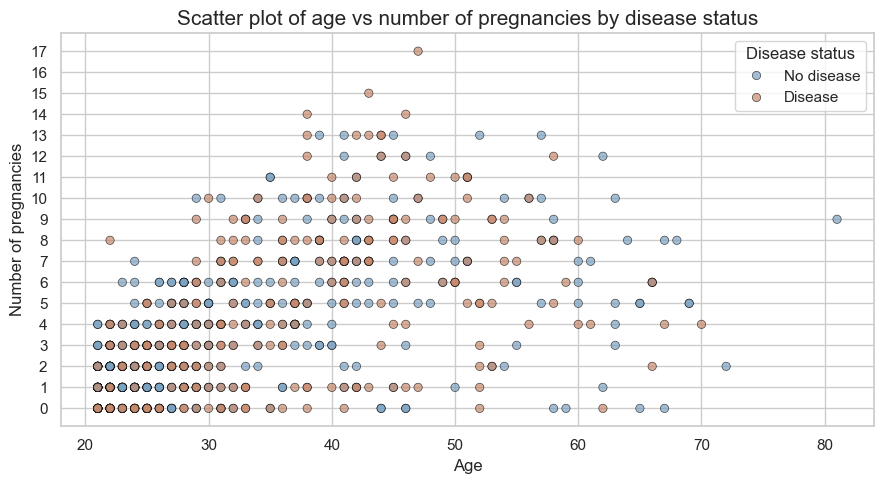

In [56]:
# Scatter plot of age vs num_pregnancies with color distinction for outcomes
plt.figure(figsize=(9, 5))
sns.scatterplot(x="age", y="num_pregnancies", hue="outcome", data=df[df["age"] < 100], palette="twilight_shifted", edgecolor="black", alpha=0.7)
plt.title("Scatter plot of age vs number of pregnancies by disease status", fontsize=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of pregnancies", fontsize=12)
legend_handles, legend_labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=legend_handles, labels=['No disease', 'Disease'], title='Disease status')
plt.yticks(range(int(df["num_pregnancies"].min()), int(df["num_pregnancies"].max()) + 1))
plt.tight_layout()
plt.show()

After plotting the scatter plot of age vs. number of pregnancies, what can be noticed is that having 8 pregnancies at the age of 22 stands out as an unusual observation, as it suggests an individual who might have started having children at a very young age. While it would be rare for someone to have had 8 pregnancies by the age of 22, it is still possible, as this situation could be associated with specific demographic or cultural backgrounds. This observation, therefore, will not be removed from the dataset.

In [57]:
df[(df["age"] == 22) & (df["num_pregnancies"] > 7)]

unique_id  num_pregnancies  blood_chemistry_1  blood_chemistry_2  \
563    5642688                8              120.0                0.0   

     blood_pressure  skin_thickness_condition   bmi  \
563            86.0                       0.0  28.4   

     genetic_predisposition_factor  age  air_quality_index state  outcome  \
563                          0.259   22               25.0    CA        1   

     state_name  
563  California

#### BMI and blood pressure

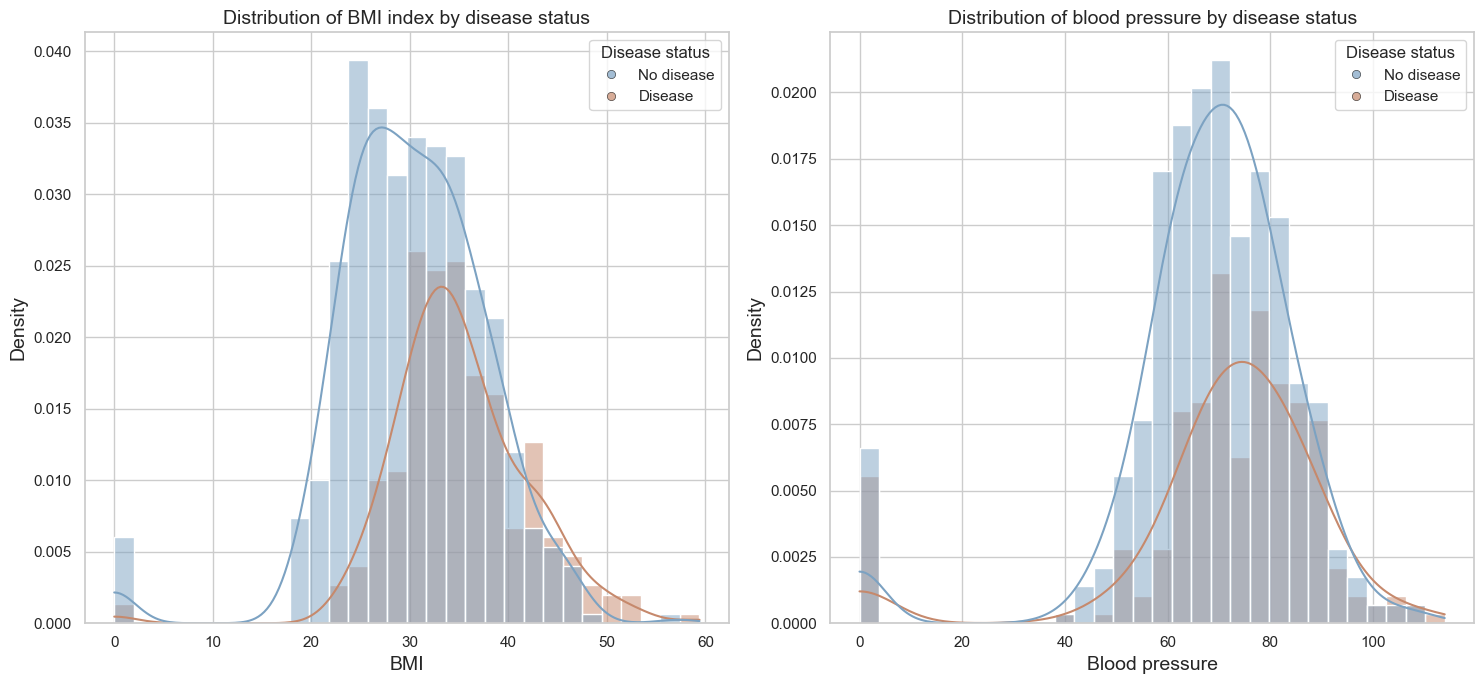

In [58]:
plt.figure(figsize=(15, 7))

# Distribution of BMI by disease statue
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='bmi', hue='outcome', kde=True, bins=30, stat="density", palette='twilight_shifted')
plt.title('Distribution of BMI index by disease status', fontsize=14)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(handles=legend_handles, labels=['No disease', 'Disease'], title='Disease status')

# Distribution of blood pressure by disease statue
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='blood_pressure', hue='outcome', kde=True, bins=30, stat="density", palette='twilight_shifted')
plt.title('Distribution of blood pressure by disease status', fontsize=14)
plt.xlabel('Blood pressure', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(handles=legend_handles, labels=['No disease', 'Disease'], title='Disease status')

plt.tight_layout()
plt.show()

Both the BMI and blood pressure distributions indicate that, for the group of patients with the disease, the plots are slightly "shifted" to the right. This suggests that **the presence of the disease is associated with higher average blood pressure and BMI levels**. The trend is even more noticeable in the case of BMI — as BMI increases, the proportion of ill female patients seems to be higher. This implies that women with higher BMIs, particularly **those who are obese, as well as with elevated blood pressure, are more vulnerable to developing the disease**. 

#### Blood chemistry 1, blood chemistry 2, skin thickness condition

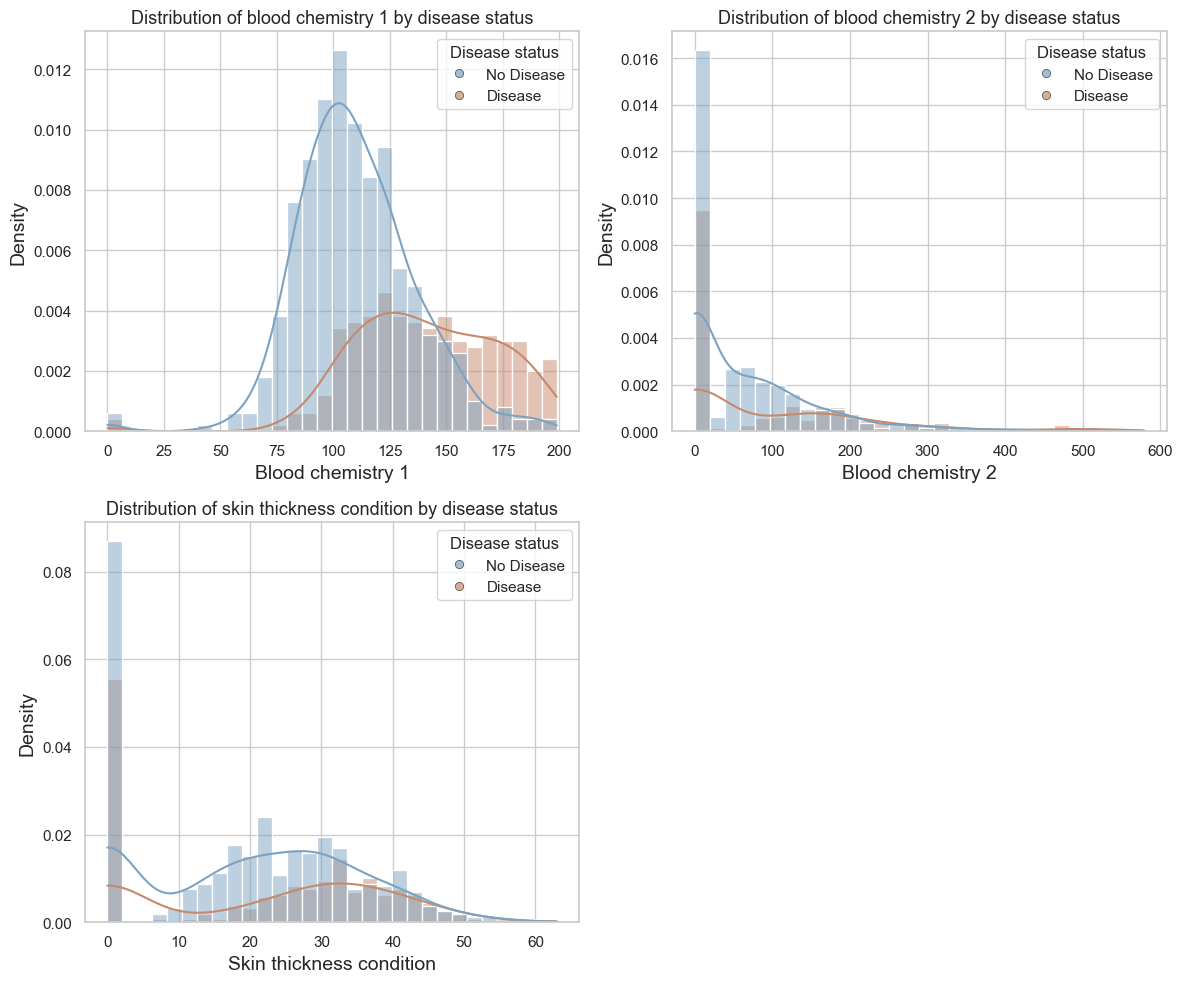

In [59]:
plt.figure(figsize=(12, 10))

# Distribution of blood_chemistry_1 by outcome
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='blood_chemistry_1', hue='outcome', kde=True, bins=30, stat="density", palette='twilight_shifted')
plt.title('Distribution of blood chemistry 1 by disease status', fontsize=13)
plt.xlabel('Blood chemistry 1', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(handles=legend_handles, labels=['No Disease', 'Disease'], title='Disease status')

# Distribution of blood_chemistry_2 by outcome
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='blood_chemistry_2', hue='outcome', kde=True, bins=30, stat="density", palette='twilight_shifted')
plt.title('Distribution of blood chemistry 2 by disease status', fontsize=13)
plt.xlabel('Blood chemistry 2', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(handles=legend_handles, labels=['No Disease', 'Disease'], title='Disease status')

# Distribution of skin_thicknes_condition by outcome
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='skin_thickness_condition', hue='outcome', kde=True, bins=30, stat="density", palette='twilight_shifted')
plt.title('Distribution of skin thickness condition by disease status', fontsize=13)
plt.xlabel('Skin thickness condition', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(handles=legend_handles, labels=['No Disease', 'Disease'], title='Disease status')

plt.tight_layout()
plt.show()

The distribution of the blood chemistry 1 variable differs significantly between the healthy and ill patients groups. For the **healthy group, the distribution resembles a normal distribution, with values concentrated around the mean** and with a few less frequent observations with higher blood chemistry 1 values. In contrast, the distribution for the diseased group is noticeably shifted to the right. It appears lower and somewhat flatter, there is a **higher density of observations with elevated blood chemistry 1 levels compared to the healthy group**. This suggests that individuals in the ill patients group tend to have consistently higher blood chemistry 1 measurements than those in the healthy group.

For blood chemistry 2 and skin thickness condition, the distributions for the diseased group also exhibit a **rightward shift compared to the healthy group**. Although this shift is less pronounced than in the case of blood chemistry 1, it remains noticeable. The distributions for the diseased group appear flatter and more spread out, while the **healthy individuals tend to have lower values of skin thickness and blood chemistry 2, which occur less frequently among the diseased group**. This suggests a consistent pattern of higher measurements in these variables among the diseased group.


For all these three variables, a clear trend is observed: as the levels of values increase, the likelihood of developing the disease also rises.


Setting aside the large number of observations with zero values for the moment, it is evident that **for lower non-zero values of all these measurements, the proportion of women diagnosed with the disease is nearly zero**. An intriguing observation arises with the zero values: despite the near absence of diagnosed cases at smaller non-zero values, **the zero-value observations show a surprisingly high proportion of women with the disease**. This is inconsistent with the overall trend. If zero values truly represented valid blood chemistry readings, one would expect disease prevalence to be minimal or even nonexistent, given the steady decline in diagnosis rates as variables levels decrease. However, the data does not follow this pattern. This discrepancy confirms that the **zero values may not reflect genuine blood chemistry measurements**. Instead, they could result from errors, data entry anomalies, or a placeholder indicating that no test was conducted for those female patients. 

It is also worth noting that the occurrence of zero values does not seem to be correlated with the presence or absence of the disease either. **The proportion of women with the disease among the zero-value observations is roughly similar to the overall proportion of women with the disease across all observations**.

#### Genetic predisposition factor

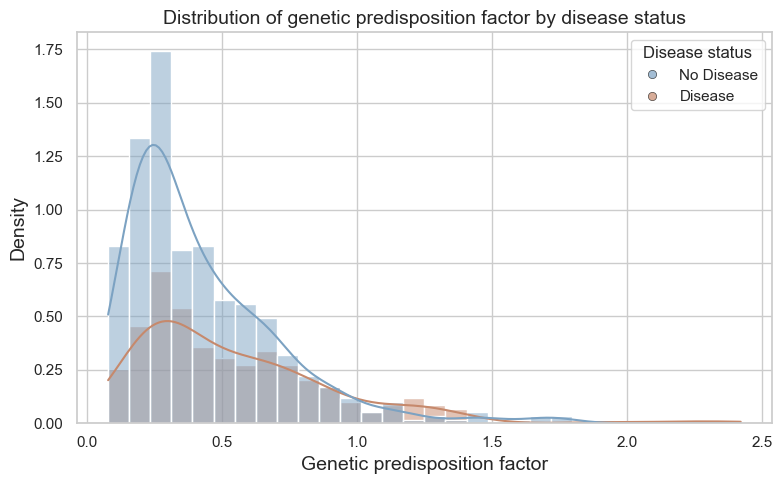

In [60]:
# Distribution of genetic_predisposition_factor by disease status
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='genetic_predisposition_factor', hue='outcome', kde=True, bins=30, stat="density", palette='twilight_shifted')
plt.title('Distribution of genetic predisposition factor by disease status', fontsize=14)
plt.xlabel('Genetic predisposition factor', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(handles=legend_handles, labels=['No Disease', 'Disease'], title='Disease status')
plt.tight_layout()
plt.show()

The distribution plot for this variable is heavily right-skewed, with many observations showing high values. One can observe a potential **increase in the percentage of detected diseases among the patients as the genetic predisposition factor increases**, suggesting a possible relationship. 

However, there are a few observations in the range of approximately 1.5-2, which, despite having a high genetic predisposition factor, are not associated with the disease. Filtering the data for higher values (greater than 1.5) and presenting it here reveals that individuals with higher genetic predisposition factors between the range of ~ 1.600-1.731 and an outcome of 0 (healthy) generally have relatively low values in other metrics such as blood chemistry 1, BMI and blood pressure. Therefore, in these cases, a high genetic predisposition factor alone might not be a clear indicator of the disease.

In [61]:
df[df['genetic_predisposition_factor'] > 1.5].sort_values(by="genetic_predisposition_factor")

unique_id  num_pregnancies  blood_chemistry_1  blood_chemistry_2  \
381    5642503                2              127.0              275.0   
116    5642235                2               92.0                0.0   
50     5642168                2               82.0              115.0   
321    5642443                0              118.0               89.0   
449    5642571                0              146.0                0.0   
719    5642846                0              180.0                0.0   
705    5642832                3              173.0              465.0   
617    5642744                0              137.0              168.0   
720    5642847                0              180.0               14.0   

     blood_pressure  skin_thickness_condition        bmi  \
381            58.0                      24.0  27.700001   
116            76.0                      20.0  24.200001   
50             52.0                      22.0  28.500000   
321            64.0                      23.0   0.000000   
449            82.0                       0.0  40.500000   
719            66.0                      39.0  42.000000   
705            82.0                      48.0  38.400002   
617            40.0                      35.0  43.099998   
720            78.0                      63.0  59.400002   

     genetic_predisposition_factor  age  air_quality_index state  outcome  \
381                          1.600   25               24.0    LA        0   
116                          1.698   28               88.0    NJ        0   
50                           1.699   25               10.0    LA        0   
321                          1.731   21               12.0    AL        0   
449                          1.781   44                2.0    WA        0   
719                          1.893   25               54.0    GA        1   
705                          2.137   25               89.0    KS        1   
617                          2.288   33               11.0    AZ        1   
720                          2.420   25               86.0    IL        1   

     state_name  
381   Louisiana  
116  New Jersey  
50    Louisiana  
321     Alabama  
449  Washington  
719     Georgia  
705      Kansas  
617     Arizona  
720    Illinois

#### Air quality factor

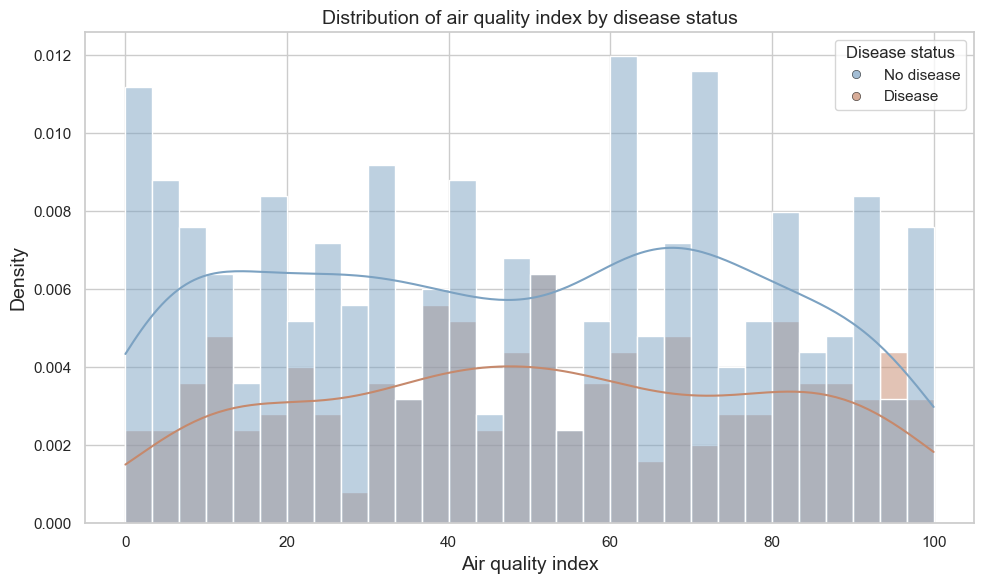

In [62]:
# Distribution of genetic_predisposition_factor by disease status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='air_quality_index', hue='outcome', kde=True, bins=30, stat="density", palette='twilight_shifted')
plt.title('Distribution of air quality index by disease status', fontsize=14)
plt.xlabel('Air quality index', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(handles=legend_handles, labels=['No disease', 'Disease'], title='Disease status')
plt.tight_layout()
plt.show()

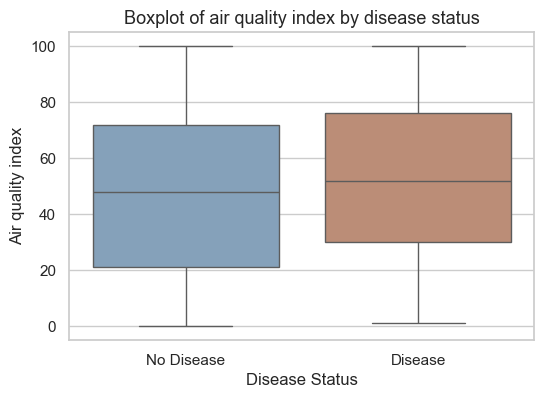

In [63]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='outcome', y='air_quality_index', palette="twilight_shifted")
plt.title("Boxplot of air quality index by disease status", fontsize=13)
plt.xlabel("Disease Status", fontsize=12)
plt.ylabel("Air quality index", fontsize=12)
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

The boxplot appears slightly shifted upwards for the ill patients, but the difference does not seem to be very significant. Additionally, the distribution plots do not indicate a significant difference between the two groups.

#### State

In order to check the potential impact of the state variable on diagnosis outcomes, a plot displaying the counts of ill and not ill female patients by state was presented.

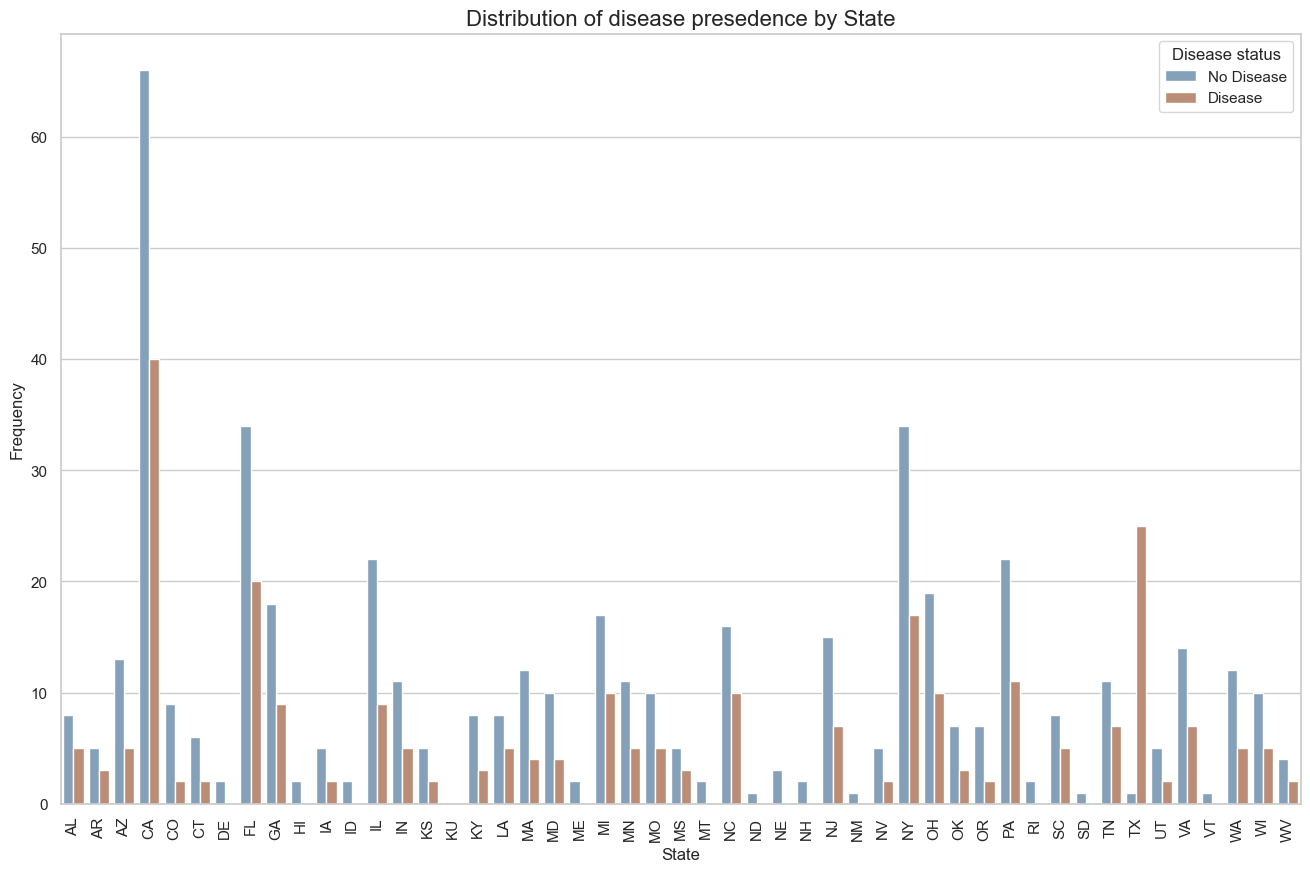

In [64]:
plt.figure(figsize=(16, 10))
sns.countplot(data=df, x="state", hue="outcome", palette="twilight_shifted")
plt.xticks(rotation=90)
plt.title("Distribution of disease presedence by State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title='Disease status', labels=['No Disease', 'Disease'])
plt.show()

 At first glance, no specific dependency can be clearly observed. However, a **notable peak of ill individuals is visible for Texas state**, where almost all observations are labeled as ill. Many other states show a more balanced distribution between ill and not ill patients.

In the current dataset, which contains 48 distinct states, the number of variables was deemed too high for the model, with some states having too few observations. To address this issue and reduce the risk of overfitting and high dimensionality, **less frequent states were aggregated into a single group**. The treshhold used was 15 observations.

Moreover, having categories with only a few observations in a model is not advisable, as small sample sizes can lead to unreliable and unstable predictions. The model may struggle to learn meaningful patterns from limited data and could overfit these rare categories.

In [65]:
# Aggregate least frequent states to one group
state_counts = df['state'].value_counts()
df['state'] = df['state'].apply(lambda x: x if state_counts[x] >= 15 else 'Other')

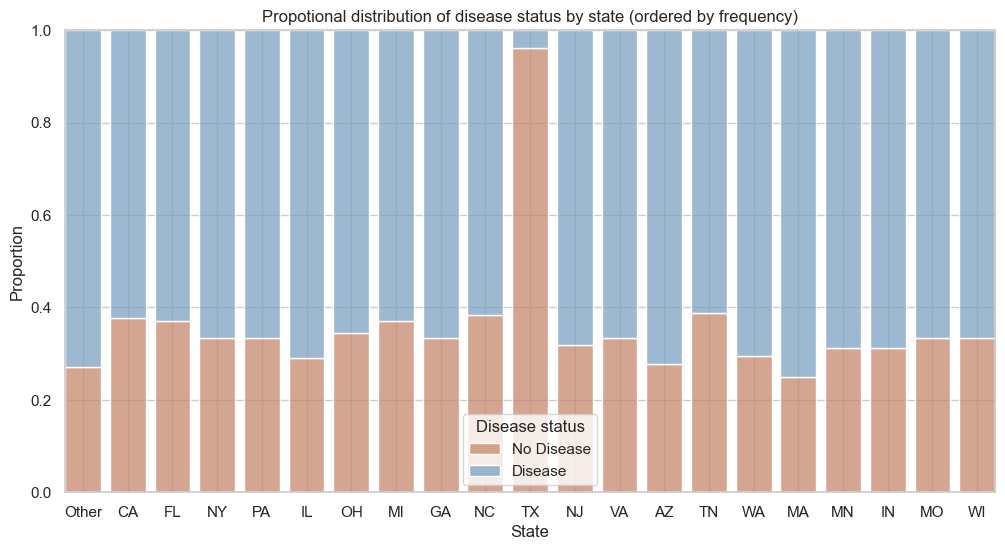

In [66]:
state_order = df['state'].value_counts().index
df['state'] = pd.Categorical(df['state'], categories=state_order, ordered=True)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="state", hue="outcome",  multiple="fill", stat="proportion", discrete=True, shrink=.8, palette="twilight_shifted")
#plt.xticks(rotation=90)
plt.title("Propotional distribution of disease status by state (ordered by frequency)", fontsize=12)
plt.xlabel("State", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.legend(title='Disease status', labels=['No Disease', 'Disease'])
plt.show()

As noted previously, Texas exhibits a significant disproportion, with the majority of female patients identified as ill. In contrast, the percentages for other states remain relatively stable, showing no substantial differences.

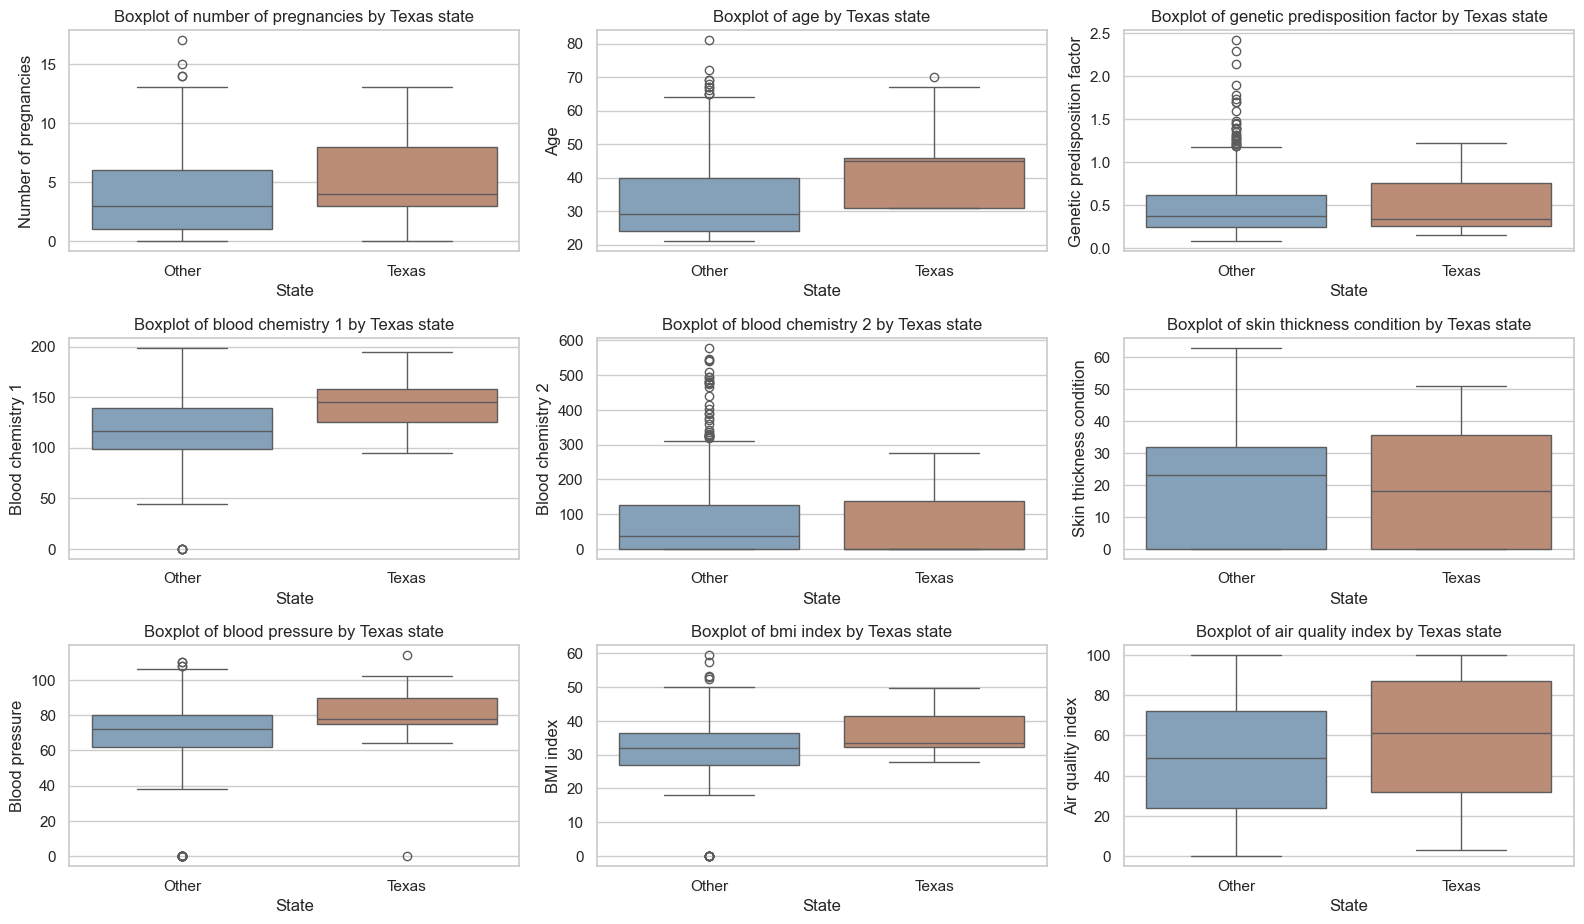

In [67]:
# Create a binary column for 'state_TX'
df['Texas'] = (df['state'] == 'TX').astype(int)

plt.figure(figsize=(16, 12))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(4, 3, i) 
    sns.boxplot(data=df, x='Texas', y=column, palette='twilight_shifted') 
    plt.title(f"Boxplot of {column_names_mapping[column].lower()} by Texas state")
    plt.xlabel("State")
    plt.xticks([0, 1], ['Other','Texas'])
    plt.ylabel(column_names_mapping[column])

plt.tight_layout()
plt.show()

When presenting boxplots of other numeric variables for Texas versus non-Texas data, it becomes evident that these measurements differ notably for Texas. Specifically, the numeric variables tend to show higher values for Texas, indicating an **increased exposure and a potentially higher risk of disease among this group**. This doesn't necessarily mean that being in Texas itself is the cause; rather, it could reflect underlying factors specific to the population in that state.

### Missing data

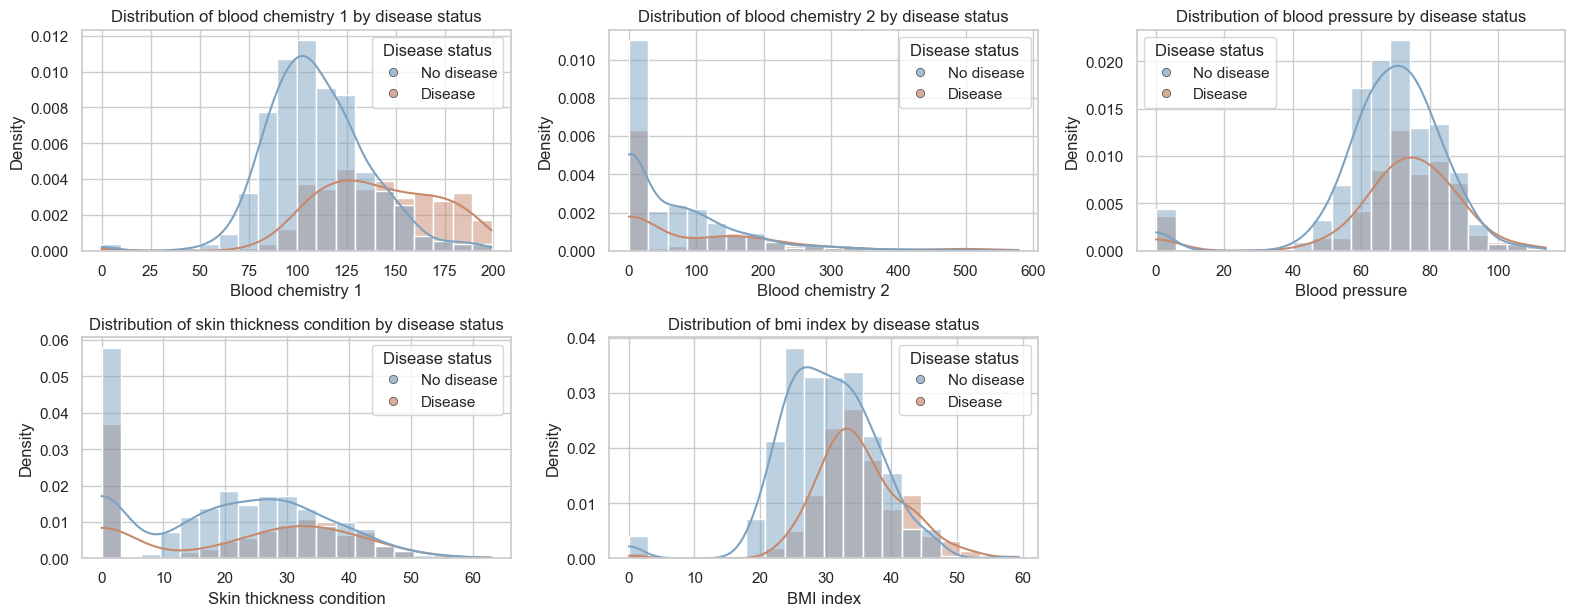

In [68]:
columns_of_interest = ['blood_chemistry_1', 'blood_chemistry_2', 
                       'blood_pressure', 'skin_thickness_condition', 'bmi']

plt.figure(figsize=(16, 12))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(4, 3, i) 
    if column == 'num_pregnancies':
        max_val = int(df[column].max()) 
        bins = np.arange(0, max_val + 2) - 0.5 
        sns.histplot(data=df, x=column, hue='outcome', bins=bins, kde=True, palette = 'twilight_shifted', stat='density')
        plt.xticks(range(0, max_val + 1))
    else:
        sns.histplot(data=df, x=column, hue='outcome', kde=True, bins=20, palette = 'twilight_shifted', stat='density') 
    plt.title(f"Distribution of {column_names_mapping[column].lower()} by disease status")
    plt.xlabel(column_names_mapping[column])
    plt.ylabel("Density")
    plt.legend(handles=legend_handles, labels=['No disease', 'Disease'], title='Disease status')

plt.tight_layout()
plt.show()

As already noticed, zero values that appear to stand out from other observations are visible in variables such as blood chemistry 1, blood chemistry 2, blood pressure, skin thickness condition, and BMI. For variables like blood pressure, skin thickness condition, and BMI, such values do not seem to represent legitimate observations, as they are unlikely to occur naturally. For the other features (blood chemistry 1 and blood chemistry 2), this reasoning is not as clear - the exact definitions and measurement methods for these variables are unknown. However, the way these zero values differ significantly from other observations suggests that they might not be valid readings for these indicators. Therefore, **all of these zero values were treated as missing values.**

In [69]:
df['blood_pressure'] = df['blood_pressure'].replace(0, np.NaN)
df['skin_thickness_condition'] = df['skin_thickness_condition'].replace(0, np.NaN)
df['bmi'] = df['bmi'].replace(0, np.NaN)
df['blood_chemistry_1'] = df['blood_chemistry_1'].replace(0, np.NaN)
df['blood_chemistry_2'] = df['blood_chemistry_2'].replace(0, np.NaN)

In [72]:
df = df.reset_index(drop=True)

In [70]:
# Count missing data in each column
nan_count = (df.isna()).sum()
print(nan_count)

unique_id                          0
num_pregnancies                    0
blood_chemistry_1                 10
blood_chemistry_2                373
blood_pressure                    35
skin_thickness_condition         227
bmi                               11
genetic_predisposition_factor      0
age                                0
air_quality_index                  6
state                              0
outcome                            0
state_name                         0
Texas                              0
dtype: int64


The following shows how the outcome variable is distributed - the percentage that people with diagnosed disease are among observations with missing values.

In [71]:
# Calculate the percentage of outcome variable values for observations with missing values
results = []
for column in columns_of_interest:
    # Identify rows with missing and non-missing values for the current column
    rows_with_missing = df[column].isnull()
    rows_without_missing = ~rows_with_missing
    
    # Calculate percentages for each group
    obs_with_missing = df.loc[rows_with_missing, 'outcome'].mean() * 100
    obs_without_missing = df.loc[rows_without_missing, 'outcome'].mean() * 100
    
    results.append({
        'Feature': column,
        '% of observations with missing values': obs_with_missing,
        '% of observations with no missing values': obs_without_missing
    })

results_df = pd.DataFrame(results)
results_df

Feature  % of observations with missing values  \
0         blood_chemistry_1                              30.000000   
1         blood_chemistry_2                              36.997319   
2            blood_pressure                              45.714286   
3  skin_thickness_condition                              38.766520   
4                       bmi                              18.181818   

   % of observations with no missing values  
0                                 34.805890  
1                                 32.552083  
2                                 34.210526  
3                                 33.018868  
4                                 34.986595

The differences here are not significant, with the largest mismatch observed for the BMI variable, where 18% of individuals with missing BMI values have disease. However, the number of observations in this group is only 9, which limits the credibility of this result.

As a significant portion of data (e.g., 1/3 to 1/2) is missing or contains zeros, and given the small size of the dataset (above 700 observations), removing such data isn't ideal. Therefore, those values will be imputed.

### Correlation matrix

To identify potential **multicollinearity between explanatory variables**, a **correlation matrix** was used to examine whether any pairs of independent variables are highly correlated. Such correlations may indicate redundancy or overlap in the information these variables provide about the dependent variable.

It's important to note that while multicollinearity generally does not impact a model's predictive performance, it becomes important to address when the model is used for explanatory purposes, such as identifying which features most significantly influence the target variable. In such cases, **multicollinearity can distort the importance assigned to certain features**. This may lead to incorrect interpretations, such as concluding that one variable is a strong predictor while others in the same group are unimportant, even though they may have a similarly strong relationship with the response variable. For instance, in logistic regression, multicollinearity can increase the variance of estimated coefficients, resulting in inflated standard errors, wider confidence intervals, and higher p-values, which could affect the reliability of the model's conclusions.

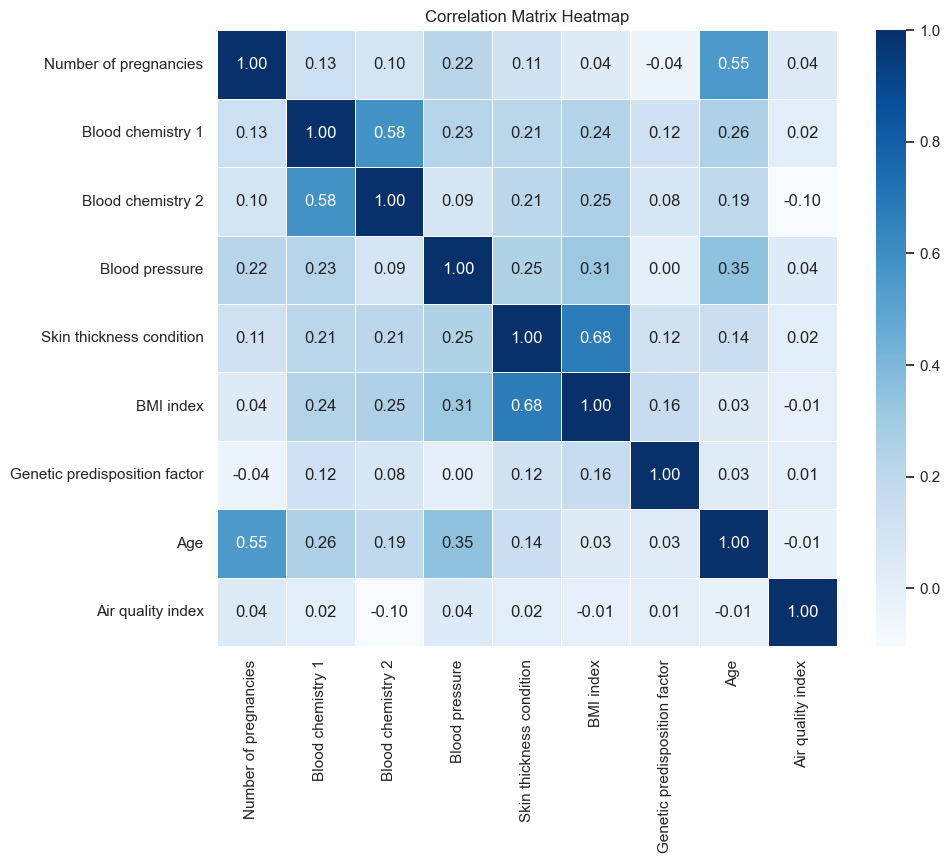

In [73]:
# Correlation matrix
numeric_columns = ['num_pregnancies', 'blood_chemistry_1',
       'blood_chemistry_2', 'blood_pressure',
       'skin_thickness_condition', 'bmi', 'genetic_predisposition_factor',
       'age', 'air_quality_index']

correlation_matrix = df[numeric_columns].corr()

correlation_matrix.rename(columns=column_names_mapping, index=column_names_mapping, inplace=True)

plt.figure(figsize=(10, 8))
palette = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=palette, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

The correlation matrix reveals some noteworthy relationships. The highest correlation is observed between the variables skin thicnkess condtition and BMI index (0.68). Other notable correlations include the relationship between blood chemistry 1 and blood chemistry 2 (0.58) or age and number of pregnancy (0.55). These correlations are also likely explainable by underlying biological factors, such as nutritional status, overall health conditions or the fact that older individuals are more likely to have experienced more pregnancies. While these correlations are not extremely high, it is worth considering in further analyses, especially if the model is intended for interpretability.

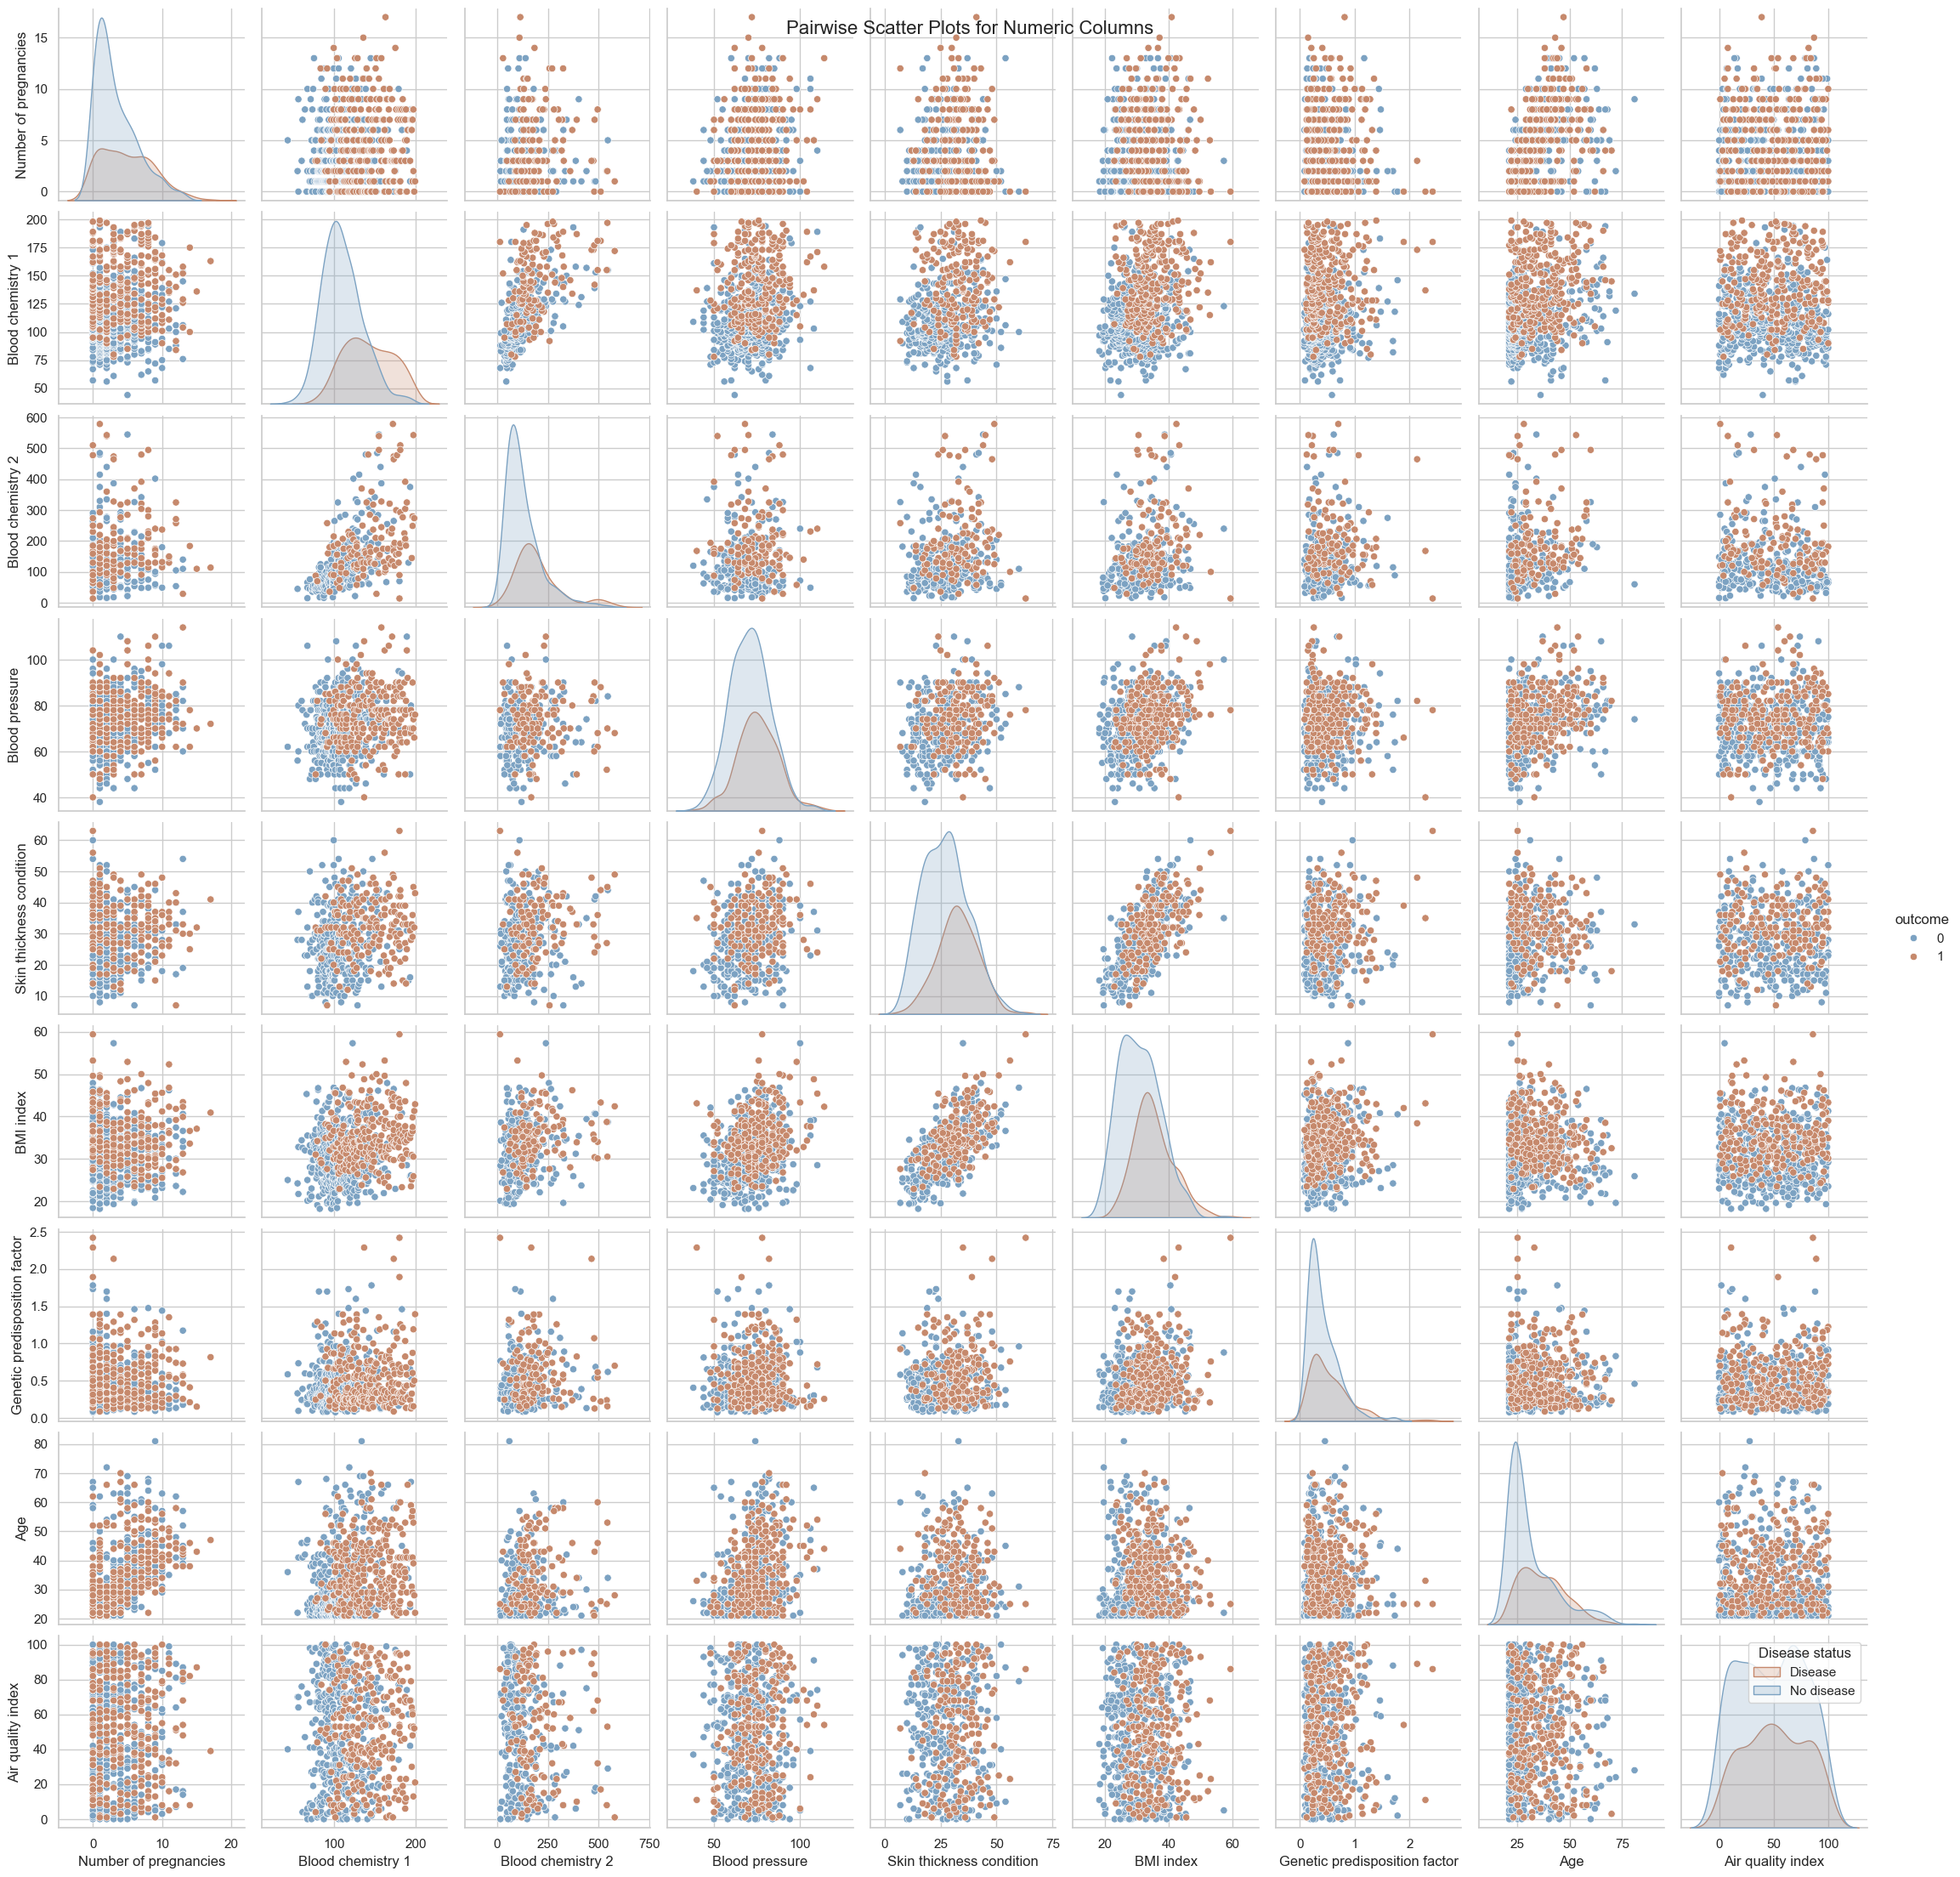

In [74]:
# Pairwise scatter plots for numeric columns
columns_to_plot = numeric_columns + ['outcome']
sns.pairplot(df[columns_to_plot],hue='outcome', palette='twilight_shifted')
for ax in plt.gcf().axes:
    ax.set_xlabel(column_names_mapping.get(ax.get_xlabel(), ax.get_xlabel()))
    ax.set_ylabel(column_names_mapping.get(ax.get_ylabel(), ax.get_ylabel()))
plt.suptitle('Pairwise Scatter Plots for Numeric Columns', fontsize=16)
plt.legend(title='Disease status', labels=['Disease', 'No disease'])
plt.show()

## Data preparation

In this study, the problem is a binary classification task, and two classification methods will be utilized: **Random Forest** and **Logistic Regression**.

To prepare the data for modeling, **One-Hot Encoding** will be applied to the state variable. Logistic regression requires one-hot encoding to handle categorical variables, as it cannot process them directly without converting them into binary features. While random forests can often handle categorical variables without one-hot encoding, applying it ensures consistency when using both models.

Next, the dataset will be split into two parts: a **train set and a test set**. This division is essential for model evaluation, as it allows for the training of the models on one portion of the data while testing them on a separate, unseen portion. This helps prevent overfitting and ensures that the model generalizes well to new data.

Given that the dataset contains missing values, an **imputation method will be employed** to handle these gaps. Specifically, the **KNN imputer** will be used. Since KNN-based methods rely on distance calculations, which can be sensitive to the scale of the features, it is important to **normalize the data**. Therefore, **Z-score scaling** will be applied to the dataset. Z-score scaling is also particularly useful when the dataset includes outliers, as it reduces their impact on the model’s performance.

For the models to function correctly, **feature selection** will be carried out. 

Once the dataset has been properly prepared, it will be used to evaluate both models. Random Forest and Logistic Regression will be trained on the training data and then tested on the testing data. The models' performance will be assessed based on common classification metrics, such as accuracy, precision, recall, and F1 score, to determine which model best predicts the target variable in this binary classification problem.

### One-Hot encoding

For the categorical state variable, **One-Hot Encoding** was applied, and one category was removed to avoid the "dummy variable trap." This approach is particularly suitable for models like logistic regression and binary decision trees, as it helps **mitigate multicollinearity** by avoiding linear dependencies among variables. It also reduces redundancy, as retaining all dummy variables would introduce unnecessary complexity without adding meaningful information.

In [75]:
# Keep state abbreviation for KNN Imputer
df['state_abbr'] = df['state']

# One-hot encoding for state variable
df = pd.get_dummies(df, columns=['state'], drop_first=True)
df.head()

unique_id  num_pregnancies  blood_chemistry_1  blood_chemistry_2  \
0    5642118                1                NaN               23.0   
1    5642119                1                NaN                NaN   
2    5642120                1                NaN                NaN   
3    5642121                5               44.0                NaN   
4    5642122                2               56.0               45.0   

   blood_pressure  skin_thickness_condition        bmi  \
0            74.0                      20.0  27.700001   
1            68.0                      35.0  32.000000   
2            48.0                      20.0  24.700001   
3            62.0                       NaN  25.000000   
4            56.0                      28.0  24.200001   

   genetic_predisposition_factor  age  air_quality_index  ...  state_NJ  \
0                          0.299   21               38.0  ...     False   
1                          0.389   22               10.0  ...     False   
2                          0.140   22               77.0  ...     False   
3                          0.587   36               40.0  ...     False   
4                          0.332   22               70.0  ...     False   

  state_VA  state_AZ state_TN  state_WA  state_MA  state_MN  state_IN  \
0    False     False    False     False     False     False     False   
1    False     False    False     False     False     False     False   
2    False     False    False     False     False     False     False   
3    False     False    False     False     False     False     False   
4    False     False    False     False     False     False     False   

   state_MO  state_WI  
0     False     False  
1     False     False  
2     False     False  
3     False     False  
4     False     False  

[5 rows x 34 columns]

### Train-test split

The dataset was split into training and testing sets to ensure reliable model evaluation. A fixed test size of 100 observations was used, with the remaining data allocated to training set.

In [76]:
# Print columns
print(df.columns)

Index(['unique_id', 'num_pregnancies', 'blood_chemistry_1',
       'blood_chemistry_2', 'blood_pressure', 'skin_thickness_condition',
       'bmi', 'genetic_predisposition_factor', 'age', 'air_quality_index',
       'outcome', 'state_name', 'Texas', 'state_abbr', 'state_CA', 'state_FL',
       'state_NY', 'state_PA', 'state_IL', 'state_OH', 'state_MI', 'state_GA',
       'state_NC', 'state_TX', 'state_NJ', 'state_VA', 'state_AZ', 'state_TN',
       'state_WA', 'state_MA', 'state_MN', 'state_IN', 'state_MO', 'state_WI'],
      dtype='object')


In [77]:
# Split into train and test set
explanatory_variables = ['num_pregnancies', 'blood_chemistry_1',
       'blood_chemistry_2', 'blood_pressure', 'skin_thickness_condition',
       'bmi', 'genetic_predisposition_factor', 'age', 'air_quality_index',
       'state_abbr', 'state_CA', 'state_FL', 'state_NY', 'state_PA',
       'state_IL', 'state_OH', 'state_MI', 'state_GA', 'state_NC', 'state_TX',
       'state_NJ', 'state_VA', 'state_AZ', 'state_TN', 'state_WA', 'state_MA',
       'state_MN', 'state_IN', 'state_MO', 'state_WI']

X = df[explanatory_variables]
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=61)

print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

Training set size: 657
Test set size: 100


In [78]:
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

After splitting the initial dataset, the statistics of the train and test datasets were compared to make sure they were representative of the same underlying distribution.

In [79]:
# Get summary statistics for numerical variables in training set
X_train.describe().round(3)

num_pregnancies  blood_chemistry_1  blood_chemistry_2  blood_pressure  \
count          657.000            649.000            328.000         625.000   
mean             3.846            121.003            149.524          72.579   
std              3.389             30.054            102.200          11.628   
min              0.000             44.000             14.000          38.000   
25%              1.000             99.000             76.000          64.000   
50%              3.000            116.000            123.500          72.000   
75%              6.000            139.000            190.000          80.000   
max             17.000            199.000            579.000         110.000   

       skin_thickness_condition      bmi  genetic_predisposition_factor  \
count                   455.000  647.000                        657.000   
mean                     29.059   32.340                          0.463   
std                      10.224    6.741                          0.320   
min                       7.000   18.200                          0.078   
25%                      22.000   27.400                          0.239   
50%                      29.000   32.000                          0.368   
75%                      36.000   36.600                          0.610   
max                      63.000   59.400                          2.420   

           age  air_quality_index  
count  657.000            653.000  
mean    32.928             48.683  
std     11.520             29.272  
min     21.000              0.000  
25%     24.000             23.000  
50%     29.000             48.000  
75%     40.000             73.000  
max     81.000            100.000

In [80]:
# Get summary statistics for numerical variables in test set
X_test.describe().round(3)

num_pregnancies  blood_chemistry_1  blood_chemistry_2  blood_pressure  \
count          100.000             98.000             56.000          97.000   
mean             4.060            125.051            157.304          71.804   
std              3.287             32.139            119.808          13.475   
min              0.000             56.000             16.000          44.000   
25%              1.000            101.250             76.000          62.000   
50%              3.000            120.000            130.000          72.000   
75%              6.000            146.750            180.500          80.000   
max             13.000            194.000            545.000         114.000   

       skin_thickness_condition     bmi  genetic_predisposition_factor  \
count                    75.000  99.000                        100.000   
mean                     28.693  32.627                          0.514   
std                       8.879   6.625                          0.366   
min                      13.000  19.600                          0.118   
25%                      21.500  28.100                          0.254   
50%                      28.000  32.900                          0.398   
75%                      35.500  36.000                          0.689   
max                      48.000  49.300                          2.137   

           age  air_quality_index  
count  100.000             98.000  
mean    35.140             52.071  
std     12.794             29.163  
min     21.000              0.000  
25%     24.000             27.500  
50%     30.500             53.000  
75%     44.000             73.750  
max     69.000            100.000

### Imputation for missing values

To handle missing data, the **KNN (k-Nearest Neighbors) Imputer** method was applied. The KNN Imputer is a method for handling missing data by filling in missing values using the values of the nearest neighbors in the dataset. This approach identifies the fixed amount of nearest neighbors for each observation with missing values based on feature similarity and uses their values to impute the missing entries. For this project, the **Euclidean distance** was employed.

Since Euclidean distance is best suited for numerical data, **frequency encoding was applied to the state variable**, instead of using the 0s and 1s from One-Hot Encoding. The frequencies were calculated based on the training dataset.

Finally, the KNN imputer was fine-tuned using the training set and was then applied to the test set for imputation.

*Note: While Euclidean distance can technically work for binary variables (0 or 1) and treat them as numeric variables, it is not always ideal. This is because after One-Hot Encoding, the distance between categories is either 0 (if they match) or 1 (if they don't), which can oversimplify the relationship between categories and potentially misinterpret some patterns. A more appropriate metric for such mixed dataset (numerical and categorical features) could be Gower’s distance, which is designed to handle different data types. However, since time was limited in this project, I chose to stick with the Euclidean distance.*

**Missing data**

In [81]:
# Define column groups
column_groups = {
    'knn_features': ['num_pregnancies', 'blood_chemistry_1', 'blood_chemistry_2',
                           'blood_pressure', 'skin_thickness_condition', 'bmi',
                           'genetic_predisposition_factor', 'age', 'air_quality_index',
                          'state_abbr'],
    'state_features': ['state_CA', 'state_FL', 'state_NY', 'state_PA', 'state_IL', 'state_OH',
                       'state_MI', 'state_GA', 'state_NC', 'state_TX', 'state_NJ', 'state_VA',
                       'state_AZ', 'state_TN', 'state_WA', 'state_MA', 'state_MN', 'state_IN',
                       'state_MO', 'state_WI']
}

# Select features for KNN imputation
X_train_knn = X_train[column_groups['knn_features']].copy()
X_test_knn = X_test[column_groups['knn_features']].copy()

# Select state features
X_train_states = X_train[column_groups['state_features']].copy()
X_test_states = X_test[column_groups['state_features']].copy()

In [82]:
# Count missing data in the training and testing datasets
missing_train = X_train_knn.isna().sum() 
missing_test = X_test_knn.isna().sum()

missing_data_table = pd.DataFrame({
    'Feature': column_groups['knn_features'],
    'Missing in train': missing_train.values,
    'Missing in test': missing_test.values
})

missing_data_table

Feature  Missing in train  Missing in test
0                num_pregnancies                 0                0
1              blood_chemistry_1                 8                2
2              blood_chemistry_2               329               44
3                 blood_pressure                32                3
4       skin_thickness_condition               202               25
5                            bmi                10                1
6  genetic_predisposition_factor                 0                0
7                            age                 0                0
8              air_quality_index                 4                2
9                     state_abbr                 0                0

**Frequency encoding**

In [83]:
# Calculate frequency for each state based on train set
state_frequencies = X_train_knn['state_abbr'].value_counts(normalize=True)

# Map the frequencies to a new column
X_train_knn.loc[:, 'state_frequency'] = X_train_knn['state_abbr'].map(state_frequencies)
X_test_knn.loc[:, 'state_frequency'] = X_test_knn['state_abbr'].map(state_frequencies)

# Drop the state_abbr column
X_train_knn.drop(columns=['state_abbr'], inplace=True)
X_test_knn.drop(columns=['state_abbr'], inplace=True)

X_train_knn.head()

num_pregnancies  blood_chemistry_1  blood_chemistry_2  blood_pressure  \
0                4              154.0              126.0            72.0   
1                0              131.0                NaN            66.0   
2                3              129.0              115.0            64.0   
3                5              166.0                NaN            76.0   
4                0              177.0              478.0            60.0   

   skin_thickness_condition        bmi  genetic_predisposition_factor  age  \
0                      29.0  31.299999                          0.338   37   
1                      40.0  34.299999                          0.196   22   
2                      29.0  26.400000                          0.219   28   
3                       NaN  45.700001                          0.340   27   
4                      29.0  34.599998                          1.072   21   

   air_quality_index  state_frequency  
0               73.0         0.038052  
1               19.0         0.141553  
2               34.0         0.070015  
3               21.0         0.030441  
4               95.0         0.024353

**Data standarization**

As the KNN imputer algorithm is distance-based, features with **varying scales can disproportionately influence its results**. To address this, numerical data was standarzed using **z-score standardization**, reducing the impact of scale differences. The standardization was fitted to the training set and subsequently applied to scale the test set.

In [84]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train_knn)

# Transform the training and testing data 
X_train_knn_scaled = pd.DataFrame(scaler.transform(X_train_knn), columns=X_train_knn.columns)
X_test_knn_scaled = pd.DataFrame(scaler.transform(X_test_knn), columns=X_train_knn.columns)

**Number of nearest neighbors K selection**

It is important to note that the exact impact of choosing k neighbors on the accuracy of the method cannot be directly measured, as the true missing values are not known for both training and test sets. However, it can be compared how different choices of k affect the distribution of variables after imputation, which serves as an indirect measure of the imputation’s effectiveness.

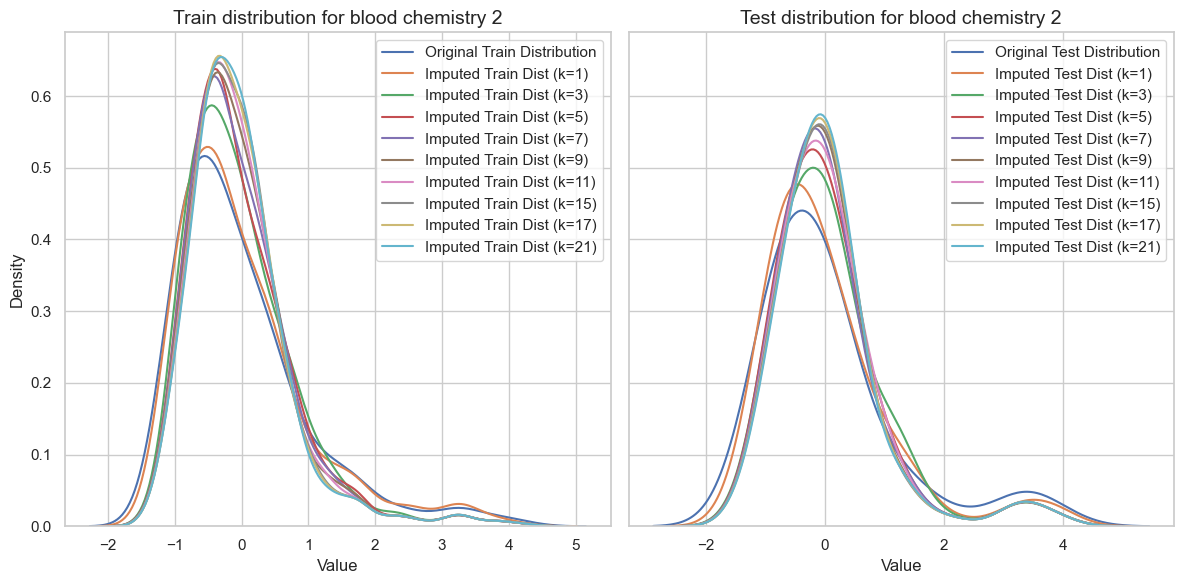

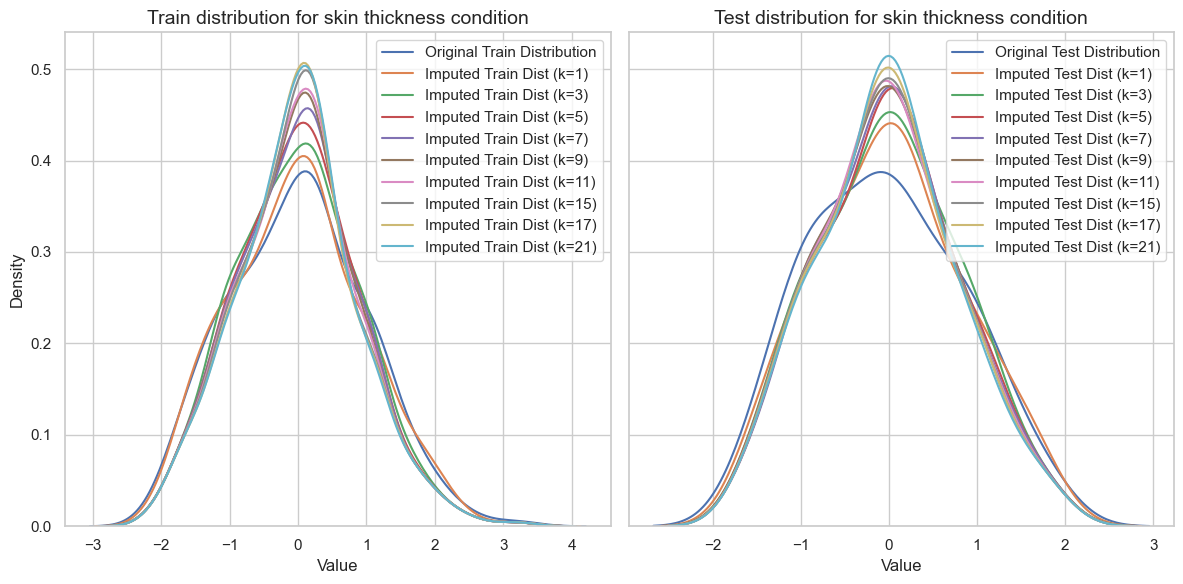

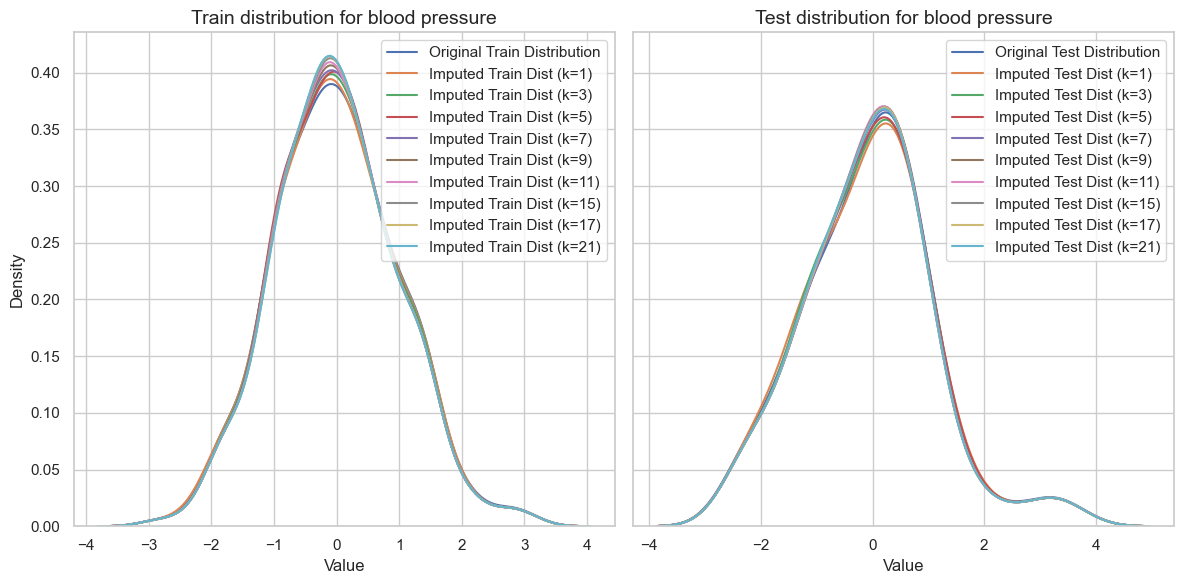

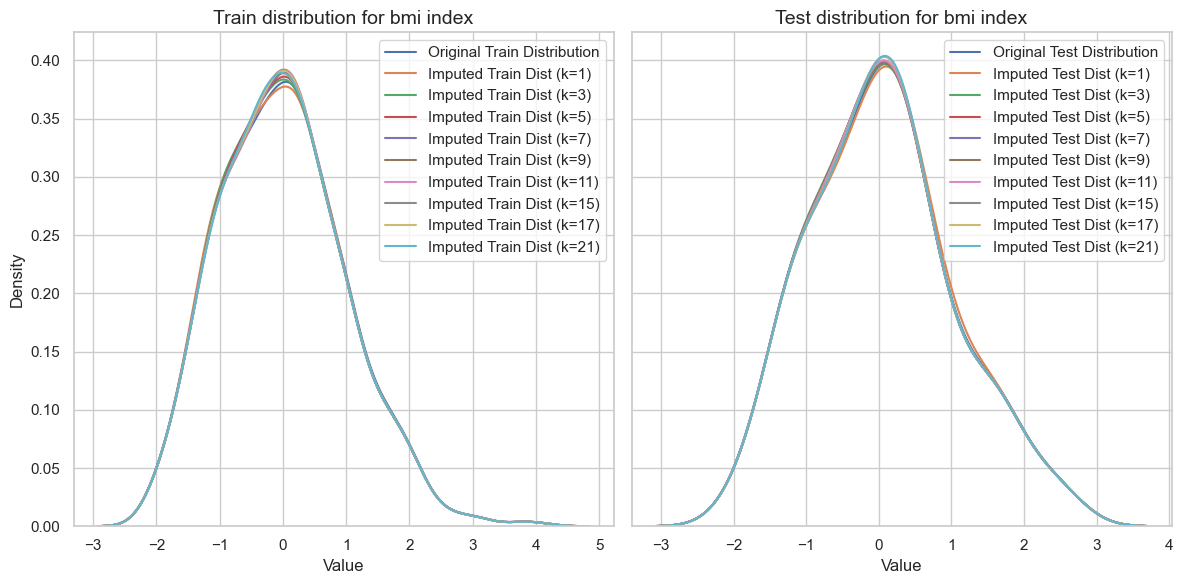

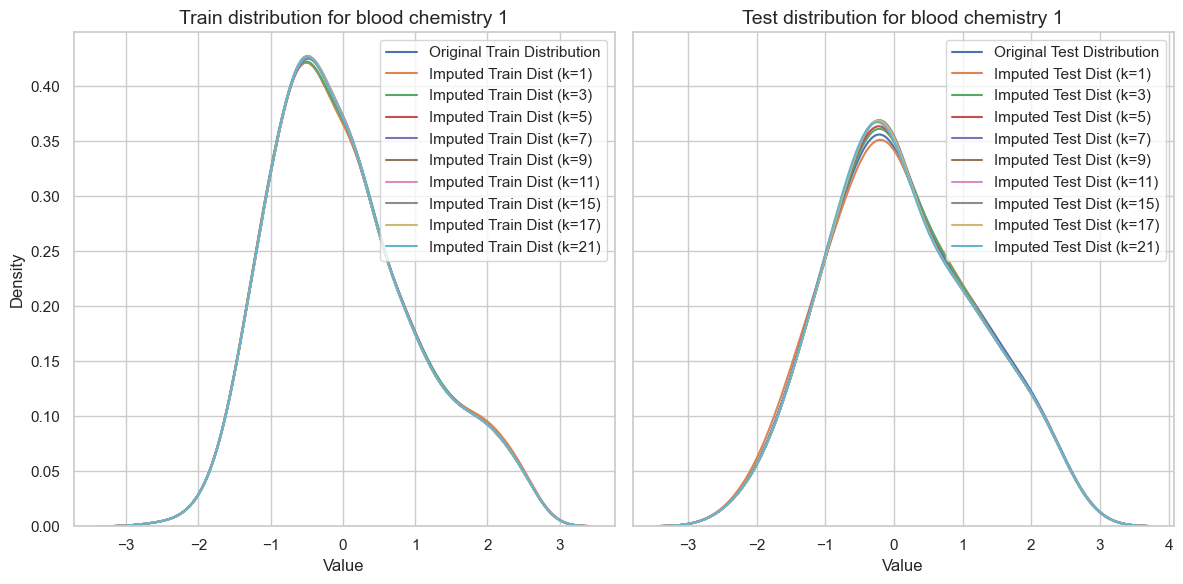

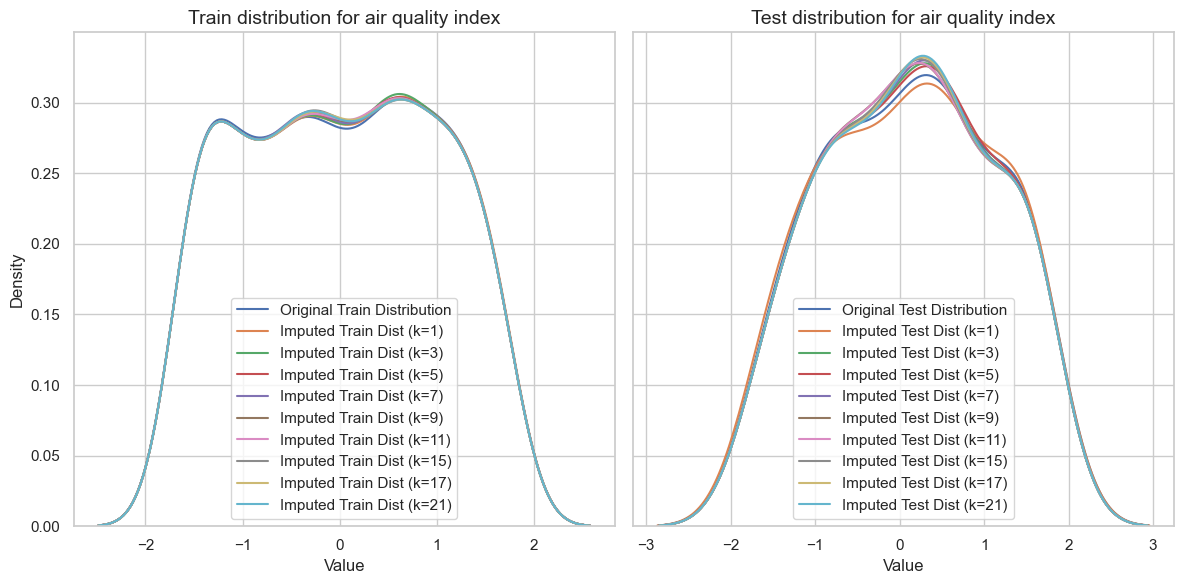

In [85]:
# Define the variables to analyze
variables = ['blood_chemistry_2', 'skin_thickness_condition', 'blood_pressure', 'bmi', 'blood_chemistry_1', 'air_quality_index']
n_neighbors = [1, 3, 5, 7, 9, 11, 15, 17, 21]

for variableselected in variables:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    # Plot train distributions
    sns.kdeplot(X_train_knn_scaled[variableselected], label="Original Train Distribution", ax=axes[0])

    for k in n_neighbors:
        knn_imp = KNNImputer(n_neighbors=k)
        X_train_imputed = pd.DataFrame(knn_imp.fit_transform(X_train_knn_scaled), columns=X_train_knn_scaled.columns)
        sns.kdeplot(X_train_imputed[variableselected], label=f"Imputed Train Dist (k={k})", ax=axes[0])

    axes[0].set_title(f"Train distribution for {column_names_mapping[variableselected].lower()}", fontsize=14)
    axes[0].set_xlabel("Value", fontsize=12)
    axes[0].legend()

    # Plot test distributions
    sns.kdeplot(X_test_knn_scaled[variableselected], label="Original Test Distribution", ax=axes[1])

    for k in n_neighbors:
        knn_imp = KNNImputer(n_neighbors=k)
        X_train_imputed = pd.DataFrame(knn_imp.fit_transform(X_train_knn_scaled), columns=X_train_knn_scaled.columns)
        X_test_imputed = pd.DataFrame(knn_imp.transform(X_test_knn_scaled), columns=X_test_knn_scaled.columns)
        sns.kdeplot(X_test_imputed[variableselected], label=f"Imputed Test Dist (k={k})", ax=axes[1])

    axes[1].set_title(f"Test distribution for {column_names_mapping[variableselected].lower()}", fontsize=14)
    axes[1].set_xlabel("Value", fontsize=12)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

Distribution patterns show the **most noticeable changes depending on the number of neighbors (k) for blood chemistry 2 and skin thickness condition**. This is likely due to the high proportion of missing data for these variables. In contrast, for blood pressure, bmi, blood_chemistry_1, air_quality_index the choice of k has a less significant impact.

**As k increases**, the distribution for both blood chemistry 2 and skin thickness condition **tends to approach more normal-like distribution** — that is, more **smoother, more symmetrical and less skewed**. Additionally, any **irregularities or noticable outliers in the distribution seem to diminish**. At k=1, the data appears the noisiest, as missing values are simply replaced by the closest neighbor, which results in more discrepancies in the distribution.

Ultimately, the chosen value of k = 7 was selected to strike a balance between reducing the effects of noise and outliers in the imputed data, while avoiding overly smoothing the original variable distributions.

**Missing value imputing**

In [86]:
# Impute missing data on numerical columns
imputer = KNNImputer(n_neighbors=7)
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_knn_scaled), columns=X_train_knn_scaled.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_knn_scaled), columns=X_test_knn_scaled.columns)

In [87]:
X_test_imputed.head()

num_pregnancies  blood_chemistry_1  blood_chemistry_2  blood_pressure  \
0        -0.249883           0.099794          -0.191332        0.638691   
1         0.340668           1.132057           3.875519        0.982962   
2        -0.840434          -0.199895          -0.167533       -0.394121   
3        -0.840434           1.997826           1.406009        0.466556   
4        -0.840434          -0.066700           0.690636        1.155097   

   skin_thickness_condition       bmi  genetic_predisposition_factor  \
0                  0.385846  0.127699                      -0.496334   
1                  1.462899  0.944261                       0.487152   
2                  0.581673 -0.050460                      -0.233236   
3                  1.267071  1.137266                       2.488578   
4                  0.973329  1.968674                       1.079123   

        age  air_quality_index  state_frequency  
0 -0.601909           0.694611        -0.836228  
1  0.093090          -0.672936        -0.721615  
2 -0.949409          -1.322521         0.558242  
3 -0.949409          -0.878068         0.558242  
4 -0.341285           0.489479        -0.798024

In [88]:
# Combine imputed numerical data with binary state data
X_train_imputed = pd.concat([X_train_imputed, X_train_states], axis=1) 
X_test_imputed = pd.concat([X_test_imputed, X_test_states], axis=1)

# Drop the state_frequency column
X_train_imputed.drop(columns=['state_frequency'], inplace=True)
X_test_imputed.drop(columns=['state_frequency'], inplace=True)

## Feature selection

To select the explanatory variables for the model, **Feature Importance** analysis and **Recursive Feature Elimination** technique were used. The model employed was a **Random Forest Classifier**. Additionally, **hyperparameter tuning** was performed using **RandomizedSearchCV** to optimize the model's performance. During this process, the following parameters were fine-tuned:
- n_estimators: The number of trees in the random forest. The range for tuning was between 50 and 300.
- max_features: The number of features to consider for the best split. The options included auto, sqrt, and log2.
- max_depth: The maximum depth of the tree. A range of values between 1 and 10 was tested.
- min_samples_split: The minimum number of samples required to split an internal node. The range for tuning was between 2 and 20.
- min_samples_leaf: The minimum number of samples required to be at a leaf node. The range for tuning was between 1 and 20.

The search process utilized 1000 iterations of parameter combinations and employed **5-fold cross-validation** to ensure robust evaluation.

Additionally, since the dataset is imbalanced with the positive class of patients with the disease being the minority class, the ***class_weight="balanced"*** setting was used. This setting addresses class imbalance by automatically adjusting class weights based on their frequencies in the dataset and penalizes misclassification of the minority class more heavily, ensuring the model gives more attention to the underrepresented class.

**Hyperparameters tuning**

In [89]:
# Use imputed datasets
X_train, X_test, y_train, y_test = X_train_imputed, X_test_imputed, y_train, y_test

In [90]:
# Define Random Forest model
rf = RandomForestClassifier(class_weight="balanced", random_state=42)

# Parameters grid for random search
param_dist = {
    'n_estimators': randint(50, 300),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'max_depth': randint(1, 10),  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20)  # Minimum number of samples required to be at a leaf node
}

# RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist, 
    n_iter=1000,  # Number of iterations
    cv=5,  # 5-fold cross-validation
    verbose=0,
    n_jobs=-1,
    random_state=42
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Save the model with best parameters
best_rf = random_search.best_estimator_

print("Best parameters found:")
random_search.best_params_

Best parameters found:


{'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 56}

Accuracy and AUC scores were used to assess the overall predictive power of the model.

In [91]:
# Evaluate the best tuned model on the train and test set
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Get the probabilities for positive class
y_train_prob = best_rf.predict_proba(X_train)[:, 1]
y_test_prob = best_rf.predict_proba(X_test)[:, 1]

# Calculate accuracy and AUC on both train and test dataset
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print(f'Train accuracy score: {round(accuracy_score(y_train, y_train_pred), 3)}')
print(f'Test accuracy score:  {round(accuracy_score(y_test, y_test_pred), 3)}')
print(f'Train AUC: {round(train_auc, 3)}')
print(f'Test AUC: {round(test_auc, 3)}')

Train accuracy score: 0.93
Test accuracy score:  0.83
Train AUC: 0.983
Test AUC: 0.902


The model's performance metrics indicate strong predictive power, particularly on the training dataset, but some decline is observed on the test dataset. However, the slight overfitting is acceptable since the model is being used for feature selection rather than final deployment.

**Feature Importance**

In [92]:
# Get feature importance scores
feature_importance = best_rf.feature_importances_

feature_names = best_rf.feature_names_in_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [93]:
# Merging the previous mapping (columns + state abbreviations)
feature_names_mapping = column_names_mapping.copy()

# Mapping state abbreviations to full state names
state_names_mapping = {f'state_{state}': info['name'] for state, info in state_info.items()}

# Combine the two mappings
feature_names_mapping.update(state_names_mapping)

# Replace the feature names in your dataframe using the combined mapping
importance_df['Feature'] = importance_df['Feature'].map(feature_names_mapping).fillna(importance_df['Feature'])

# Print feature importance
print(importance_df)

                          Feature  Importance
1               Blood chemistry 1    0.208460
2               Blood chemistry 2    0.174444
5                       BMI index    0.134574
7                             Age    0.103335
6   Genetic predisposition factor    0.081134
4        Skin thickness condition    0.071935
8               Air quality index    0.053999
3                  Blood pressure    0.050831
0           Number of pregnancies    0.047904
18                          Texas    0.015444
9                      California    0.008144
14                           Ohio    0.006829
11                       New York    0.005941
10                        Florida    0.004684
12                   Pennsylvania    0.004343
20                       Virginia    0.003175
19                     New Jersey    0.002975
24                  Massachusetts    0.002844
15                       Michigan    0.002756
22                      Tennessee    0.002692
13                       Illinois 

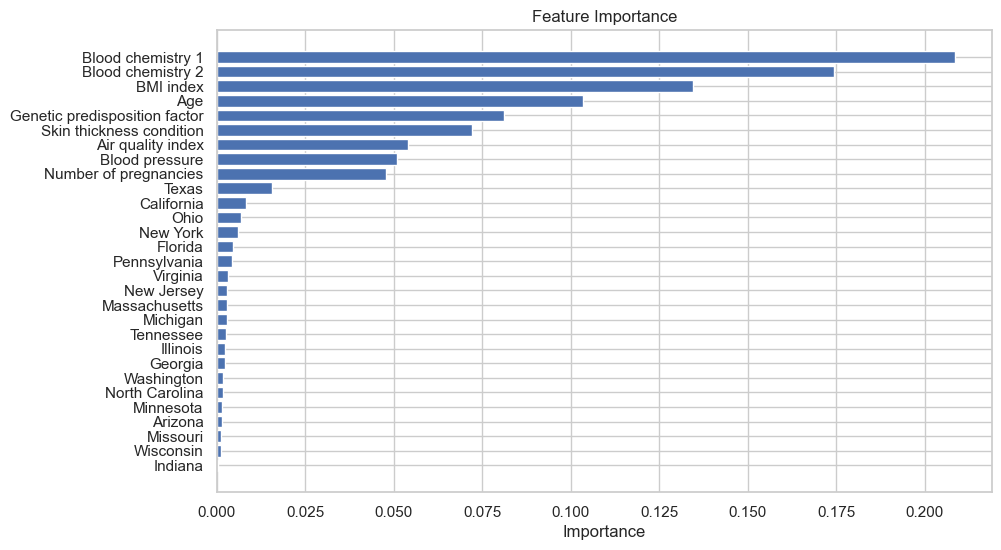

In [94]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

The above graph reveals that **blood chemistry 1 is the most important feature**, which is not surprising, as in previous steps, the distribution differences between ill and non-ill female patients were most noticeable for this variable. As for **blood chemistry 2**, although the differences were also apparent, the proportion of missing values was quite high (around 50%). Surprisingly, **despite such a high ratio of missing data, this variable ranked second**. This suggests that the KNN imputation was highly accurate in this case and did not distort the true relationships in the data. Other important variables include BMI, age, and, with a slightly lower importance, genetic predisposition factor and skin thickness condition. Additionally, **air quality index ranked higher than anticipated**, even though a clear relationship wasn't immediately apparent. Interestingly, **number of pregnancies ended up at the lowest level** among the numeric variables, even though some dependancy could have been expected. However, as mentioned earlier, some multicollinearity was observed among explanatory features, and this could affect the feature importance outcome. Finally, **all state variables ranked at the very bottom**, with a noticeable drop in importance compared to the previous numeric variables. **Texas**, with over 90% of patients being ill in that state, **ranked the highest among them**.

Keeping in mind these observations, all numeric variables were considered, along with the Texas variable, due to its high percentage of positive disease cases.

**Recursive Feature Elimination**

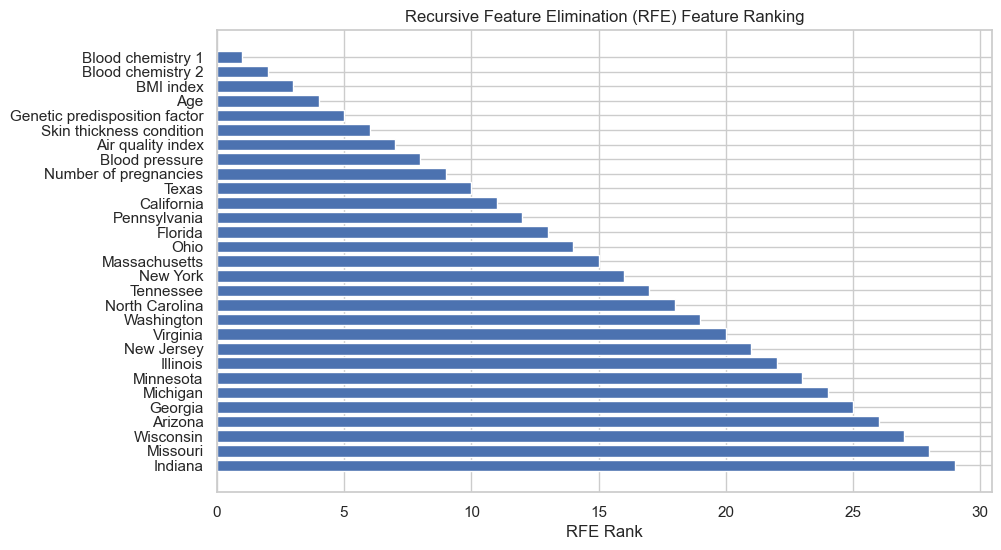

In [95]:
# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=best_rf, n_features_to_select=1)
rfe.fit(X_train, y_train)

# Get RFE rankings
rfe_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'RFE Rank': rfe.ranking_
}).sort_values(by='RFE Rank')

# Remap features names
rfe_ranking['Feature'] = rfe_ranking['Feature'].map(feature_names_mapping).fillna(rfe_ranking['Feature'])

# RFE Plot
plt.figure(figsize=(10, 6))
plt.barh(rfe_ranking['Feature'], rfe_ranking['RFE Rank'])
plt.xlabel('RFE Rank')
plt.title('Recursive Feature Elimination (RFE) Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

In [96]:
selected_columns = ['num_pregnancies', 'blood_chemistry_1', 'blood_chemistry_2', 'blood_pressure', 
              'skin_thickness_condition', 'bmi', 'genetic_predisposition_factor', 'age', 
              'air_quality_index', 'state_TX'
                   ]
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

## Final models evaluation

In [97]:
def plot_confusion_matrix(y_true, y_pred, ax=None, title='Confusion Matrix'):
    # Compute confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)
    
    # Define labels plot
    labels = np.array([['TN', 'FP'], ['FN', 'TP']])
    
    # Add counts to the confusion matrix
    count_labels = [[f'{labels[i, j]}\n\n{cf_matrix[i, j]}' for j in range(2)] for i in range(2)]
    
    # Plot confusion matrix
    if ax is None:
        plt.figure(figsize=(6, 5))
        ax = plt.gca()
    sns.heatmap(cf_matrix, annot=count_labels, fmt='', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'], ax=ax)
    ax.set_title(title)

In [98]:
def evaluate_classification_model(y_true, y_pred, y_test_prob=None):
    # Compute confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)

    # Extract TP, TN, FP, FN
    TP = cf_matrix[1, 1]
    FP = cf_matrix[0, 1]
    FN = cf_matrix[1, 0]
    TN = cf_matrix[0, 0]

    # Calculate accuracy, sensitivity, precision, F1, specificity
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = TP / (TP + FN)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    specificity = TN / (TN + FP)

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Sensitivity (Recall): {sensitivity:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"Specificity: {specificity:.3f}")

    # Calculate AUC-ROC and PR-AUC
    if y_test_prob is not None:
        roc_auc = roc_auc_score(y_true, y_test_prob)
        print(f"ROC AUC: {roc_auc:.3f}")

        precision_pr, recall_pr, _ = precision_recall_curve(y_true, y_test_prob)
        pr_auc = auc(recall_pr, precision_pr)
        print(f"PR AUC: {pr_auc:.3f}")

### Random forest

#### Model training

For the selected set of features, the random forest model was reestimated using the same hyperparameter tuning approach as before.

In [99]:
# Define Random Forest model
rf = RandomForestClassifier(class_weight="balanced", random_state=42)

# Parameters grid for random search
param_dist = {
    'n_estimators': randint(50, 300),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'max_depth': randint(1, 10),  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20)  # Minimum number of samples required to be at a leaf node
}

# RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist, 
    n_iter=1000,  # Number of iterations
    cv=5,  # 5-fold cross-validation
    verbose=0,
    n_jobs=-1,
    random_state=42
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Save the model with best parameters
best_rf = random_search.best_estimator_

print("Best parameters found:")
random_search.best_params_

Best parameters found:


{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 19,
 'n_estimators': 202}

In [100]:
# Evaluate the best tuned model on the train and test set
y_train_rf_pred = best_rf.predict(X_train)
y_test_rf_pred = best_rf.predict(X_test)

# Get the probabilities for positive class
y_train_rf_prob = best_rf.predict_proba(X_train)[:, 1]
y_test_rf_prob = best_rf.predict_proba(X_test)[:, 1]

# Calculate accuracy and AUC on both train and test dataset
train_auc = roc_auc_score(y_train, y_train_rf_prob)
test_auc = roc_auc_score(y_test, y_test_rf_prob)

print(f'Train accuracy score: {round(accuracy_score(y_train, y_train_rf_pred), 3)}')
print(f'Test accuracy score:  {round(accuracy_score(y_test, y_test_rf_pred), 3)}')
print(f'Train AUC: {round(train_auc, 3)}')
print(f'Test AUC: {round(test_auc, 3)}')

Train accuracy score: 0.855
Test accuracy score:  0.83
Train AUC: 0.946
Test AUC: 0.889


In comparison to the previous model evaluated on the whole variable set, after removing some of the insignificant variables, the training accuracy dropped from 93% to 85.5%, while the test accuracy remained the same at 83%. Similarly, the AUC training score decreased from over 98.3% to 94.6%, with a slight reduction in the test AUC score from 90.2% to 88.9%. This **reduction in training accuracy indicates better generalization**, as the model is now performing more consistently across both the training and test datasets. Smaller differences between the metrics for the training and test datasets might suggest **less overfitting to the training data**.

#### Model assesment

**Confusion matrix**

As the research problem is a binary classification task, the confusion matrix and the metrics derived from it will be used to assess the accuracy of the models, which shows how well the model is predicting different classes — in this case, whether a female patient has a disease or not. By comparing the actual outcomes with the model's predictions, we can evaluate the model’s effectiveness.

Since the data involves medical information and the problem is predicting a disease, the **main goal of the model is to accurately identify patients who truly have the disease**. 

Therefore, **recall** is particularly important, as **minimizing the number of cases where patients with the disease are missed** (false negatives) is critical. A low recall could lead to dangerous situations where patients with actual health issues do not receive appropriate treatment.

At the same time, **precision** remains important to **avoid false alarms** where a patient without the disease is incorrectly diagnosed as having it. 

Finally, the **F1-Score**, which is the harmonic mean of precision and recall, provides a **balanced measure of the model's performance**, allowing for the evaluation of disease detection effectiveness while minimizing false diagnoses. In the medical context, a good balance between sensitivity and precision is crucial for improving the quality of diagnoses and ensuring patient safety.

Accuracy: 0.830
Sensitivity (Recall): 0.854
Precision: 0.761
F1 Score: 0.805
Specificity: 0.814


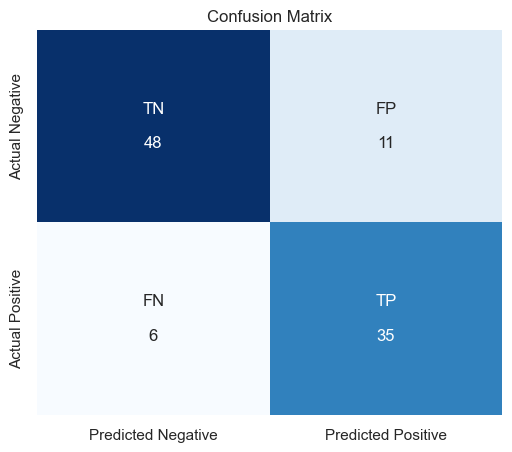

In [103]:
plot_confusion_matrix(y_test, y_test_rf_pred)
evaluate_classification_model(y_test, y_test_rf_pred)

The model performs fairly well in predicting both disease and no disease, with high sensitivity, precision, and F1 score.  

There are 35 true positive cases, while 6 cases are false negatives. This means that out of **41 patients who actually had the disease, 35 were correctly predicted, resulting in a sensitivity of nearly 86%**. However, this means that 14% of the patients with the disease were not detected. 

There are 11 false positives, which indicates that the model incorrectly diagnosed the disease in 11 patients who were actually healthy. The **precision is 76.1%, meaning that approximately 76% of the patients who received a positive diagnosis of the presence of the disease were actually ill**. However, 24% of those diagnosed with the disease were false positives, meaning they were healthy.

The precision is slightly lower than the sensitivity, but it can be said that the model maintains a good balance between correctly identifying positive cases and minimizing false positives, as evidenced by the strong **F1 Score equal 80.5%** (which represents the harmonic mean of both sensitivity and precision). 

It is worth noting that, in medical diagnoses, a more cautious approach is often preferred - where the model tends to classify more negative cases as positive, rather than the opposite (more positive cases as negative), to avoid missing actual positive cases.

Although the **specificity is 81.4%, which indicates the model's ability to correctly predict the negative class**, it is slightly lower than sensitivity, despite the dataset being imbalanced with a predominance of the negative class (healthy individuals). However, when predicting on this dataset, sensitivity should be considered more important, as it is crucial to properly identify individuals who are at risk and prone to the presence of the disease, rather than predicting healthy individuals.

**Precision-Recall curve**

What should be mentioned is that in binary classification models such as Random Forest or Logistic Regression, the model actually returns a probability score for each observation, indicating how likely it is that the observation belongs to the positive class (e.g., "disease"). By default, a threshold value of 0.5 is used to classify observations as positive. However, it is possible to choose any other threshold depending on the needs of the analyst and what is more crucial for them, such as whether they prioritize predicting the positive class or the negative class more accurately. One of the options for choosing the threshold might be finding the threshold for which the F1 score is maximized, as it balances precision and recall.

Additionally, since the final results (metrics) can depend on the chosen threshold, the PR curve can also serves as a tool to assess the overall performance of the model. The **Precision-Recall (PR) curve**, shown below, illustrates the trade-off between precision and recall at different classification thresholds. Since it's based on precision and recall, this curve is especially useful for imbalanced datasets, as it highlights the model's performance in predicting the minority class. Based on the PR curve, we can calculate the **PR-AUC (Precision-Recall Area Under the Curve)** metric, which is essentially the computed area under the PR curve. This metric gives a single value that summarizes the model's overall ability to predict the positive class, regardless of the chosen threshold. In other words, it generalizes the model's performance in predicting the positive class.

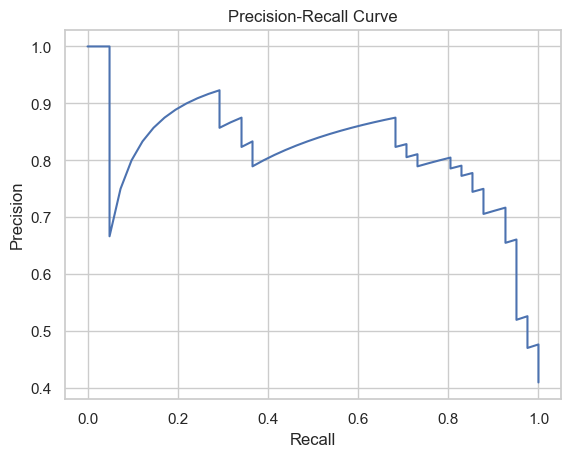

PR-AUC Score: 0.815
Optimal Threshold: 0.523


In [104]:
# Calculate precision and recall at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_test_rf_prob)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes the F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Calculate PR-AUC metric
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

print(f"PR-AUC Score: {pr_auc:.3f}")
print(f"Optimal Threshold: {optimal_threshold:.3f}")

The Precision-Recall curve gives the expected shape (with a slight disregard for the drop of precision on the left side of the curve) — with low recall, the precision is correspondingly high, and at very high recall, the precision begins to drop.

The **optimal threshold chosen based on F1-score is 0.523**. To maximize the F1-score of the model, we would need to slightly increase precision, which may, but doesn’t necessarily (as shown in this case below), come at the cost of a slight decrease in recall (a higher threshold ensures that only predictions with a high probability of being positive are classified as positive).

**Optimimal threshold**

Accuracy: 0.840
Sensitivity (Recall): 0.854
Precision: 0.778
F1 Score: 0.814
Specificity: 0.831


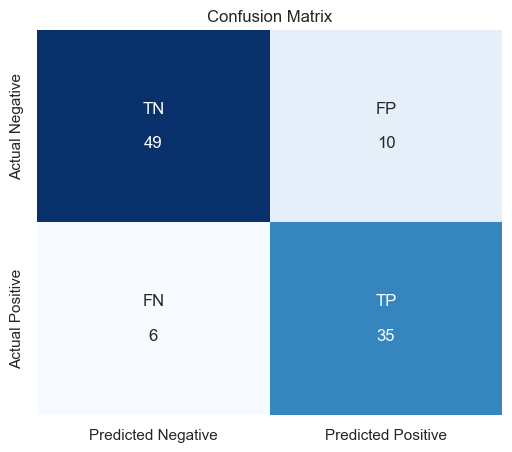

In [105]:
# Classify predictions based on the new threshold
rf_optimal_threshold = 0.523

y_test_rf_pred_adj = (y_test_rf_prob >= rf_optimal_threshold).astype(int)

plot_confusion_matrix(y_test, y_test_rf_pred_adj)
evaluate_classification_model(y_test, y_test_rf_pred_adj)

Compared to the previous results:
- Accuracy: 0.830, 
- Sensitivity (Recall): 0.854, 
- Precision: 0.761, 
- F1 Score: 0.805, 
- Specificity: 0.814, 

the **sensitivity remain the same, while the precision, F1-score, specificity and accuracy has increased**. It can be seen that one case shifted from FP to TN, meaning that one patient without the disease, who was previously predicted as a person with the disease (false positive), is now correctly predicted as a negative class with no disease (true negative)

### Logistic regression

For the same set of variables, a Logistic Regression model was built.

#### Model training

In [106]:
# Initialize the model
logreg = LogisticRegression(class_weight="balanced", random_state=42)

# Fit the model on train dataset
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [107]:
# Display coefficients
coef_df = pd.DataFrame({
    'Feature':  X_train.columns,
    'Coefficient': logreg.coef_[0]
})

coef_df['abs_coef'] = np.abs(coef_df['Coefficient'])

coef_df_sorted = coef_df.sort_values(by='abs_coef', ascending=False)

print(coef_df_sorted[['Feature', 'Coefficient']])

                         Feature  Coefficient
9                       state_TX     1.856461
1              blood_chemistry_1     1.047160
5                            bmi     0.528996
0                num_pregnancies     0.446894
6  genetic_predisposition_factor     0.311063
2              blood_chemistry_2     0.114154
8              air_quality_index     0.082120
7                            age     0.075854
3                 blood_pressure    -0.054979
4       skin_thickness_condition     0.033452


#### Model assesment

**Confusion matrix**

Accuracy: 0.820
Sensitivity (Recall): 0.829
Precision: 0.756
F1 Score: 0.791
Specificity: 0.814


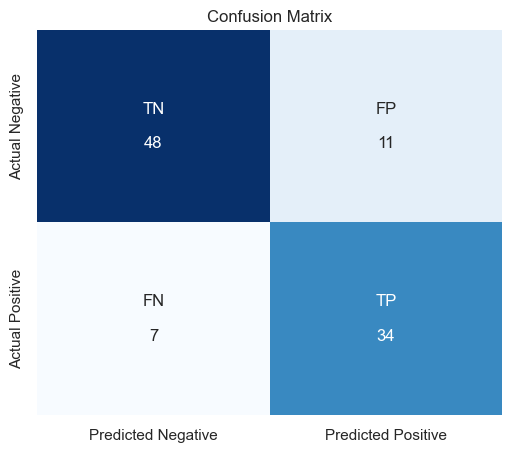

In [108]:
# Predict for train and test datasets
y_train_logreg_pred = logreg.predict(X_train)
y_test_logreg_pred = logreg.predict(X_test)

# Get predicted probabilities for the positive class (class 1)
y_train_logreg_prob = logreg.predict_proba(X_train)[:, 1]
y_test_logreg_prob = logreg.predict_proba(X_test)[:, 1]

plot_confusion_matrix(y_test, y_test_logreg_pred)
evaluate_classification_model(y_test, y_test_logreg_pred)

Compared to the Random Forest with the default threshold of 0.5:
- Accuracy: 0.830
- Sensitivity (Recall): 0.854
- Precision: 0.761
- F1 Score: 0.805
- Specificity: 0.814

Here, the **sensitivity is smaller and equals 82.9%**, while it was higher previously. This is because one case with the disease, which was correctly classified as positive, is now incorrectly predicted as no disease. This also affects the **increase in precision** — since the true positives (TP) count is now smaller by 1, and thus the denominator in precision is smaller with the same number of false positives (FP), the precision increases. 

Apart from that one change for one individual, the confusion matrix remains the same. **Specificity remains unchanged at 81.4%**, as the predictions for the negative class haven't changed. The proportions of patients without the disease correctly classified into the healthy group remain the same as in the random forest model.

Even though the precision increases, sensitivity, which could be considered more important here, decreases. It can be concluded that the **model has worsened** in this regard, as a **disease that was previously correctly detected in one individual is no longer detected in the current model**.

**Precision-Recall curve**

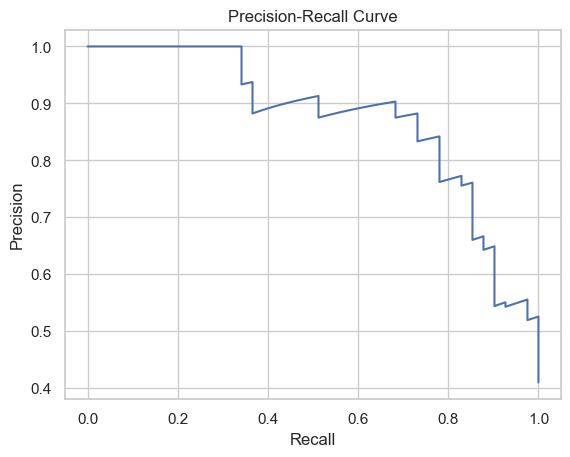

Optimal Threshold: 0.587527610936833
PR-AUC Score: 0.872


In [109]:
# Calculate precision and recall at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_test_logreg_prob)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes the F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Calculate PR-AUC
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
print(f"Optimal Threshold: {optimal_threshold}")
print(f"PR-AUC Score: {pr_auc:.3f}")

Here, it appears that **precision** in the case of logistic regression **does not drop as quickly** with the initial increase in recall, and it maintains a higher level for a longer period. Overall, the PR-AUC now stands at 87.2%, which is higher than the previous PR-AUC of 81.5%. This suggests that the model is **more stable in terms of the balance between precision and recall at different decision thresholds**. It generally also indicates that the model is making **better predictions compared to random guessing**.

**Optimimal threshold**

Accuracy: 0.820
Sensitivity (Recall): 0.829
Precision: 0.756
F1 Score: 0.791
Specificity: 0.814


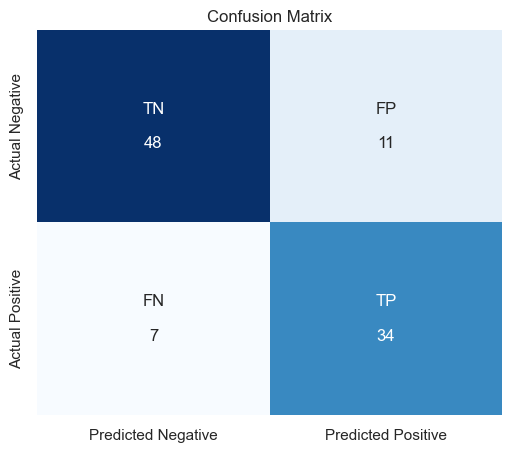

In [110]:
# Classify predictions based on the new threshold
logreg_optimal_threshold = 0.587

y_test_logreg_pred_adj = (y_test_logreg_pred >= logreg_optimal_threshold).astype(int)

conf_matrix_logreg = plot_confusion_matrix(y_test, y_test_logreg_pred_adj)
metrics_logreg = evaluate_classification_model(y_test, y_test_logreg_pred_adj)

The optimized threshold based on the F1-score does not change the confusion matrix counts or the final metrics. **Both thresholds classify the data in the same way and produce the same maximized F1-score**, indicating that the choice of these threshold does not affect the model's performance.

## Comparison of the model

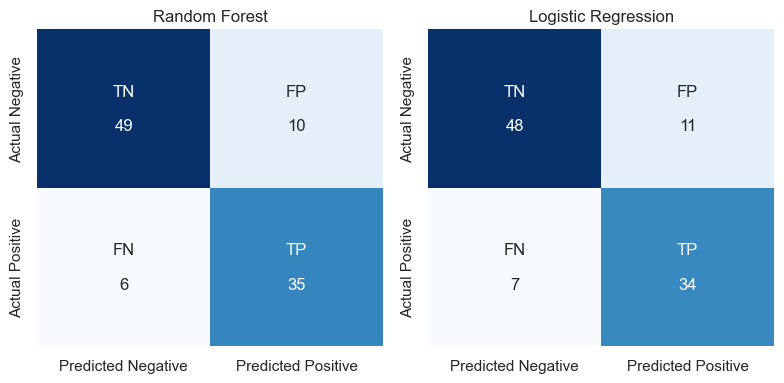

In [111]:
# Create a figure and axes to display two confusion matrices side by side
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, y_test_rf_pred_adj, ax=ax[0], title='Random Forest')

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, y_test_logreg_pred_adj, ax=ax[1], title='Logistic Regression')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Random forest**
- Accuracy: 0.840
- Sensitivity (Recall): 0.854
- Precision: 0.778
- F1 Score: 0.814
- Specificity: 0.831

**Logistic Regression**
- Accuracy: 0.820
- Sensitivity (Recall): 0.829
- Precision: 0.756
- F1 Score: 0.791
- Specificity: 0.814

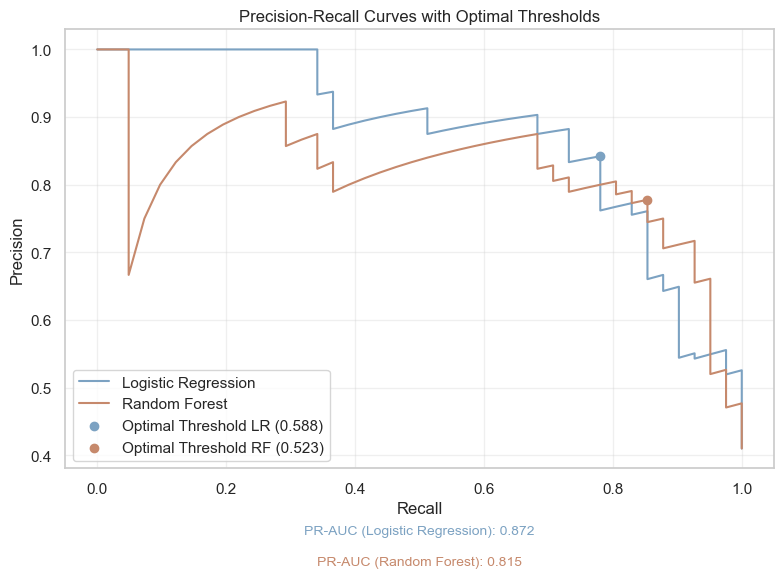

In [112]:
# Calculate precision, recall, and thresholds for Logistic Regression
precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(y_test, y_test_logreg_prob)
f1_scores_logreg = 2 * (precision_logreg * recall_logreg) / (precision_logreg + recall_logreg)
optimal_index_logreg = np.argmax(f1_scores_logreg)
optimal_threshold_logreg = thresholds_logreg[optimal_index_logreg]
pr_auc_logreg = auc(recall_logreg, precision_logreg)

# Calculate precision, recall, and thresholds for Random Forest
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_test_rf_prob)
f1_scores_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
optimal_index_rf = np.argmax(f1_scores_rf)
optimal_threshold_rf = thresholds_rf[optimal_index_rf]
pr_auc_rf = auc(recall_rf, precision_rf)

palette = sns.color_palette("twilight_shifted", 2)
colors = {'Logistic Regression': palette[0], 'Random Forest': palette[1]}

# Plot Precision-Recall curves for both models
plt.figure(figsize=(8, 6))
plt.plot(recall_logreg, precision_logreg, label=f'Logistic Regression', color=colors['Logistic Regression'])
plt.plot(recall_rf, precision_rf, label=f'Random Forest', color=colors['Random Forest'])

# Opptimal thresholds
plt.scatter(recall_logreg[optimal_index_logreg], precision_logreg[optimal_index_logreg],
            color=colors['Logistic Regression'], label=f'Optimal Threshold LR ({optimal_threshold_logreg:.3f})', zorder=5)
plt.scatter(recall_rf[optimal_index_rf], precision_rf[optimal_index_rf],
            color=colors['Random Forest'], label=f'Optimal Threshold RF ({optimal_threshold_rf:.3f})', zorder=5)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves with Optimal Thresholds')
plt.legend(loc='lower left')

# Add PR-AUC scores
plt.text(0.5, -0.15, f'PR-AUC (Logistic Regression): {pr_auc_logreg:.3f}', fontsize=10, color=colors['Logistic Regression'], ha='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.22, f'PR-AUC (Random Forest): {pr_auc_rf:.3f}', fontsize=10, color=colors['Random Forest'], ha='center', transform=plt.gca().transAxes)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Both models performed well, and the results obtained from them are quite comparable. **Logistic Regression appears to be more stable**, while the **Random Forest, although at the cost of precision, generates better recall**. Depending on the specific need, the random forest could be the more desirable model in most cases, as its effectiveness in predicting both diseases and non-diseases seems to be the most important aspect when forecasting diseases.

It is important to note that the **dataset was not very large** (less than 800 observations), with only 100 test cases. Considering the potential **impact of randomness** introduced during data preparation (such as train/test splitting and missing data imputation) and the model training process, particularly parameter optimization for Random Forest, the results could be **more reliably confirmed if these models were analyzed in greater depth from multiple perspectives and under different conditions**. In the case of a relatively small dataset, **even a single outlier could significantly influence the final model's parameters** and how it predicts such atypical values. In case of this project, many outliers were excluded, which certainly contributed to better model performance.

Another important factor to consider is the **purpose of these models** -  whether they are intended for **explanatory and interpretive** purposes or for **practical prediction**. Depending on the application, the relative importance of **precision versus sensitivity** could vary. Additionally, **balancing the performance between the negative and positive classes** might be crucial depending on the context.

**Evaluating the model's properties**, rather than just its predictive performance, could be the next step of the project. In this phase, aspects such as model stability, interpretability, and testing on different datasets would be analyzed to **better understand its behavior and limitations**.

<div style="font-size: 30px; font-weight: bold; line-height: 1.2; margin-top: 20px; margin-bottom: 20px;">Conclusion</div>

This project focused on predicting the presence of a disease in female patients based on a dataset containing various characteristics. The task was framed as a binary classification problem. After thoroughly reviewing the data, preparing the dataset, and selecting the appropriate features, two classification models were employed: **Random Forest** and **Logistic Regression**.

Both models performed well and provided suitable results, showing generally good model performance. However, as with any data science project, there remain areas for improvement:

**Explanatory data analysis**: A more thorough examination of the dataset, particularly exploring the relationships between different variables, could help refine the model further.

**Model Selection**: While both Logistic Regression and Random Forest produced similar results, exploring additional models may lead to better performance. More advanced models or hyperparameter optimization techniques could be tested to enhance the results.

**Imputation Methods**: The KNN imputer was used for handling missing data, but experimenting with other imputation methods and comparing their impact on the final models could offer valuable insights and potentially improve predictive performance.

**Handling Imbalanced Data**: The dataset's imbalance was acknowledged, and methods such as over-sampling, under-sampling, or more advanced techniques like SMOTE could be employed to address this issue and improve model performance.

**Dataset Size**: The relatively small size of the dataset also proved to be a limiting factor, as even small changes in the data had a noticeable impact on model results and predictive power. Larger datasets could help mitigate this issue.

In summary, while both models delivered satisfactory results, there is potential for improvement through a deeper exploration of the data, testing different models and imputation strategies, and handling class imbalance more effectively. This would allow for the development of even more robust and accurate predictive models.